# Assessing GDPR-Compliance in Web Applications: A Machine Learning Approach

We will assess the GDPR-compliance of web applications based on their privacy policies. We use a classification model, trained on a corpus of 18,397 natural sentences, to classify the privacy policies on whether five General Data Protection Regulation (GDPR) privacy policy core requirements are communicated in the policy.

__Relevance:__ The GDPR applies to any personal data processing of EU citizens. We aim to assess the state of GDPR-compliance in application software based on their privacy policies.

__Focus:__ web applications; as the web application paradigm is widely used due to the omnipresence of web browsers across PCs and mobile devices. In particular, we focus on organisations that provide cloud-based solutions: Cloud Computing, Cloud Data Services, Cloud Infrastructure, Cloud, Management, and Cloud Storage.


__Goal:__ to scrutinize the privacy policies of web applications using ML, to assess whether core privacy policy requirements are communicated.

#### __RQ:__ What is the state of GDPR-compliance disclosure in web applications?

---

### Step 1: collect list of companies active in the Web Apps industry

To do so we utilize the Crunchbase database that allows us to identify companies that engage in web applications, filtered on location (which in our case will be the European Union). We used 

We've imported 2792 companies using the following criteria:
- Industry: Web Apps
- Location: Europe (European Union)

---

In [2]:
import os
from newspaper import Article
from bs4 import BeautifulSoup
from six.moves.urllib.parse import urlparse
import urllib
import sys
import time
import nltk
import glob
import pandas as pd
import requests
import spacy
import random
# from googlesearch import search
from langdetect import detect
import re
import pickle
import math
import numpy as np
import collections
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import re
from tabulate import tabulate
from IPython.display import display, HTML

### Step 2: read data

In [3]:
path = r'C:\Users\aaberkan\OneDrive - UGent\Scripts\GDPR-Compliance in Web Applications\data\Crunchbase\Cloud'
filenames = glob.glob(path + "/*.csv")

In [6]:
# len = 30
len(filenames)

30

In [7]:
dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))

In [9]:
crunch_data = pd.concat(dfs, ignore_index=True)

In [10]:
crunch_data

Organization Name  \
0                 Ex Libris   
1                     Exact   
2                 Xperience   
3                      Sage   
4                    Novahé   
...                     ...   
21235          BackupAddict   
21236  NetConvergence, Inc.   
21237         MyLabBook.com   
21238              Radmedix   
21239    Knockout PC Repair   

                                   Organization Name URL  \
0      https://www.crunchbase.com/organization/ex-libris   
1          https://www.crunchbase.com/organization/exact   
2      https://www.crunchbase.com/organization/xperie...   
3      https://www.crunchbase.com/organization/sage-c1e4   
4         https://www.crunchbase.com/organization/novahé   
...                                                  ...   
21235  https://www.crunchbase.com/organization/backup...   
21236  https://www.crunchbase.com/organization/netcon...   
21237  https://www.crunchbase.com/organization/mylabb...   
21238   https://www.crunchbase.com/organization/radmedix   
21239  https://www.crunchbase.com/organization/knocko...   

                                        Full Description  \
0      Ex Libris Group is a leading provider of libra...   
1      Exact is a global supplier of cloud business s...   
2      Xperience provides software solutions within E...   
3      Sage DPW-Software is now implementing over 100...   
4                                                    NaN   
...                                                  ...   
21235                                                NaN   
21236                                                NaN   
21237                                                NaN   
21238                                                NaN   
21239                                                NaN   

                                              Industries  \
0      Apps, Cloud Computing, Enterprise Software, In...   
1      Accounting, Cloud Computing, CRM, Enterprise R...   
2      Cloud Computing, Consulting, CRM, Enterprise R...   
3      Cloud Computing, Computer, Private Cloud, Secu...   
4      Cloud Computing, Information Technology, IT In...   
...                                                  ...   
21235  Cloud Storage, Information Technology, Profess...   
21236  Cloud Storage, Enterprise Software, Informatio...   
21237       Cloud Data Services, Cloud Storage, Software   
21238  Cloud Storage, Manufacturing, Medical Device, ...   
21239  Cloud Storage, Information Technology, IT Mana...   

                                Website  \
0          http://www.exlibrisgroup.com   
1                  http://www.exact.com   
2      https://www.xperience-group.com/   
3               https://www.sagedpw.at/   
4                https://www.novahe.fr/   
...                                 ...   
21235     https://www.backupaddict.com/   
21236     http://www.netconvergence.com   
21237         https://www.mylabbook.com   
21238              https://radmedix.com   
21239     https://knockoutpcrepair.com/   

                           Headquarters Location  \
0                 Ballerup, Hovedstaden, Denmark   
1           Delft, Zuid-Holland, The Netherlands   
2                 Antrim, Antrim, United Kingdom   
3                          Vienna, Wien, Austria   
4                        Orléans, Centre, France   
...                                          ...   
21235  Jersey Shore, Pennsylvania, United States   
21236     Santa Clara, California, United States   
21237       Texas, South Carolina, United States   
21238                Dayton, Ohio, United States   
21239       Brentwood, California, United States   

                                             Description CB Rank (Company)  \
0      Ex Libris Group is a leading provider of libra...           165,720   
1      Exact is a company that provides cloud based b...           229,780   
2      Xperience provides software solutions within E...           187,002   
3                Sag

In [12]:
# remove duplicates
crunch_data.drop_duplicates(inplace=True)

In [13]:
crunch_data

Organization Name  \
0                     Ex Libris   
1                         Exact   
2                     Xperience   
3                          Sage   
4                        Novahé   
...                         ...   
21234  Affordable Cloud Hosting   
21235              BackupAddict   
21236      NetConvergence, Inc.   
21238                  Radmedix   
21239        Knockout PC Repair   

                                   Organization Name URL  \
0      https://www.crunchbase.com/organization/ex-libris   
1          https://www.crunchbase.com/organization/exact   
2      https://www.crunchbase.com/organization/xperie...   
3      https://www.crunchbase.com/organization/sage-c1e4   
4         https://www.crunchbase.com/organization/novahé   
...                                                  ...   
21234  https://www.crunchbase.com/organization/afford...   
21235  https://www.crunchbase.com/organization/backup...   
21236  https://www.crunchbase.com/organization/netcon...   
21238   https://www.crunchbase.com/organization/radmedix   
21239  https://www.crunchbase.com/organization/knocko...   

                                        Full Description  \
0      Ex Libris Group is a leading provider of libra...   
1      Exact is a global supplier of cloud business s...   
2      Xperience provides software solutions within E...   
3      Sage DPW-Software is now implementing over 100...   
4                                                    NaN   
...                                                  ...   
21234                                                NaN   
21235                                                NaN   
21236                                                NaN   
21238                                                NaN   
21239                                                NaN   

                                              Industries  \
0      Apps, Cloud Computing, Enterprise Software, In...   
1      Accounting, Cloud Computing, CRM, Enterprise R...   
2      Cloud Computing, Consulting, CRM, Enterprise R...   
3      Cloud Computing, Computer, Private Cloud, Secu...   
4      Cloud Computing, Information Technology, IT In...   
...                                                  ...   
21234  Cloud Storage, Information Technology, Web Hos...   
21235  Cloud Storage, Information Technology, Profess...   
21236  Cloud Storage, Enterprise Software, Informatio...   
21238  Cloud Storage, Manufacturing, Medical Device, ...   
21239  Cloud Storage, Information Technology, IT Mana...   

                                     Website  \
0               http://www.exlibrisgroup.com   
1                       http://www.exact.com   
2           https://www.xperience-group.com/   
3                    https://www.sagedpw.at/   
4                     https://www.novahe.fr/   
...                                      ...   
21234  http://www.affordablecloudhosting.com   
21235          https://www.backupaddict.com/   
21236          http://www.netconvergence.com   
21238                   https://radmedix.com   
21239          https://knockoutpcrepair.com/   

                           Headquarters Location  \
0                 Ballerup, Hovedstaden, Denmark   
1           Delft, Zuid-Holland, The Netherlands   
2                 Antrim, Antrim, United Kingdom   
3                          Vienna, Wien, Austria   
4                        Orléans, Centre, France   
...                                          ...   
21234              Tampa, Florida, United States   
21235  Jersey Shore, Pennsylvania, United States   
21236     Santa Clara, California, United States   
21238                Dayton, Ohio, United States   
21239       Brentwood, California, United States   

                                             Description CB Rank (Company)  \
0      Ex Libris Group is a leading provider of libra...           165,720   
1      Exact is a company that provides cloud based b...           229,7

In [38]:
crunch_data.to_csv("crunch_cloud_conc.csv", sep='\t', header=True, index=False)

#### Clean websites list

In [14]:
websites_list = crunch_data["Website"].tolist()

In [19]:
websites_list

['http://www.exlibrisgroup.com',
 'http://www.exact.com',
 'https://www.xperience-group.com',
 'https://www.sagedpw.at',
 'https://www.novahe.fr',
 'https://eurodata.de',
 'https://www.hatteland.com',
 'https://www.norteam.se',
 'http://www.crs4.it',
 'https://www.cws.it',
 'https://actuelburo.fr',
 'http://www.kinandcarta.com',
 'https://www.valorebf.it',
 'https://www.siav.com',
 'https://www.exorint.com',
 'https://www.sltn.nl',
 'https://www.mpy.fi',
 'http://www.olivetti.com',
 'https://www.datadec.es',
 'http://www.ashgoal.com',
 'https://www.simac.com',
 'https://greymatter.com',
 'https://www.concat.de',
 'https://www.lanaco.com',
 'https://www.umb.ch',
 'https://www.svlbusinesssolutions.com',
 'https://uwm.co.uk',
 'https://www.hsi.es',
 'https://www.acora.com',
 'http://www.inforolot.com',
 'http://www.transputec.com',
 'https://wsb-solutions.nl',
 'http://www.ebcgroup.co.uk',
 'https://opinkerfi.is',
 'https://www.global-e.nl',
 'https://www.sodvin.no',
 'https://groupeozite

In [17]:
# remove / from the end of the string that contains the website
# websites_list = [website.rstrip(website[-1]) if (website[-1] == "/") else website for website in websites_list]
websites_list = [website.rstrip(website[-1]) if (isinstance(website, str) and website[-1] == "/") else website for website in websites_list]
# een keer extra voor het geval er een url was met // op het eind
websites_list = [website.rstrip(website[-1]) if (isinstance(website, str) and website[-1] == "/") else website for website in websites_list]

In [18]:
len(websites_list)

17883

---

### Step 3: scrape privacy policies

In [25]:
def get_privacy_policy_url(query):
    keyword_in_title = 0
    attempts = 0
    url = ""
    print("Query: " + query)
    
    try:
        query_results_list = return_google_results(query, 3, 5)
        print("Considering " + str(len(query_results_list)) + " URL(s) ...")
        for i, url in enumerate(query_results_list):
            term_in_url = 0
            attempts = attempts + 1
            print("Assessing privacy policy URL: " + url)
            
            if (re.findall('privacy', url) or re.findall('policy', url) or re.findall('gdpr', url) 
                or re.findall('terms', url) or re.findall('legal', url)): 
                print("Found relevant terms in URL! Succesful break!")
                break

#                     pass
            if keyword_in_title == 1 or attempts == 3 or i==(len(query_results_list)-1): 
                keyword_in_title = 0
                attempts = 0
                print("No results. Breaking ..")
                url = ""
#                 print(sentences)
                break   
    except Exception as e:
            print(str(e))
            pass
    return url

In [26]:
def return_google_results(keywords, num_results, attempts):
    user_agent_list = [
      'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_5) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/13.1.1 Safari/605.1.15',
      'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:77.0) Gecko/20100101 Firefox/77.0',
      'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36',
      'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:77.0) Gecko/20100101 Firefox/77.0',
      'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36',
    ]

    html_keywords = urllib.parse.quote_plus(keywords)
    sleep_init = 10
    
    url = "https://www.google.com/search?q=" + html_keywords + "&num=" + str(num_results)
    print("** Search query in URL: " + url)

    headers = {'User-Agent': random.choice(user_agent_list)}
    
    html = requests.get(url, headers=headers)

    if html.status_code == 429:
        if(attempts == 0):
            sys.exit("Too many request 429, attempted "+ str(5)+ " times, break ...")
        else:
            if 'Retry_After' in html.headers:
                print("Helaas, geen retry-after info")
            else:
                time.sleep(sleep_init)
                print("Too many requests (attempt "+ str(5 - attempts)+ "), we will attempt again in " + str(sleep_init) + " seconds")
                return_google_results(keywords, num_results, (attempts - 1))
    else: 
        pass
        
    soup = BeautifulSoup(html.text, 'html.parser')

    allData = soup.find_all("div",{"class":"g"})

    link_list = []
    print("len alldata: " + str(len(allData)))
    
    for i in range(0,len(allData)):
        link = allData[i].find('a').get('href')
        
        if(link is not None):
            if(link.find('https') != -1 and link.find('http') == 0 and link.find('aclk') == -1):
                print(link)
                link_list.append(link)
    print(link_list)
    return link_list

#### Collect privacy policy URLs

In [27]:
privacy_policies_url_list = []

In [28]:
# loop through each company URL and attempt to find the URL of the privacy policy
count_urls = 0
for i, url_company in enumerate(websites_list):    
    print(i)

#     print(len(privacy_policies_url_list))
    if(isinstance("url_company", str) is False or (url_company == url_company) is False):
        privacy_policies_url_list.append("")
    else:
        query = "site:\"" + url_company + " \"privacy policy"
        privacy_policies_url_list.append(get_privacy_policy_url(query))
        count_urls = count_urls + 1
    print("URL count: " + str(count_urls))
    print()
    time.sleep(60)

0
Query: site:"http://www.exlibrisgroup.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.exlibrisgroup.com+%22privacy+policy&num=3
len alldata: 2
https://www.exlibrisgroup.com/services/cloud-services/
https://www.exlibrisgroup.com/de/thank-you/
['https://www.exlibrisgroup.com/services/cloud-services/', 'https://www.exlibrisgroup.com/de/thank-you/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.exlibrisgroup.com/services/cloud-services/
Assessing privacy policy URL: https://www.exlibrisgroup.com/de/thank-you/
No results. Breaking ..
URL count: 1

1
Query: site:"http://www.exact.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.exact.com+%22privacy+policy&num=3
len alldata: 2
https://www.exact.com/privacy-statement
https://www.exact.com/global/images/downloads/terms-and-conditions/Privacy-Policy-for-Exact-Online-EN.pdf
['https://www.exact.com/privacy-statement',

16
Query: site:"https://www.mpy.fi "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.mpy.fi+%22privacy+policy&num=3
len alldata: 1
https://www.mpy.fi/tietosuojaseloste
['https://www.mpy.fi/tietosuojaseloste']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.mpy.fi/tietosuojaseloste
No results. Breaking ..
URL count: 17

17
Query: site:"http://www.olivetti.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.olivetti.com+%22privacy+policy&num=3
len alldata: 2
https://www.olivetti.com/en/web-privacy-policy-cookie
https://www.olivetti.com/en/privacy
['https://www.olivetti.com/en/web-privacy-policy-cookie', 'https://www.olivetti.com/en/privacy']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.olivetti.com/en/web-privacy-policy-cookie
Found relevant terms in URL! Succesful break!
URL count: 18

18
Query: site:"https://www.datadec.es "privacy policy
** Sear

29
Query: site:"http://www.inforolot.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.inforolot.com+%22privacy+policy&num=3
len alldata: 2
https://www.inforolot.com/en/websites-and-website-ranking/
https://www.inforolot.com/en/it-security/
['https://www.inforolot.com/en/websites-and-website-ranking/', 'https://www.inforolot.com/en/it-security/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.inforolot.com/en/websites-and-website-ranking/
Assessing privacy policy URL: https://www.inforolot.com/en/it-security/
No results. Breaking ..
URL count: 30

30
Query: site:"http://www.transputec.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.transputec.com+%22privacy+policy&num=3
len alldata: 2
https://www.transputec.com/privacy-policy/
https://www.transputec.com/cookie-policy/
['https://www.transputec.com/privacy-policy/', 'https://www.transputec.com/cookie-policy/']
C

44
Query: site:"https://www.thecomputercompany.nl "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.thecomputercompany.nl+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 45

45
Query: site:"https://www.filippetti.it "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.filippetti.it+%22privacy+policy&num=3
len alldata: 2
https://www.filippetti.it/privacy-policy/
https://www.filippetti.it/dichiarazione-sulla-privacy-ue/
['https://www.filippetti.it/privacy-policy/', 'https://www.filippetti.it/dichiarazione-sulla-privacy-ue/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.filippetti.it/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 46

46
Query: site:"https://www.superoffice.co.uk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.superoffice.co.uk+%22privacy+policy&num=

62
Query: site:"http://mid-blue.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fmid-blue.com+%22privacy+policy&num=3
len alldata: 3
https://mid-blue.com/about-us/privacy-policy/
https://mid-blue.com/on-site-services/
https://mid-blue.com/data-destruction/
['https://mid-blue.com/about-us/privacy-policy/', 'https://mid-blue.com/on-site-services/', 'https://mid-blue.com/data-destruction/']
Considering 3 URL(s) ...
Assessing privacy policy URL: https://mid-blue.com/about-us/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 63

63
Query: site:"https://www.equation.fr "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.equation.fr+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 64

64
Query: site:"https://www.bea-informatique.fr "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.bea-informatiqu

81
Query: site:"https://www.invent.de "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.invent.de+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 82

82
Query: site:"http://www.2easy.ch "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.2easy.ch+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 83

83
Query: site:"http://www.gti.es "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.gti.es+%22privacy+policy&num=3
len alldata: 3
https://www.gti.es/es-es/InformacionAdicional/Paginas/Politica-Privacidad.aspx
['https://www.gti.es/es-es/InformacionAdicional/Paginas/Politica-Privacidad.aspx']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.gti.es/es-es/InformacionAdicional/Paginas/Politica-Privacidad.aspx
No results. Breaking ..
URL count: 84

84
Query: site:"https://funn.n

103
Query: site:"https://it4success.nl "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fit4success.nl+%22privacy+policy&num=3
len alldata: 1
https://it4success.nl/privacy-en-cookieverklaring-it4success-bv/
['https://it4success.nl/privacy-en-cookieverklaring-it4success-bv/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://it4success.nl/privacy-en-cookieverklaring-it4success-bv/
Found relevant terms in URL! Succesful break!
URL count: 104

104
Query: site:"https://anco.es "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fanco.es+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 105

105
Query: site:"http://www.selima.co.uk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.selima.co.uk+%22privacy+policy&num=3
len alldata: 2
[]
Considering 0 URL(s) ...
URL count: 106

106
Query: site:"http://www.lansystems.i

len alldata: 2
https://www.cosus.de/wp-content/uploads/2020/12/mobileIron-for-ios.pdf
['https://www.cosus.de/wp-content/uploads/2020/12/mobileIron-for-ios.pdf']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.cosus.de/wp-content/uploads/2020/12/mobileIron-for-ios.pdf
No results. Breaking ..
URL count: 124

124
Query: site:"http://www.bredana.dk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.bredana.dk+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 125

125
Query: site:"https://www.blocktimetecnologia.com.br "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.blocktimetecnologia.com.br+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 126

126
Query: site:"http://www.exact.es "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.exact.es+%22privacy+policy&num=3
len al

151
Query: site:"https://www.lv-informatique.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.lv-informatique.com+%22privacy+policy&num=3
len alldata: 1
https://www.lv-informatique.com/privacy-policy/
['https://www.lv-informatique.com/privacy-policy/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.lv-informatique.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 152

152
Query: site:"http://sc-softconcept.de "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fsc-softconcept.de+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 153

153
Query: site:"http://www.4next.ch "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.4next.ch+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 154

154
Query: site:"https://www.mann-partner.de "privacy policy


len alldata: 2
https://www.css-connect.de/datenschutzerklaerung.php
https://www.css-connect.de/impressum.php
['https://www.css-connect.de/datenschutzerklaerung.php', 'https://www.css-connect.de/impressum.php']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.css-connect.de/datenschutzerklaerung.php
Assessing privacy policy URL: https://www.css-connect.de/impressum.php
No results. Breaking ..
URL count: 174

174
Query: site:"http://www.hst.it "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.hst.it+%22privacy+policy&num=3
len alldata: 1
https://www.hst.it/cookie.php
['https://www.hst.it/cookie.php']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.hst.it/cookie.php
No results. Breaking ..
URL count: 175

175
Query: site:"https://peterjarman.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fpeterjarman.com+%22privacy+policy&num=3
len alldata: 2
https://pe

193
Query: site:"http://www.abakus.de "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.abakus.de+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 194

194
Query: site:"https://www.sungardas.com/fr "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.sungardas.com%2Ffr+%22privacy+policy&num=3
len alldata: 2
https://www.sungardas.com/fr-fr/legal/privacy-notice/
https://www.sungardas.com/fr-fr/partners/technology-partners/dell-technologies/
['https://www.sungardas.com/fr-fr/legal/privacy-notice/', 'https://www.sungardas.com/fr-fr/partners/technology-partners/dell-technologies/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.sungardas.com/fr-fr/legal/privacy-notice/
Found relevant terms in URL! Succesful break!
URL count: 195

195
Query: site:"https://www.questcomputing.co.uk "privacy policy
** Search query in URL: https://www.google.com/search?

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 216

216
Query: site:"https://www.alsoft.ch "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.alsoft.ch+%22privacy+policy&num=3
len alldata: 1
https://www.alsoft.ch/impressum
['https://www.alsoft.ch/impressum']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.alsoft.ch/impressum
No results. Breaking ..
URL count: 217

217
Query: site:"http://www.areste.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.areste.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 218

218
Query: site:"http://www.consol.pl "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.consol.pl+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 219

219
Query: site:"http://www.oneit.ch "privacy policy
** Search query in URL: https://www.google.

236
Query: site:"http://www.viewsonic.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.viewsonic.com+%22privacy+policy&num=3
len alldata: 2
https://www.viewsonic.com/eu/policy/
https://www.viewsonic.com/us/privacy-policy
['https://www.viewsonic.com/eu/policy/', 'https://www.viewsonic.com/us/privacy-policy']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.viewsonic.com/eu/policy/
Found relevant terms in URL! Succesful break!
URL count: 237

237
Query: site:"http://www.supermicro.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.supermicro.com+%22privacy+policy&num=3
len alldata: 2
https://www.supermicro.com/en/about/policies/privacy
https://www.supermicro.com/en/about/policies/resources
['https://www.supermicro.com/en/about/policies/privacy', 'https://www.supermicro.com/en/about/policies/resources']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://w

len alldata: 3
https://www.m-files.com/privacy-policy/
https://www.m-files.com/privacy-notice-for-the-m-files-customer-marketing-and-partner-register/
https://www.m-files.com/whistleblowing-channel-privacy-notice/
['https://www.m-files.com/privacy-policy/', 'https://www.m-files.com/privacy-notice-for-the-m-files-customer-marketing-and-partner-register/', 'https://www.m-files.com/whistleblowing-channel-privacy-notice/']
Considering 3 URL(s) ...
Assessing privacy policy URL: https://www.m-files.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 252

252
Query: site:"http://www.smartgovcommunity.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.smartgovcommunity.com+%22privacy+policy&num=3
len alldata: 1
[]
Considering 0 URL(s) ...
URL count: 253

253
Query: site:"http://www.sungardas.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.sungardas.com+%22privacy+

268
Query: site:"http://www.dlt.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.dlt.com+%22privacy+policy&num=3
len alldata: 2
https://www.dlt.com/privacy-policy
https://www.dlt.com/sites/default/files/documents/2020-10/AirSlate-Privacy-Policy.pdf
['https://www.dlt.com/privacy-policy', 'https://www.dlt.com/sites/default/files/documents/2020-10/AirSlate-Privacy-Policy.pdf']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.dlt.com/privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 269

269
Query: site:"http://www.microstrat.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.microstrat.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 270

270
Query: site:"https://www.circadence.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.circadence.com+%22privacy+policy&

len alldata: 2
https://www.trintech.com/privacy-policy/
https://www.trintech.com/about/trust/
['https://www.trintech.com/privacy-policy/', 'https://www.trintech.com/about/trust/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.trintech.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 283

283
Query: site:"https://www.mobilesmith.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.mobilesmith.com+%22privacy+policy&num=3
len alldata: 2
https://www.mobilesmith.com/privacy-policy/
https://www.mobilesmith.com/privacy-statement-uk-2/
['https://www.mobilesmith.com/privacy-policy/', 'https://www.mobilesmith.com/privacy-statement-uk-2/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.mobilesmith.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 284

284
Query: site:"https://premioinc.com "privacy policy
** Search query in URL: https://www.google.com/

len alldata: 2
https://www.cdillc.com/privacy-policy/
https://www.cdillc.com/site-map/
['https://www.cdillc.com/privacy-policy/', 'https://www.cdillc.com/site-map/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.cdillc.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 298

298
Query: site:"http://amax.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Famax.com+%22privacy+policy&num=3
len alldata: 2
https://www.amax.com/privacy-policy/
https://www.amax.com/terms-of-service/
['https://www.amax.com/privacy-policy/', 'https://www.amax.com/terms-of-service/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.amax.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 299

299
Query: site:"https://www.ztsystems.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.ztsystems.com+%22privacy+policy&num=3
len alld

314
Query: site:"https://www.dytech.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.dytech.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 315

315
Query: site:"http://www.teratech.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.teratech.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 316

316
Query: site:"http://www.openlinksw.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.openlinksw.com+%22privacy+policy&num=3
len alldata: 2
https://www.openlinksw.com/privacy/
https://www.openlinksw.com/news/
['https://www.openlinksw.com/privacy/', 'https://www.openlinksw.com/news/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.openlinksw.com/privacy/
Found relevant terms in URL! Succesful break!
URL count: 317

317
Query: site:"https://www.natural

329
Query: site:"http://www.innovativesol.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.innovativesol.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 330

330
Query: site:"https://www.intequus.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.intequus.com+%22privacy+policy&num=3
len alldata: 2
https://www.intequus.com/privacy-policy/
https://www.intequus.com/site-map/
['https://www.intequus.com/privacy-policy/', 'https://www.intequus.com/site-map/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.intequus.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 331

331
Query: site:"https://www.media3.net/index.cfm "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.media3.net%2Findex.cfm+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL

349
Query: site:"http://www.acctelecom.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.acctelecom.com+%22privacy+policy&num=3
len alldata: 3
https://www.acctelecom.com/blog/3cx-v18-meetings/
https://www.acctelecom.com/wp-content/uploads/2013/08/DX-80DETUsersGuide.pdf
https://www.acctelecom.com/wp-content/uploads/2013/12/services_qa0900aecd8042b4d6.pdf
['https://www.acctelecom.com/blog/3cx-v18-meetings/', 'https://www.acctelecom.com/wp-content/uploads/2013/08/DX-80DETUsersGuide.pdf', 'https://www.acctelecom.com/wp-content/uploads/2013/12/services_qa0900aecd8042b4d6.pdf']
Considering 3 URL(s) ...
Assessing privacy policy URL: https://www.acctelecom.com/blog/3cx-v18-meetings/
Assessing privacy policy URL: https://www.acctelecom.com/wp-content/uploads/2013/08/DX-80DETUsersGuide.pdf
Assessing privacy policy URL: https://www.acctelecom.com/wp-content/uploads/2013/12/services_qa0900aecd8042b4d6.pdf
No results. Breaking ..
URL count: 350



len alldata: 3
https://golden-tech.com/managed-it-services-south-bend-indiana/
https://golden-tech.com/managed-it-services-indiana/
https://golden-tech.com/healthcare-it-services-indiana/
['https://golden-tech.com/managed-it-services-south-bend-indiana/', 'https://golden-tech.com/managed-it-services-indiana/', 'https://golden-tech.com/healthcare-it-services-indiana/']
Considering 3 URL(s) ...
Assessing privacy policy URL: https://golden-tech.com/managed-it-services-south-bend-indiana/
Assessing privacy policy URL: https://golden-tech.com/managed-it-services-indiana/
Assessing privacy policy URL: https://golden-tech.com/healthcare-it-services-indiana/
No results. Breaking ..
URL count: 369

369
Query: site:"http://infowebsystems.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Finfowebsystems.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 370

370
Query: site:"https://www.burgesstechnologyservices.com "p

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 385

385
Query: site:"https://xpertechs.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fxpertechs.com+%22privacy+policy&num=3
len alldata: 2
https://xpertechs.com/privacy-policy/
https://xpertechs.com/2020/08/3-reasons-why-you-need-policies-to-communicate-security-expectations-to-your-remote-workforce/
['https://xpertechs.com/privacy-policy/', 'https://xpertechs.com/2020/08/3-reasons-why-you-need-policies-to-communicate-security-expectations-to-your-remote-workforce/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://xpertechs.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 386

386
Query: site:"http://www.ai.net "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.ai.net+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 387

387
Query: site:"http://www.visionsolutio

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 401

401
Query: site:"https://www.systemsupport.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.systemsupport.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 402

402
Query: site:"http://www.lighthousemsp.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.lighthousemsp.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 403

403
Query: site:"http://www.thorcomputing.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.thorcomputing.com+%22privacy+policy&num=3
len alldata: 1
https://www.thorcomputing.com/2022/09/07/duckduckgo-browser-blocks-microsoft-trackers/
['https://www.thorcomputing.com/2022/09/07/duckduckgo-browser-blocks-microsoft-trackers/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.

len alldata: 1
[]
Considering 0 URL(s) ...
URL count: 420

420
Query: site:"https://cwnow.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fcwnow.com+%22privacy+policy&num=3
len alldata: 2
https://cwnow.com/about-us/
https://cwnow.com/your-needs/cybersecurity-maturity-model-certification-cmmc/
['https://cwnow.com/about-us/', 'https://cwnow.com/your-needs/cybersecurity-maturity-model-certification-cmmc/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://cwnow.com/about-us/
Assessing privacy policy URL: https://cwnow.com/your-needs/cybersecurity-maturity-model-certification-cmmc/
No results. Breaking ..
URL count: 421

421
Query: site:"https://www.team-sos.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.team-sos.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 422

422
Query: site:"http://globalbd.com "privacy policy
** Search query in U

440
Query: site:"http://www.apm.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.apm.com+%22privacy+policy&num=3
len alldata: 2
https://www.apm.com/cookie-policy
['https://www.apm.com/cookie-policy']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.apm.com/cookie-policy
Found relevant terms in URL! Succesful break!
URL count: 441

441
Query: site:"https://latam.us "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Flatam.us+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 442

442
Query: site:"http://www.cstechnology.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.cstechnology.com+%22privacy+policy&num=3
len alldata: 1
https://www.cstechnology.com/
['https://www.cstechnology.com/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.cstechnology.com/
No results. Breaking ..


len alldata: 2
https://www.teradata.co.uk/Privacy
https://www.teradata.co.uk/Privacy/Our-Principles
['https://www.teradata.co.uk/Privacy', 'https://www.teradata.co.uk/Privacy/Our-Principles']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.teradata.co.uk/Privacy
Assessing privacy policy URL: https://www.teradata.co.uk/Privacy/Our-Principles
No results. Breaking ..
URL count: 465

465
Query: site:"https://paxistech.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fpaxistech.com+%22privacy+policy&num=3
len alldata: 2
https://paxistech.com/2021/04/26/recent-study-finds-mobile-app-spending-is-up/
https://paxistech.com/2022/09/07/duckduckgo-browser-blocks-microsoft-trackers/
['https://paxistech.com/2021/04/26/recent-study-finds-mobile-app-spending-is-up/', 'https://paxistech.com/2022/09/07/duckduckgo-browser-blocks-microsoft-trackers/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://paxistech.com/2021/04/26

len alldata: 1
https://www.craftech.com/terms-and-conditions/
['https://www.craftech.com/terms-and-conditions/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.craftech.com/terms-and-conditions/
Found relevant terms in URL! Succesful break!
URL count: 484

484
Query: site:"http://www.compufit.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.compufit.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 485

485
Query: site:"https://sonit.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fsonit.com+%22privacy+policy&num=3
len alldata: 3
https://sonit.com/backup-and-disaster-recovery/
https://sonit.com/networking-network-infrastructure/
https://sonit.com/cybersecurity/
['https://sonit.com/backup-and-disaster-recovery/', 'https://sonit.com/networking-network-infrastructure/', 'https://sonit.com/cybersecurity/']
Considering 3 URL(s) ...
Asse

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 502

502
Query: site:"http://www.crtincbc.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.crtincbc.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 503

503
Query: site:"https://integrasoft.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fintegrasoft.com+%22privacy+policy&num=3
len alldata: 2
https://integrasoft.com/privacy/
https://integrasoft.com/cookie-policy-us/
['https://integrasoft.com/privacy/', 'https://integrasoft.com/cookie-policy-us/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://integrasoft.com/privacy/
Found relevant terms in URL! Succesful break!
URL count: 504

504
Query: site:"http://terraspatialtech.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fterraspatialtech.com+%22privacy+policy&num=3
len alldata: 0
[]
Con

len alldata: 2
https://kmesystems.com/5-strategic-tips-for-preventing-data-loss/
https://kmesystems.com/sitemap/
['https://kmesystems.com/5-strategic-tips-for-preventing-data-loss/', 'https://kmesystems.com/sitemap/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://kmesystems.com/5-strategic-tips-for-preventing-data-loss/
Assessing privacy policy URL: https://kmesystems.com/sitemap/
No results. Breaking ..
URL count: 523

524
Query: site:"https://buschconsulting.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fbuschconsulting.com+%22privacy+policy&num=3
len alldata: 2
https://www.buschconsulting.com/privacy-policy/
https://www.buschconsulting.com/contact/
['https://www.buschconsulting.com/privacy-policy/', 'https://www.buschconsulting.com/contact/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.buschconsulting.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 524

525
Query

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 541

542
Query: site:"http://zobrio.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fzobrio.com+%22privacy+policy&num=3
len alldata: 2
https://zobrio.com/privacy-policy/
https://zobrio.com/zobrio-university/it-managed-services/
['https://zobrio.com/privacy-policy/', 'https://zobrio.com/zobrio-university/it-managed-services/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://zobrio.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 542

543
Query: site:"https://www.deltecsolutions.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.deltecsolutions.com+%22privacy+policy&num=3
len alldata: 1
https://www.deltecsolutions.com/fake-facebook-profiles/
['https://www.deltecsolutions.com/fake-facebook-profiles/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.deltecsolutions.com/fake-

560
Query: site:"https://rmrcom.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Frmrcom.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 560

561
Query: site:"http://www.compcond.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.compcond.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 561

562
Query: site:"http://www.olcinc.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.olcinc.com+%22privacy+policy&num=3
len alldata: 2
https://www.olcinc.com/functionality
https://www.olcinc.com/about
['https://www.olcinc.com/functionality', 'https://www.olcinc.com/about']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.olcinc.com/functionality
Assessing privacy policy URL: https://www.olcinc.com/about
No results. Breaking ..
URL count: 562

563
Query: site:"htt

586
Query: site:"https://www.dixonsports.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.dixonsports.com+%22privacy+policy&num=3
len alldata: 3
https://www.dixonsports.com/contact-us/
https://www.dixonsports.com/home/scripted/
https://www.dixonsports.com/
['https://www.dixonsports.com/contact-us/', 'https://www.dixonsports.com/home/scripted/', 'https://www.dixonsports.com/']
Considering 3 URL(s) ...
Assessing privacy policy URL: https://www.dixonsports.com/contact-us/
Assessing privacy policy URL: https://www.dixonsports.com/home/scripted/
Assessing privacy policy URL: https://www.dixonsports.com/
No results. Breaking ..
URL count: 586

587
Query: site:"https://zzcomputer.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fzzcomputer.com+%22privacy+policy&num=3
len alldata: 2
https://zzcomputer.com/managed-it-services/microsoft-365-services-and-solutions/
https://zzcomputer.com/manag

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 607

608
Query: site:"https://kkicorp.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fkkicorp.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 608

609
Query: site:"https://www.42inc.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.42inc.com+%22privacy+policy&num=3
len alldata: 2
https://www.42inc.com/privacy-policy/
https://www.42inc.com/security-and-compliance/data-management/
['https://www.42inc.com/privacy-policy/', 'https://www.42inc.com/security-and-compliance/data-management/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.42inc.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 609

610
Query: site:"https://denalitek.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fdenalitek.com+%22privacy+p

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 625

626
Query: site:"https://www.eolas.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.eolas.com+%22privacy+policy&num=3
len alldata: 1
[]
Considering 0 URL(s) ...
URL count: 626

627
Query: site:"https://www.digitaldocman.net "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.digitaldocman.net+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 627

628
Query: site:"https://hotnc.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fhotnc.com+%22privacy+policy&num=3
len alldata: 1
https://hotnc.com/understanding-it/understanding-pci-ds.html
['https://hotnc.com/understanding-it/understanding-pci-ds.html']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://hotnc.com/understanding-it/understanding-pci-ds.html
No results. Breaking ..
URL count: 628


len alldata: 2
https://www.accuratecomputers.com/privacy-policy/
https://www.accuratecomputers.com/contact-us/
['https://www.accuratecomputers.com/privacy-policy/', 'https://www.accuratecomputers.com/contact-us/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.accuratecomputers.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 645

646
Query: site:"https://www.premier-one.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.premier-one.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 646

647
Query: site:"http://www.loresystems.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.loresystems.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 647

648
Query: site:"http://www.pcdroncall.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 669

670
Query: site:"https://sector7.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fsector7.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 670

671
Query: site:"https://www.ctscts.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.ctscts.com+%22privacy+policy&num=3
len alldata: 1
https://www.ctscts.com/cts-security/
['https://www.ctscts.com/cts-security/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.ctscts.com/cts-security/
No results. Breaking ..
URL count: 671

672
Query: site:"https://www.parseccomputer.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.parseccomputer.com+%22privacy+policy&num=3
len alldata: 2
https://www.parseccomputer.com/privacy-policy/
https://www.parseccomputer.com/industries/medical/
['https:/

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 687

688
Query: site:"https://mtrgo.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fmtrgo.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 688

689
Query: site:"https://www.dismt.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.dismt.com+%22privacy+policy&num=3
len alldata: 2
https://www.dismt.com/privacy-policy
https://www.dismt.com/network-security
['https://www.dismt.com/privacy-policy', 'https://www.dismt.com/network-security']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.dismt.com/privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 689

690
Query: site:"https://www.expedient.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.expedient.com+%22privacy+policy&num=3
len alldata: 2
https://www.expedien

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 710

711
Query: site:"https://osmosis.net "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fosmosis.net+%22privacy+policy&num=3
len alldata: 2
https://cpanel.osmosis.net/
https://osmosis.net/services/mail-archiving-and-backups/
['https://cpanel.osmosis.net/', 'https://osmosis.net/services/mail-archiving-and-backups/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://cpanel.osmosis.net/
Assessing privacy policy URL: https://osmosis.net/services/mail-archiving-and-backups/
No results. Breaking ..
URL count: 711

712
Query: site:"http://www.leszynski.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.leszynski.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 712

713
Query: site:"http://www.imagestream.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3

735
Query: site:"https://thumbtechs.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fthumbtechs.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 735

736
Query: site:"https://ircsinc.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fircsinc.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 736

737
Query: site:"http://www.tcstechsupport.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.tcstechsupport.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 737

738
Query: site:"https://www.tsgnetworks.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.tsgnetworks.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 738

739
Query: site:"http://www.daragon.com "priva

758
Query: site:"https://www.sharevista.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.sharevista.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 758

759
Query: site:"https://ronsystems.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fronsystems.com+%22privacy+policy&num=3
len alldata: 2
https://www.ronsystems.com/oracle-customer-hub-439838.pdf
https://www.ronsystems.com/master_data_management_solutions.php
['https://www.ronsystems.com/oracle-customer-hub-439838.pdf', 'https://www.ronsystems.com/master_data_management_solutions.php']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.ronsystems.com/oracle-customer-hub-439838.pdf
Assessing privacy policy URL: https://www.ronsystems.com/master_data_management_solutions.php
No results. Breaking ..
URL count: 759

760
Query: site:"https://www.clearmeasures.com "privacy policy
** Sear

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 783

786
Query: site:"https://naughtonnet.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fnaughtonnet.com+%22privacy+policy&num=3
len alldata: 1
https://naughtonnet.com/understanding-it/understanding-pci-dss
['https://naughtonnet.com/understanding-it/understanding-pci-dss']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://naughtonnet.com/understanding-it/understanding-pci-dss
No results. Breaking ..
URL count: 784

787
Query: site:"https://www.buerercomputer.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.buerercomputer.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 785

788
Query: site:"https://www.genltech.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.genltech.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 

803
Query: site:"http://www.a10networks.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.a10networks.com+%22privacy+policy&num=3
len alldata: 2
https://www.a10networks.com/company/legal/privacy-policy/
https://www.a10networks.com/company/legal/
['https://www.a10networks.com/company/legal/privacy-policy/', 'https://www.a10networks.com/company/legal/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.a10networks.com/company/legal/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 801

804
Query: site:"http://www.globant.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.globant.com+%22privacy+policy&num=3
len alldata: 2
https://www.globant.com/privacy-policy
https://www.globant.com/cookie-policy
['https://www.globant.com/privacy-policy', 'https://www.globant.com/cookie-policy']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.

819
Query: site:"https://www.conga.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.conga.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 817

820
Query: site:"http://www.auraquantic.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.auraquantic.com+%22privacy+policy&num=3
len alldata: 2
https://www.auraquantic.com/privacy-policy/
https://www.auraquantic.com/data-protection-remote-work-basic-guide/
['https://www.auraquantic.com/privacy-policy/', 'https://www.auraquantic.com/data-protection-remote-work-basic-guide/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.auraquantic.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 818

821
Query: site:"https://trustmineral.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Ftrustmineral.com+%22privacy+policy&num

835
Query: site:"http://www.workzone.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.workzone.com+%22privacy+policy&num=3
len alldata: 2
https://www.workzone.com/legal/privacy/
https://www.workzone.com/legal/terms-of-service/
['https://www.workzone.com/legal/privacy/', 'https://www.workzone.com/legal/terms-of-service/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.workzone.com/legal/privacy/
Found relevant terms in URL! Succesful break!
URL count: 833

836
Query: site:"http://www.rootstock.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.rootstock.com+%22privacy+policy&num=3
len alldata: 2
https://www.rootstock.com/privacy-policy/
https://www.rootstock.com/terms-of-use/
['https://www.rootstock.com/privacy-policy/', 'https://www.rootstock.com/terms-of-use/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.rootstock.com/privacy-policy/
Foun

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 849

852
Query: site:"https://www.wolfssl.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.wolfssl.com+%22privacy+policy&num=3
len alldata: 2
https://www.wolfssl.com/documentation/Using_wolfSSL_with_TI-RTOS.pdf
https://www.wolfssl.com/docs/yassl-architecture-design/
['https://www.wolfssl.com/documentation/Using_wolfSSL_with_TI-RTOS.pdf', 'https://www.wolfssl.com/docs/yassl-architecture-design/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.wolfssl.com/documentation/Using_wolfSSL_with_TI-RTOS.pdf
Assessing privacy policy URL: https://www.wolfssl.com/docs/yassl-architecture-design/
No results. Breaking ..
URL count: 850

853
Query: site:"http://coredial.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fcoredial.com+%22privacy+policy&num=3
len alldata: 2
https://www.coredial.com/privacy-policy
https://www.coredi

868
Query: site:"https://www.sikkasoft.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.sikkasoft.com+%22privacy+policy&num=3
len alldata: 2
https://www.sikkasoft.com/privacy-policy
https://www.sikkasoft.com/terms-of-service
['https://www.sikkasoft.com/privacy-policy', 'https://www.sikkasoft.com/terms-of-service']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.sikkasoft.com/privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 866

869
Query: site:"https://www.cloudbrigade.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.cloudbrigade.com+%22privacy+policy&num=3
len alldata: 1
https://www.cloudbrigade.com/wp-content/uploads/The-Cloud-versus-Datacenter-Decision.pdf
['https://www.cloudbrigade.com/wp-content/uploads/The-Cloud-versus-Datacenter-Decision.pdf']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.cloudbrigade.com/wp-

len alldata: 2
https://www.agilenceinc.com/about-us/privacy-policy
https://www.agilenceinc.com/trust
['https://www.agilenceinc.com/about-us/privacy-policy', 'https://www.agilenceinc.com/trust']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.agilenceinc.com/about-us/privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 883

886
Query: site:"http://www.joyent.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.joyent.com+%22privacy+policy&num=3
len alldata: 2
https://www.joyent.com/about/policies
https://www.joyent.com/about/policies/privacy-notice
['https://www.joyent.com/about/policies', 'https://www.joyent.com/about/policies/privacy-notice']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.joyent.com/about/policies
Assessing privacy policy URL: https://www.joyent.com/about/policies/privacy-notice
Found relevant terms in URL! Succesful break!
URL count: 884

887
Query: site:"https

900
Query: site:"http://ironcovesolutions.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fironcovesolutions.com+%22privacy+policy&num=3
len alldata: 2
https://ironcovesolutions.com/privacy/
https://ironcovesolutions.com/technology/netskope-consulting/
['https://ironcovesolutions.com/privacy/', 'https://ironcovesolutions.com/technology/netskope-consulting/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://ironcovesolutions.com/privacy/
Found relevant terms in URL! Succesful break!
URL count: 898

901
Query: site:"https://www.osibeyond.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.osibeyond.com+%22privacy+policy&num=3
len alldata: 2
https://www.osibeyond.com/blog/it-security-policies-every-organization-must-have-them/
https://www.osibeyond.com/wp-content/uploads/2019/12/IT-Security-Policy-Template-Email-Security-Policy-OSIBeyond.docx
['https://www.osibeyond.com/blog

914
Query: site:"https://itpscorp.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fitpscorp.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 912

915
Query: site:"https://atlasps.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fatlasps.com+%22privacy+policy&num=3
len alldata: 2
https://atlasps.com/privacy-policy/
https://atlasps.com/industries/legal/
['https://atlasps.com/privacy-policy/', 'https://atlasps.com/industries/legal/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://atlasps.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 913

916
Query: site:"https://avansaas.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Favansaas.com+%22privacy+policy&num=3
len alldata: 1
https://cpanel.avansaas.com/
['https://cpanel.avansaas.com/']
Considering 1 URL(s) ...
Asses

932
Query: site:"http://www.m2computing.co.uk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.m2computing.co.uk+%22privacy+policy&num=3
len alldata: 2
https://www.m2computing.co.uk/privacy/
https://www.m2computing.co.uk/microsoft-considers-rolling-gdpr-practices-worldwide/
['https://www.m2computing.co.uk/privacy/', 'https://www.m2computing.co.uk/microsoft-considers-rolling-gdpr-practices-worldwide/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.m2computing.co.uk/privacy/
Found relevant terms in URL! Succesful break!
URL count: 930

933
Query: site:"https://corepointnetworks.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fcorepointnetworks.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 931

934
Query: site:"https://www.techknowledgeyinc.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A

948
Query: site:"https://www.telecloudvoip.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.telecloudvoip.com+%22privacy+policy&num=3
len alldata: 2
https://www.telecloudvoip.com/privacy-policy/
https://www.telecloudvoip.com/newsroom/
['https://www.telecloudvoip.com/privacy-policy/', 'https://www.telecloudvoip.com/newsroom/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.telecloudvoip.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 946

949
Query: site:"https://www.esozo.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.esozo.com+%22privacy+policy&num=3
len alldata: 2
https://www.esozo.com/privacy-policy/
https://www.esozo.com/complianceofficer/
['https://www.esozo.com/privacy-policy/', 'https://www.esozo.com/complianceofficer/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.esozo.com/privacy-policy/
Found re

971
Query: site:"https://www.miraclesystems.net "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.miraclesystems.net+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 969

972
Query: site:"https://vmtraining.net "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fvmtraining.net+%22privacy+policy&num=3
len alldata: 2
https://vmtraining.net/courses/cissp-certified-information-systems-security-professional/
['https://vmtraining.net/courses/cissp-certified-information-systems-security-professional/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://vmtraining.net/courses/cissp-certified-information-systems-security-professional/
No results. Breaking ..
URL count: 970

973
Query: site:"https://www.infostation-fl.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.infostation-fl.com+%22privacy+policy&num=3


991
Query: site:"https://www.itscares.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.itscares.com+%22privacy+policy&num=3
len alldata: 2
https://www.itscares.com/privacy-policy/
https://www.itscares.com/industries/medical/
['https://www.itscares.com/privacy-policy/', 'https://www.itscares.com/industries/medical/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.itscares.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 989

992
Query: site:"http://www.retailsolutions.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.retailsolutions.com+%22privacy+policy&num=3
len alldata: 2
https://www.retailsolutions.com/privacy-policy/
https://www.retailsolutions.com/resources/mastering-five-rules-of-retail-data-management/
['https://www.retailsolutions.com/privacy-policy/', 'https://www.retailsolutions.com/resources/mastering-five-rules-of-retail

len alldata: 3
https://www.xentit.com/wp-content/uploads/2021/03/advanced-security-microsoft-azure.pdf
https://www.xentit.com/wp-content/uploads/2021/03/sb-adaptive-cloud-security-aws.pdf
https://www.xentit.com/software-sales-support-services-terms-conditions/
['https://www.xentit.com/wp-content/uploads/2021/03/advanced-security-microsoft-azure.pdf', 'https://www.xentit.com/wp-content/uploads/2021/03/sb-adaptive-cloud-security-aws.pdf', 'https://www.xentit.com/software-sales-support-services-terms-conditions/']
Considering 3 URL(s) ...
Assessing privacy policy URL: https://www.xentit.com/wp-content/uploads/2021/03/advanced-security-microsoft-azure.pdf
Assessing privacy policy URL: https://www.xentit.com/wp-content/uploads/2021/03/sb-adaptive-cloud-security-aws.pdf
Assessing privacy policy URL: https://www.xentit.com/software-sales-support-services-terms-conditions/
Found relevant terms in URL! Succesful break!
URL count: 1007

1010
Query: site:"https://medullus.com "privacy policy
** S

1025
Query: site:"http://wininfosys.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwininfosys.com+%22privacy+policy&num=3
len alldata: 1
[]
Considering 0 URL(s) ...
URL count: 1023

1026
Query: site:"https://cyberianit.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fcyberianit.com+%22privacy+policy&num=3
len alldata: 1
https://www.cyberianit.com/files/2017/02/January17Newsletter2.pdf
['https://www.cyberianit.com/files/2017/02/January17Newsletter2.pdf']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.cyberianit.com/files/2017/02/January17Newsletter2.pdf
No results. Breaking ..
URL count: 1024

1027
Query: site:"https://pristineworldwide.com/index.php?country=usa "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fpristineworldwide.com%2Findex.php%3Fcountry%3Dusa+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1041

1044
Query: site:"https://www.tecadatasafe.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.tecadatasafe.com+%22privacy+policy&num=3
len alldata: 2
https://www.tecadatasafe.com/contact-us/privacy-policy/
https://www.tecadatasafe.com/contact-us/
['https://www.tecadatasafe.com/contact-us/privacy-policy/', 'https://www.tecadatasafe.com/contact-us/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.tecadatasafe.com/contact-us/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 1042

1045
Query: site:"https://sinetinformatica.it "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fsinetinformatica.it+%22privacy+policy&num=3
len alldata: 2
https://sinetinformatica.it/privacy-policy/
https://sinetinformatica.it/privacy/
['https://sinetinformatica.it/privacy-policy/', 'https://sinetinformatica.it/pri

1060
Query: site:"https://www.dbtcr.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.dbtcr.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1058

1061
Query: site:"https://www.terminalb.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.terminalb.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1059

1062
Query: site:"https://www.navitend.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.navitend.com+%22privacy+policy&num=3
len alldata: 3
https://www.navitend.com/blog/article/what-you-need-to-know-about-cyber-insurance-requirements
https://www.navitend.com/blog/article/taking-password-management-into-your-own-hands-with-sspr
https://www.navitend.com/blog/article/how-to-train-employees-on-cybersecurity/
['https://www.navitend.com/blog/article/what-you-need-to-kno

1082
Query: site:"https://thebluebox.net "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fthebluebox.net+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1080

1083
Query: site:"http://www.inferencesolutions.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.inferencesolutions.com+%22privacy+policy&num=3
len alldata: 2
https://www.inferencesolutions.com/contact-us-1
https://www.inferencesolutions.com/insurance
['https://www.inferencesolutions.com/contact-us-1', 'https://www.inferencesolutions.com/insurance']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.inferencesolutions.com/contact-us-1
Assessing privacy policy URL: https://www.inferencesolutions.com/insurance
No results. Breaking ..
URL count: 1081

1084
Query: site:"http://www.aldera.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1103

1107
Query: site:"https://fresvii.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Ffresvii.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1104

1108
Query: site:"http://www.fusionio.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.fusionio.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1105

1109
Query: site:"http://www.tier3.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.tier3.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1106

1110
Query: site:"http://www.bunchball.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.bunchball.com+%22privacy+policy&num=3
len alldata: 2
https://www.bunchball.com/privacy-shield-poli

1134
Query: site:"http://www.picorp.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.picorp.com+%22privacy+policy&num=3
len alldata: 1
[]
Considering 0 URL(s) ...
URL count: 1131

1135
Query: site:"http://www.data-strategy.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.data-strategy.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1132

1136
Query: site:"https://www.beckenterprises.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.beckenterprises.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1133

1137
Query: site:"http://www.interweave.biz "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.interweave.biz+%22privacy+policy&num=3
len alldata: 1
https://www.interweave.biz/wp-content/uploads/2013/03/SWOT-Assessme

1154
Query: site:"https://aitheras.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Faitheras.com+%22privacy+policy&num=3
len alldata: 2
https://www.aitheras.com/s/Records-Management.pdf
https://www.aitheras.com/records-data-management
['https://www.aitheras.com/s/Records-Management.pdf', 'https://www.aitheras.com/records-data-management']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.aitheras.com/s/Records-Management.pdf
Assessing privacy policy URL: https://www.aitheras.com/records-data-management
No results. Breaking ..
URL count: 1151

1155
Query: site:"http://www.airnetgroup.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.airnetgroup.com+%22privacy+policy&num=3
len alldata: 2
https://www.airnetgroup.com/privacy-policy
https://www.airnetgroup.com/s/AGI-ACCEPTABLE-USE-POLICY-2007.pdf
['https://www.airnetgroup.com/privacy-policy', 'https://www.airnetgroup.com/

len alldata: 2
https://www.coastalsoftware.com/privacy-policy/
https://www.coastalsoftware.com/
['https://www.coastalsoftware.com/privacy-policy/', 'https://www.coastalsoftware.com/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.coastalsoftware.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 1171

1175
Query: site:"http://www.neoscopeit.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.neoscopeit.com+%22privacy+policy&num=3
len alldata: 3
https://www.neoscopeit.com/
['https://www.neoscopeit.com/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.neoscopeit.com/
No results. Breaking ..
URL count: 1172

1176
Query: site:"https://ctgva.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fctgva.com+%22privacy+policy&num=3
len alldata: 2
[]
Considering 0 URL(s) ...
URL count: 1173

1177
Query: site:"https://www.infoservicesl

1198
Query: site:"http://www.citytechinc.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.citytechinc.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1195

1199
Query: site:"https://www.trnsystems.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.trnsystems.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1196

1200
Query: site:"https://www.citizendeveloper.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.citizendeveloper.com+%22privacy+policy&num=3
len alldata: 1
https://www.citizendeveloper.com/
['https://www.citizendeveloper.com/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.citizendeveloper.com/
No results. Breaking ..
URL count: 1197

1201
Query: site:"http://itobjects.com "privacy policy
** Search query in URL: https://www.google.c

1220
Query: site:"https://www.coefficient.us "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.coefficient.us+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1217

1221
Query: site:"https://www.vnetit.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.vnetit.com+%22privacy+policy&num=3
len alldata: 1
https://www.vnetit.com/technology/technology-overview/ms-server-products/
['https://www.vnetit.com/technology/technology-overview/ms-server-products/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.vnetit.com/technology/technology-overview/ms-server-products/
No results. Breaking ..
URL count: 1218

1222
Query: site:"https://www.ebgsystems.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.ebgsystems.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1219


1244
Query: site:"http://www.parascale.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.parascale.com+%22privacy+policy&num=3
len alldata: 1
[]
Considering 0 URL(s) ...
URL count: 1241

1245
Query: site:"https://tanet.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Ftanet.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1242

1246
Query: site:"https://www.deplabs.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.deplabs.com+%22privacy+policy&num=3
len alldata: 2
https://www.deplabs.com/privacy-policy
['https://www.deplabs.com/privacy-policy']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.deplabs.com/privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 1243

1247
Query: site:"https://vocalip.com "privacy policy
** Search query in URL: https://www.google.com/s

len alldata: 2
https://www.peaktsp.com/privacy-policy/
https://www.peaktsp.com/contact-us/
['https://www.peaktsp.com/privacy-policy/', 'https://www.peaktsp.com/contact-us/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.peaktsp.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 1263

1267
Query: site:"https://www.mcdatasolutions.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.mcdatasolutions.com+%22privacy+policy&num=3
len alldata: 2
https://www.mcdatasolutions.com/refund-policy
https://www.mcdatasolutions.com/contact
['https://www.mcdatasolutions.com/refund-policy', 'https://www.mcdatasolutions.com/contact']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.mcdatasolutions.com/refund-policy
Found relevant terms in URL! Succesful break!
URL count: 1264

1268
Query: site:"https://www.processglobal.biz "privacy policy
** Search query in URL: https://www.google.com/searc

1292
Query: site:"https://www.par3it.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.par3it.com+%22privacy+policy&num=3
len alldata: 2
https://www.par3it.com/privacy-policy/
https://www.par3it.com/19th-hole/
['https://www.par3it.com/privacy-policy/', 'https://www.par3it.com/19th-hole/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.par3it.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 1289

1293
Query: site:"https://www.summitcomp.net "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.summitcomp.net+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1290

1294
Query: site:"https://www.ability.tech "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.ability.tech+%22privacy+policy&num=3
len alldata: 1
https://www.ability.tech/privacy-policy
['https://www.abilit

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1312

1316
Query: site:"https://www.comnetgroup.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.comnetgroup.com+%22privacy+policy&num=3
len alldata: 2
https://www.comnetgroup.com/privacy-policy/
https://www.comnetgroup.com/product/microsoft-azure-infrastructure-solutions-3/
['https://www.comnetgroup.com/privacy-policy/', 'https://www.comnetgroup.com/product/microsoft-azure-infrastructure-solutions-3/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.comnetgroup.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 1313

1317
Query: site:"http://www.imagesysit.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.imagesysit.com+%22privacy+policy&num=3
len alldata: 2
https://www.imagesysit.com/blog/how-exactly-is-the-gdpr-working-to-incorporate-blockchain
https://www.imagesysit.com/understa

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1334

1338
Query: site:"https://www.lantelligent.net "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.lantelligent.net+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1335

1339
Query: site:"http://www.connexinfo.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.connexinfo.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1336

1340
Query: site:"https://www.intellectiongroup.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.intellectiongroup.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1337

1341
Query: site:"https://synthesissystems.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fsynthesissystems.com+%22privacy+policy&num=3
len 

len alldata: 2
https://itc2.net/privacy-statement/
https://itc2.net/category/blog/
['https://itc2.net/privacy-statement/', 'https://itc2.net/category/blog/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://itc2.net/privacy-statement/
Found relevant terms in URL! Succesful break!
URL count: 1358

1362
Query: site:"https://allmtntech.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fallmtntech.com+%22privacy+policy&num=3
len alldata: 2
https://www.allmtntech.com/privacy-policy/
https://www.allmtntech.com/e-books/
['https://www.allmtntech.com/privacy-policy/', 'https://www.allmtntech.com/e-books/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.allmtntech.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 1359

1363
Query: site:"https://independentsoftware.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Findependentsoftware.com+%

len alldata: 2
[]
Considering 0 URL(s) ...
URL count: 1377

1381
Query: site:"http://www.sand-soft.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.sand-soft.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1378

1382
Query: site:"https://www.apexdigitalimaging.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.apexdigitalimaging.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1379

1383
Query: site:"https://www.bcnsinc.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.bcnsinc.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1380

1384
Query: site:"https://www.realitsolutions.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.realitsolutions.com+%22privacy+policy&num=3
len alld

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1402

1406
Query: site:"https://www.techgotoguys.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.techgotoguys.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1403

1407
Query: site:"https://www.varay.com/varay-managed-it-in-el-paso-texas "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.varay.com%2Fvaray-managed-it-in-el-paso-texas+%22privacy+policy&num=3
len alldata: 1
https://www.varay.com/varay-managed-it-in-el-paso-texas
['https://www.varay.com/varay-managed-it-in-el-paso-texas']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.varay.com/varay-managed-it-in-el-paso-texas
No results. Breaking ..
URL count: 1404

1408
Query: site:"https://www.americaven.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.americaven.com+%22pr

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1423

1427
Query: site:"http://www.prophasys.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.prophasys.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1424

1428
Query: site:"https://www.1upnw.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.1upnw.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1425

1429
Query: site:"https://www.objectonetechnologies.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.objectonetechnologies.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1426

1430
Query: site:"https://www.netiton.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.netiton.com+%22privacy+policy&num=3
len alldata: 2
https:/

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1449

1453
Query: site:"https://www.xserpconsulting.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.xserpconsulting.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1450

1454
Query: site:"http://www.capitalinfotech.net "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.capitalinfotech.net+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1451

1455
Query: site:"http://www.xclusivepc.net "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.xclusivepc.net+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1452

1456
Query: site:"https://mjsglobal.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fmjsglobal.com+%22privacy+policy&num=3
len alldata: 3
htt

len alldata: 1
https://www.bb-networks.com/wp-content/uploads/2014/07/MXIE_User_Guide_Version-10.pdf
['https://www.bb-networks.com/wp-content/uploads/2014/07/MXIE_User_Guide_Version-10.pdf']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.bb-networks.com/wp-content/uploads/2014/07/MXIE_User_Guide_Version-10.pdf
No results. Breaking ..
URL count: 1475

1480
Query: site:"https://www.redeye.tech "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.redeye.tech+%22privacy+policy&num=3
len alldata: 2
https://www.redeye.tech/2021/08/09/google-improving-security-and-transparency-for-android-apps/
https://www.redeye.tech/2022/09/07/duckduckgo-browser-blocks-microsoft-trackers/
['https://www.redeye.tech/2021/08/09/google-improving-security-and-transparency-for-android-apps/', 'https://www.redeye.tech/2022/09/07/duckduckgo-browser-blocks-microsoft-trackers/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.redeye

1503
Query: site:"https://www.xentrionllc.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.xentrionllc.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1499

1504
Query: site:"http://www.mindtelligent.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.mindtelligent.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1500

1505
Query: site:"http://comteknetworks.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fcomteknetworks.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1501

1506
Query: site:"https://www.alliedtechnique.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.alliedtechnique.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1502

1507
Query

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1522

1527
Query: site:"http://engineerus.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fengineerus.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1523

1528
Query: site:"http://www.musewerx.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.musewerx.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1524

1529
Query: site:"https://www.inavante.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.inavante.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1525

1530
Query: site:"http://www.acctrackercrm.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.acctrackercrm.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) .

1549
Query: site:"https://www.tywoo.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.tywoo.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1545

1550
Query: site:"https://redlaser.net "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fredlaser.net+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1546

1551
Query: site:"https://www.metricit.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.metricit.com+%22privacy+policy&num=3
len alldata: 2
https://www.metricit.com/privacy-policy/
https://www.metricit.com/about/partners/
['https://www.metricit.com/privacy-policy/', 'https://www.metricit.com/about/partners/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.metricit.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 1547

1552
Quer

len alldata: 2
https://nuvosys.com/resources/industry-solutions/health-care/hipaa-risk-assessment/
['https://nuvosys.com/resources/industry-solutions/health-care/hipaa-risk-assessment/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://nuvosys.com/resources/industry-solutions/health-care/hipaa-risk-assessment/
No results. Breaking ..
URL count: 1567

1572
Query: site:"http://www.broadman.net "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.broadman.net+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1568

1573
Query: site:"https://www.networks-rx.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.networks-rx.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1569

1574
Query: site:"http://www.amityconsultants.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1589

1595
Query: site:"https://geeks-r-usinc.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fgeeks-r-usinc.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1590

1596
Query: site:"http://www.ellipticsystems.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.ellipticsystems.com+%22privacy+policy&num=3
len alldata: 1
[]
Considering 0 URL(s) ...
URL count: 1591

1597
Query: site:"https://www.lmgtechnology.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.lmgtechnology.com+%22privacy+policy&num=3
len alldata: 3
https://www.lmgtechnology.com/privacy.html
https://www.lmgtechnology.com/terms.html
https://www.lmgtechnology.com/managed-services.html
['https://www.lmgtechnology.com/privacy.html', 'https://www.lmgtechnology.com/terms.html', 'https://www.l

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1613

1619
Query: site:"https://www.bluelightit.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.bluelightit.com+%22privacy+policy&num=3
len alldata: 1
https://www.bluelightit.com/cyber-incident-response-plan/
['https://www.bluelightit.com/cyber-incident-response-plan/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.bluelightit.com/cyber-incident-response-plan/
No results. Breaking ..
URL count: 1614

1620
Query: site:"http://www.sagebit.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.sagebit.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1615

1621
Query: site:"http://www.closereachsolutions.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.closereachsolutions.com+%22privacy+policy&num=3
len alldata: 1
https://www.cl

1646
Query: site:"https://www.masratech.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.masratech.com+%22privacy+policy&num=3
len alldata: 1
https://www.masratech.com/pdf/Personal-Identity-Information-Policy.pdf
['https://www.masratech.com/pdf/Personal-Identity-Information-Policy.pdf']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.masratech.com/pdf/Personal-Identity-Information-Policy.pdf
No results. Breaking ..
URL count: 1641

1647
Query: site:"http://www.xwebservices.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.xwebservices.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1642

1648
Query: site:"http://www.gallerama.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.gallerama.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1643

1649

1664
Query: site:"http://www.como.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.como.com+%22privacy+policy&num=3
len alldata: 2
https://www.como.com/thanks/
https://www.como.com/
['https://www.como.com/thanks/', 'https://www.como.com/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.como.com/thanks/
Assessing privacy policy URL: https://www.como.com/
No results. Breaking ..
URL count: 1659

1665
Query: site:"http://www.rabbitmq.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.rabbitmq.com+%22privacy+policy&num=3
len alldata: 2
https://www.rabbitmq.com/parameters.html
https://www.rabbitmq.com/dlx.html
['https://www.rabbitmq.com/parameters.html', 'https://www.rabbitmq.com/dlx.html']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.rabbitmq.com/parameters.html
Assessing privacy policy URL: https://www.rabbitmq.com/dlx.html
No results. Breakin

len alldata: 2
https://quickblox.com/privacy-policy/
https://admin.quickblox.com/privacy
['https://quickblox.com/privacy-policy/', 'https://admin.quickblox.com/privacy']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://quickblox.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 1676

1682
Query: site:"https://www.keysolution-it.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.keysolution-it.com+%22privacy+policy&num=3
len alldata: 1
https://www.keysolution-it.com/schluesselloesungen/veeam-cloud-connect/
['https://www.keysolution-it.com/schluesselloesungen/veeam-cloud-connect/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.keysolution-it.com/schluesselloesungen/veeam-cloud-connect/
No results. Breaking ..
URL count: 1677

1683
Query: site:"https://www.cloudbm.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.cloudbm.c

len alldata: 2
https://www.actindo.com/en/contact
https://www.actindo.com/en/demo
['https://www.actindo.com/en/contact', 'https://www.actindo.com/en/demo']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.actindo.com/en/contact
Assessing privacy policy URL: https://www.actindo.com/en/demo
No results. Breaking ..
URL count: 1694

1700
Query: site:"https://42clouds.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2F42clouds.com+%22privacy+policy&num=3
len alldata: 1
https://42clouds.com/privacy-policy.php
['https://42clouds.com/privacy-policy.php']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://42clouds.com/privacy-policy.php
Found relevant terms in URL! Succesful break!
URL count: 1695

1701
Query: site:"http://www.keboola.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.keboola.com+%22privacy+policy&num=3
len alldata: 2
https://www.keboola.com/privacy

1715
Query: site:"https://integrus.ru "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fintegrus.ru+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1710

1716
Query: site:"https://www.sothis.tech "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.sothis.tech+%22privacy+policy&num=3
len alldata: 2
https://www.sothis.tech/en/politica-de-privacidad/
https://www.sothis.tech/loans-privacy-policy/
['https://www.sothis.tech/en/politica-de-privacidad/', 'https://www.sothis.tech/loans-privacy-policy/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.sothis.tech/en/politica-de-privacidad/
Assessing privacy policy URL: https://www.sothis.tech/loans-privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 1711

1717
Query: site:"http://www.sim-networks.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22htt

1732
Query: site:"http://www.yodiz.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.yodiz.com+%22privacy+policy&num=3
len alldata: 2
https://www.yodiz.com/ios-privacy-policy.html
['https://www.yodiz.com/ios-privacy-policy.html']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.yodiz.com/ios-privacy-policy.html
Found relevant terms in URL! Succesful break!
URL count: 1727

1733
Query: site:"https://www.bundledocs.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.bundledocs.com+%22privacy+policy&num=3
len alldata: 2
https://www.bundledocs.com/privacy-policy
https://www.bundledocs.com/security
['https://www.bundledocs.com/privacy-policy', 'https://www.bundledocs.com/security']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.bundledocs.com/privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 1728

1734
Query: site:"http://www.cl

1750
Query: site:"https://www.inposia.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.inposia.com+%22privacy+policy&num=3
len alldata: 2
https://www.inposia.com/en/privacy-policy/
https://www.inposia.com/en/terms-of-services/
['https://www.inposia.com/en/privacy-policy/', 'https://www.inposia.com/en/terms-of-services/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.inposia.com/en/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 1745

1751
Query: site:"https://www.colobridge.net "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.colobridge.net+%22privacy+policy&num=3
len alldata: 2
https://www.colobridge.net/privacy-policy
https://www.colobridge.net/en
['https://www.colobridge.net/privacy-policy', 'https://www.colobridge.net/en']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.colobridge.net/privacy-policy
Found relevant

len alldata: 2
https://console.loggia.gr/
https://console.loggia.gr/en
['https://console.loggia.gr/', 'https://console.loggia.gr/en']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://console.loggia.gr/
Assessing privacy policy URL: https://console.loggia.gr/en
No results. Breaking ..
URL count: 1761

1767
Query: site:"https://assistent.by "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fassistent.by+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1762

1768
Query: site:"https://vshosting.cz "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fvshosting.cz+%22privacy+policy&num=3
len alldata: 2
https://brainindustries-gitlab.vshosting.cz/
['https://brainindustries-gitlab.vshosting.cz/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://brainindustries-gitlab.vshosting.cz/
No results. Breaking ..
URL count: 1763

1769
Query: site:"https://www.

1784
Query: site:"http://www.activeeon.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.activeeon.com+%22privacy+policy&num=3
len alldata: 2
https://www.activeeon.com/privacy/
https://www.activeeon.com/types/use-case/
['https://www.activeeon.com/privacy/', 'https://www.activeeon.com/types/use-case/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.activeeon.com/privacy/
Found relevant terms in URL! Succesful break!
URL count: 1779

1785
Query: site:"http://www.myfactory.com/Home.aspx "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.myfactory.com%2FHome.aspx+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1780

1786
Query: site:"https://www.clever-soft.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.clever-soft.com+%22privacy+policy&num=3
len alldata: 2
https://www.clever-soft.com/

1801
Query: site:"http://www.cmis.cz "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.cmis.cz+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1796

1802
Query: site:"http://www.eaglegenomics.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.eaglegenomics.com+%22privacy+policy&num=3
len alldata: 2
https://www.eaglegenomics.com/privacy-statement
https://www.eaglegenomics.com/contact-us
['https://www.eaglegenomics.com/privacy-statement', 'https://www.eaglegenomics.com/contact-us']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.eaglegenomics.com/privacy-statement
Found relevant terms in URL! Succesful break!
URL count: 1797

1803
Query: site:"http://www.romexsoft.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.romexsoft.com+%22privacy+policy&num=3
len alldata: 2
https://www.romexsoft.c

len alldata: 2
https://www.web.ro/?lang=en
https://www.web.ro/inregistrare-domenii
['https://www.web.ro/?lang=en', 'https://www.web.ro/inregistrare-domenii']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.web.ro/?lang=en
Assessing privacy policy URL: https://www.web.ro/inregistrare-domenii
No results. Breaking ..
URL count: 1817

1823
Query: site:"http://www.silveos.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.silveos.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1818

1824
Query: site:"http://www.boxfusionconsulting.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.boxfusionconsulting.com+%22privacy+policy&num=3
len alldata: 2
https://www.boxfusionconsulting.com/privacy-policy
https://www.boxfusionconsulting.com/contact
['https://www.boxfusionconsulting.com/privacy-policy', 'https://www.boxfusionconsulting.com/contact']


len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1835

1841
Query: site:"https://arkeup.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Farkeup.com+%22privacy+policy&num=3
len alldata: 2
[]
Considering 0 URL(s) ...
URL count: 1836

1842
Query: site:"http://www.myfactoryschweiz.ch "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.myfactoryschweiz.ch+%22privacy+policy&num=3
len alldata: 1
https://www.myfactoryschweiz.ch/myfactory-datenschutz
['https://www.myfactoryschweiz.ch/myfactory-datenschutz']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.myfactoryschweiz.ch/myfactory-datenschutz
No results. Breaking ..
URL count: 1837

1843
Query: site:"http://www.waratek.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.waratek.com+%22privacy+policy&num=3
len alldata: 1
https://www.waratek.com/company/contact-us-2/
['http

1858
Query: site:"https://itsvit.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fitsvit.com+%22privacy+policy&num=3
len alldata: 2
https://itsvit.com/privacy-policy/
https://itsvit.com/cookie-policy/
['https://itsvit.com/privacy-policy/', 'https://itsvit.com/cookie-policy/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://itsvit.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 1853

1859
Query: site:"https://www.gruppo-e.tech "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.gruppo-e.tech+%22privacy+policy&num=3
len alldata: 2
https://www.gruppo-e.tech/privacy-policy
https://www.gruppo-e.tech/veeam
['https://www.gruppo-e.tech/privacy-policy', 'https://www.gruppo-e.tech/veeam']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.gruppo-e.tech/privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 1854

1860
Query

1878
Query: site:"https://outscope.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Foutscope.com+%22privacy+policy&num=3
len alldata: 2
https://outscope.com/cyber-risk-cybersecurity/
https://outscope.com/products-services/
['https://outscope.com/cyber-risk-cybersecurity/', 'https://outscope.com/products-services/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://outscope.com/cyber-risk-cybersecurity/
Assessing privacy policy URL: https://outscope.com/products-services/
No results. Breaking ..
URL count: 1873

1879
Query: site:"https://cloudmen.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fcloudmen.com+%22privacy+policy&num=3
len alldata: 2
https://cloudmen.com/privacy-policy
https://cloudmen.com/cookies
['https://cloudmen.com/privacy-policy', 'https://cloudmen.com/cookies']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://cloudmen.com/privacy-policy
Foun

len alldata: 2
https://www.eyra-group.ch/en/cookies-policy
https://www.eyra-group.ch/en/cyber-security
['https://www.eyra-group.ch/en/cookies-policy', 'https://www.eyra-group.ch/en/cyber-security']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.eyra-group.ch/en/cookies-policy
Found relevant terms in URL! Succesful break!
URL count: 1890

1896
Query: site:"https://samkit.co.uk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fsamkit.co.uk+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1891

1897
Query: site:"http://www.myworlddesk.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.myworlddesk.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1892

1898
Query: site:"http://www.mathconsult.ch/en "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.mathconsult.ch%2Fe

len alldata: 2
https://www.ccsolution.no/
https://www.ccsolution.no/support
['https://www.ccsolution.no/', 'https://www.ccsolution.no/support']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.ccsolution.no/
Assessing privacy policy URL: https://www.ccsolution.no/support
No results. Breaking ..
URL count: 1911

1917
Query: site:"http://www.spaplc.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.spaplc.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1912

1918
Query: site:"https://www.ict-behncon.nl "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.ict-behncon.nl+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1913

1919
Query: site:"https://www.zumzum.co.uk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.zumzum.co.uk+%22privacy+policy&num=3
len alldata

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1931

1937
Query: site:"http://www.cremeglobal.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.cremeglobal.com+%22privacy+policy&num=3
len alldata: 2
https://www.cremeglobal.com/privacy-terms/
https://www.cremeglobal.com/data-for-nutrition/
['https://www.cremeglobal.com/privacy-terms/', 'https://www.cremeglobal.com/data-for-nutrition/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.cremeglobal.com/privacy-terms/
Found relevant terms in URL! Succesful break!
URL count: 1932

1938
Query: site:"http://www.zimplu.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.zimplu.com+%22privacy+policy&num=3
len alldata: 2
[]
Considering 0 URL(s) ...
URL count: 1933

1939
Query: site:"http://www.camba.tv "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.camba.tv+%22privacy+

1954
Query: site:"http://www.cloud4com.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.cloud4com.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1949

1955
Query: site:"http://www.ia-grp.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.ia-grp.com+%22privacy+policy&num=3
len alldata: 2
https://www.ia-grp.com/privacy-policy/
https://www.ia-grp.com/contact-us/
['https://www.ia-grp.com/privacy-policy/', 'https://www.ia-grp.com/contact-us/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.ia-grp.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 1950

1956
Query: site:"http://www.enersize.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.enersize.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1951

1957
Query: site:"htt

len alldata: 2
https://www.ovinto.com/privacy
https://www.ovinto.com/sales-terms
['https://www.ovinto.com/privacy', 'https://www.ovinto.com/sales-terms']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.ovinto.com/privacy
Found relevant terms in URL! Succesful break!
URL count: 1970

1976
Query: site:"https://peachtechnologies.co.uk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fpeachtechnologies.co.uk+%22privacy+policy&num=3
len alldata: 1
[]
Considering 0 URL(s) ...
URL count: 1971

1977
Query: site:"https://www.texxi.global "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.texxi.global+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1972

1978
Query: site:"http://www.cuberobotx.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.cuberobotx.com+%22privacy+policy&num=3
len alldata: 0
[]
Con

1995
Query: site:"https://www.1clickcloud.net "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.1clickcloud.net+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1990

1996
Query: site:"http://www.extrico.dk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.extrico.dk+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1991

1997
Query: site:"http://www.zerotouch.ie "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.zerotouch.ie+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1992

1998
Query: site:"http://www.fluidops.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.fluidops.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1993

1999
Query: site:"http://gpcsolutions.fr "pr

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2016

2022
Query: site:"http://www.scaleupcloud.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.scaleupcloud.com+%22privacy+policy&num=3
len alldata: 1
[]
Considering 0 URL(s) ...
URL count: 2017

2023
Query: site:"http://www.cloudprovider.net "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.cloudprovider.net+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2018

2024
Query: site:"http://www.issco.ro "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.issco.ro+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2019

2025
Query: site:"http://www.intelecom.no/en "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.intelecom.no%2Fen+%22privacy+policy&num=3
len alldata: 0
[]
Considering 

2044
Query: site:"https://www.openip.fr "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.openip.fr+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2039

2045
Query: site:"https://www.advatek.co.uk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.advatek.co.uk+%22privacy+policy&num=3
len alldata: 2
https://www.advatek.co.uk/privacy-policy/
https://www.advatek.co.uk/security-as-a-service/
['https://www.advatek.co.uk/privacy-policy/', 'https://www.advatek.co.uk/security-as-a-service/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.advatek.co.uk/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 2040

2046
Query: site:"http://www.drivecast.eu "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.drivecast.eu+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...

2071
Query: site:"https://intelligraft.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fintelligraft.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2066

2072
Query: site:"http://www.dynagent.es "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.dynagent.es+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2067

2073
Query: site:"http://www.mobitic-consulting.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.mobitic-consulting.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2068

2074
Query: site:"https://groupcdg.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fgroupcdg.com+%22privacy+policy&num=3
len alldata: 2
https://groupcdg.com/our-policies/
['https://groupcdg.com/our-policies/']
Consi

2097
Query: site:"https://sipalto.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fsipalto.com+%22privacy+policy&num=3
len alldata: 2
https://www.sipalto.com/privacy/
https://www.sipalto.com/terms/
['https://www.sipalto.com/privacy/', 'https://www.sipalto.com/terms/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.sipalto.com/privacy/
Found relevant terms in URL! Succesful break!
URL count: 2092

2098
Query: site:"http://ellexus.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fellexus.com+%22privacy+policy&num=3
len alldata: 2
https://www.ellexus.com/products/breeze-hpc/
https://www.ellexus.com/about-us-2/
['https://www.ellexus.com/products/breeze-hpc/', 'https://www.ellexus.com/about-us-2/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.ellexus.com/products/breeze-hpc/
Assessing privacy policy URL: https://www.ellexus.com/about-us-2/
No results.

2119
Query: site:"https://theaccesspoint.co.uk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Ftheaccesspoint.co.uk+%22privacy+policy&num=3
len alldata: 2
https://theaccesspoint.co.uk/privacy-policy-2/
https://theaccesspoint.co.uk/digital-onboarding-package/
['https://theaccesspoint.co.uk/privacy-policy-2/', 'https://theaccesspoint.co.uk/digital-onboarding-package/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://theaccesspoint.co.uk/privacy-policy-2/
Found relevant terms in URL! Succesful break!
URL count: 2114

2120
Query: site:"http://www.truefalse.it "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.truefalse.it+%22privacy+policy&num=3
len alldata: 2
[]
Considering 0 URL(s) ...
URL count: 2115

2121
Query: site:"https://www.finelog-biseum.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.finelog-biseum.com+%22privacy+

len alldata: 2
https://avaliance.com/en/template-cyber/
https://avaliance.com/en/le-groupe-avaliance-2/
['https://avaliance.com/en/template-cyber/', 'https://avaliance.com/en/le-groupe-avaliance-2/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://avaliance.com/en/template-cyber/
Assessing privacy policy URL: https://avaliance.com/en/le-groupe-avaliance-2/
No results. Breaking ..
URL count: 2136

2142
Query: site:"https://www.oriium.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.oriium.com+%22privacy+policy&num=3
len alldata: 2
https://www.oriium.com/privacy-policy/
https://www.oriium.com/what-we-do/
['https://www.oriium.com/privacy-policy/', 'https://www.oriium.com/what-we-do/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.oriium.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 2137

2143
Query: site:"http://www.tech-arrow.com "privacy policy
** Search query in URL

len alldata: 3
https://ubertasconsulting.com/testimonial/abc-digital/
https://ubertasconsulting.com/testimonial/department-for-work-and-pensions-2/
https://ubertasconsulting.com/category/news-insights/thinking/
['https://ubertasconsulting.com/testimonial/abc-digital/', 'https://ubertasconsulting.com/testimonial/department-for-work-and-pensions-2/', 'https://ubertasconsulting.com/category/news-insights/thinking/']
Considering 3 URL(s) ...
Assessing privacy policy URL: https://ubertasconsulting.com/testimonial/abc-digital/
Assessing privacy policy URL: https://ubertasconsulting.com/testimonial/department-for-work-and-pensions-2/
Assessing privacy policy URL: https://ubertasconsulting.com/category/news-insights/thinking/
No results. Breaking ..
URL count: 2159

2165
Query: site:"https://www.pcparamedics.it "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.pcparamedics.it+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
UR

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2182

2188
Query: site:"http://netnow.co "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fnetnow.co+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2183

2189
Query: site:"https://www.wycore.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.wycore.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2184

2190
Query: site:"https://www.rlginformatique.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.rlginformatique.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2185

2191
Query: site:"http://www.partech.it "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.partech.it+%22privacy+policy&num=3
len alldata: 2
https://www.partech.it/
https://www.p

2208
Query: site:"https://www.tec-networks.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.tec-networks.com+%22privacy+policy&num=3
len alldata: 2
https://www.tec-networks.com/en/about-us-2/
https://www.tec-networks.com/en/consulting-2/
['https://www.tec-networks.com/en/about-us-2/', 'https://www.tec-networks.com/en/consulting-2/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.tec-networks.com/en/about-us-2/
Assessing privacy policy URL: https://www.tec-networks.com/en/consulting-2/
No results. Breaking ..
URL count: 2203

2209
Query: site:"https://www.mifcom.de "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.mifcom.de+%22privacy+policy&num=3
len alldata: 1
https://www.mifcom.de/datenschutz
['https://www.mifcom.de/datenschutz']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.mifcom.de/datenschutz
No results. Breaking ..
URL count: 2204

221

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2229

2235
Query: site:"http://Vorari.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2FVorari.com+%22privacy+policy&num=3
len alldata: 1
[]
Considering 0 URL(s) ...
URL count: 2230

2236
Query: site:"http://www.sones.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.sones.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2231

2237
Query: site:"https://www.devion.no "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.devion.no+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2232

2238
Query: site:"http://bitspace.at "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fbitspace.at+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2233

2239
Query: site:"ht

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2261

2268
Query: site:"https://unitec.ie "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Funitec.ie+%22privacy+policy&num=3
len alldata: 2
https://unitec.ie/privacy-policy/
https://unitec.ie/cookie-policy/
['https://unitec.ie/privacy-policy/', 'https://unitec.ie/cookie-policy/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://unitec.ie/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 2262

2269
Query: site:"https://www.chrisons.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.chrisons.com+%22privacy+policy&num=3
len alldata: 1
https://www.chrisons.com/search/list/?wh=1&cb=0&ct=1000&mb=0&mt=10000&st&pg=10
['https://www.chrisons.com/search/list/?wh=1&cb=0&ct=1000&mb=0&mt=10000&st&pg=10']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.chrisons.com/search/list/?wh=1&cb=0&ct=100

2291
Query: site:"https://www.adeatec.fr  "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.adeatec.fr++%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2285

2292
Query: site:"http://www.viconsolutions.co.uk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.viconsolutions.co.uk+%22privacy+policy&num=3
len alldata: 1
https://www.viconsolutions.co.uk/google-apps/
['https://www.viconsolutions.co.uk/google-apps/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.viconsolutions.co.uk/google-apps/
No results. Breaking ..
URL count: 2286

2293
Query: site:"https://icentrex.dk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Ficentrex.dk+%22privacy+policy&num=3
len alldata: 2
https://www.icentrex.dk/integritetspolicy/
https://icentrex.dk/persondatapolitik/
['https://www.icentrex.dk/integritetspolicy/', '

len alldata: 1
https://opero.eu/
['https://opero.eu/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://opero.eu/
No results. Breaking ..
URL count: 2311

2318
Query: site:"https://www.truoffice.net "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.truoffice.net+%22privacy+policy&num=3
len alldata: 2
https://www.truoffice.net/privacy-policy/
https://www.truoffice.net/what-makes-us-better/
['https://www.truoffice.net/privacy-policy/', 'https://www.truoffice.net/what-makes-us-better/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.truoffice.net/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 2312

2319
Query: site:"http://www.awic.co.uk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.awic.co.uk+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2313

2320
Query: site:"https://santaclaratech.es "privacy 

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2337

2344
Query: site:"https://www.macsi.fr "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.macsi.fr+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2338

2345
Query: site:"http://www.csys.de "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.csys.de+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2339

2346
Query: site:"https://www.codebase.it "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.codebase.it+%22privacy+policy&num=3
len alldata: 2
https://www.codebase.it/privacy
['https://www.codebase.it/privacy']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.codebase.it/privacy
Found relevant terms in URL! Succesful break!
URL count: 2340

2347
Query: site:"http://www.ekimia.fr "privacy policy
** Search quer

len alldata: 2
https://www.temperfield.ro/privacy-policy/
https://www.temperfield.ro/search-2/
['https://www.temperfield.ro/privacy-policy/', 'https://www.temperfield.ro/search-2/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.temperfield.ro/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 2363

2370
Query: site:"https://www.vitaever.com/en/contatti.php "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.vitaever.com%2Fen%2Fcontatti.php+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2364

2371
Query: site:"http://www.yooapps.ch "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.yooapps.ch+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2365

2372
Query: site:"http://www.clearict.nl "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.clearic

2395
Query: site:"https://wrsoluciones.es "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwrsoluciones.es+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2389

2396
Query: site:"http://intellifactory.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fintellifactory.com+%22privacy+policy&num=3
len alldata: 1
https://intellifactory.com/contact
['https://intellifactory.com/contact']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://intellifactory.com/contact
No results. Breaking ..
URL count: 2390

2397
Query: site:"https://netstream.co.il "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fnetstream.co.il+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2391

2398
Query: site:"https://myvirtually.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%

2423
Query: site:"http://getmogul.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fgetmogul.com+%22privacy+policy&num=3
len alldata: 2
https://getmogul.com/privacy-cookies/
https://getmogul.com/terms-conditions/
['https://getmogul.com/privacy-cookies/', 'https://getmogul.com/terms-conditions/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://getmogul.com/privacy-cookies/
Found relevant terms in URL! Succesful break!
URL count: 2417

2424
Query: site:"http://www.jobaya.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.jobaya.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2418

2425
Query: site:"https://www.sericom.es "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.sericom.es+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2419

2426
Query: site:"https://ww

len alldata: 1
https://www.comgate.se/privacy/
['https://www.comgate.se/privacy/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.comgate.se/privacy/
Found relevant terms in URL! Succesful break!
URL count: 2438

2445
Query: site:"https://www.steinkjerdata.no "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.steinkjerdata.no+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2439

2446
Query: site:"http://www.dekrachtcentrale.nl "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.dekrachtcentrale.nl+%22privacy+policy&num=3
len alldata: 1
https://www.dekrachtcentrale.nl/privacystatement
['https://www.dekrachtcentrale.nl/privacystatement']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.dekrachtcentrale.nl/privacystatement
Found relevant terms in URL! Succesful break!
URL count: 2440

2447
Query: site:"https://www.optonet.cz "p

2469
Query: site:"http://www.broolz.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.broolz.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2463

2470
Query: site:"https://www.techlabitalia.it "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.techlabitalia.it+%22privacy+policy&num=3
len alldata: 2
https://www.techlabitalia.it/informativa-privacy.html
https://www.techlabitalia.it/informativa-cookie.html
['https://www.techlabitalia.it/informativa-privacy.html', 'https://www.techlabitalia.it/informativa-cookie.html']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.techlabitalia.it/informativa-privacy.html
Found relevant terms in URL! Succesful break!
URL count: 2464

2471
Query: site:"https://munzandmore.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fmunzandmore.com+%22privacy+polic

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2485

2492
Query: site:"http://www.logicworks.pt "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.logicworks.pt+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2486

2493
Query: site:"http://www.dezineforce.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.dezineforce.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2487

2494
Query: site:"https://www.sufina.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.sufina.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2488

2495
Query: site:"http://www.wocea.ch "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.wocea.ch+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL cou

len alldata: 2
https://www.960labs.com/page/terms-and-conditions
https://www.960labs.com/page/contact
['https://www.960labs.com/page/terms-and-conditions', 'https://www.960labs.com/page/contact']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.960labs.com/page/terms-and-conditions
Found relevant terms in URL! Succesful break!
URL count: 2510

2517
Query: site:"http://www.adeopoint.net "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.adeopoint.net+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2511

2518
Query: site:"http://filespots.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Ffilespots.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2512

2519
Query: site:"http://www.it-alliancen.dk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.it-alliancen.dk+%22p

len alldata: 3
https://phbnetworking.co.uk/privacy-policy/
https://phbnetworking.co.uk/terms-of-services/
https://phbnetworking.co.uk/about-us/
['https://phbnetworking.co.uk/privacy-policy/', 'https://phbnetworking.co.uk/terms-of-services/', 'https://phbnetworking.co.uk/about-us/']
Considering 3 URL(s) ...
Assessing privacy policy URL: https://phbnetworking.co.uk/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 2540

2549
Query: site:"http://www.numeritek.fr/contactez-nous "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.numeritek.fr%2Fcontactez-nous+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2541

2550
Query: site:"https://www.pcdoktor.no "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.pcdoktor.no+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2542

2551
Query: site:"http://www.spotspecific.com "

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2568

2578
Query: site:"https://www.secureit.fr "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.secureit.fr+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2569

2579
Query: site:"https://www.daisy-net.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.daisy-net.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2570

2580
Query: site:"https://www.cloudnumbers.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.cloudnumbers.com+%22privacy+policy&num=3
len alldata: 1
[]
Considering 0 URL(s) ...
URL count: 2571

2581
Query: site:"http://www.napspirit.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.napspirit.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 

2597
Query: site:"http://www.onshift.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.onshift.com+%22privacy+policy&num=3
len alldata: 2
https://www.onshift.com/privacy-policy
https://www.onshift.com/company/security-and-privacy
['https://www.onshift.com/privacy-policy', 'https://www.onshift.com/company/security-and-privacy']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.onshift.com/privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 2588

2598
Query: site:"http://2u.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2F2u.com+%22privacy+policy&num=3
len alldata: 2
https://2u.com/privacy-policy/
https://www-gu-msn-lms-stg.2u.com/privacy
['https://2u.com/privacy-policy/', 'https://www-gu-msn-lms-stg.2u.com/privacy']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://2u.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL

2615
Query: site:"https://www.leewayhertz.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.leewayhertz.com+%22privacy+policy&num=3
len alldata: 2
https://www.leewayhertz.com/privacy-policy/
https://www.leewayhertz.com/gdpr-compliance-ready-apps/
['https://www.leewayhertz.com/privacy-policy/', 'https://www.leewayhertz.com/gdpr-compliance-ready-apps/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.leewayhertz.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 2606

2616
Query: site:"http://www.sightcall.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.sightcall.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2607

2617
Query: site:"http://www.SalesVu.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.SalesVu.com+%22privacy+policy&num=3
len alldata: 2

2632
Query: site:"http://www.apptivo.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.apptivo.com+%22privacy+policy&num=3
len alldata: 2
https://www.apptivo.com/privacy-policy/
https://www.apptivo.com/dpa/
['https://www.apptivo.com/privacy-policy/', 'https://www.apptivo.com/dpa/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.apptivo.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 2623

2633
Query: site:"https://www.synertechcloud.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.synertechcloud.com+%22privacy+policy&num=3
len alldata: 2
https://www.synertechcloud.com/privacy-policy
https://www.synertechcloud.com/proservices
['https://www.synertechcloud.com/privacy-policy', 'https://www.synertechcloud.com/proservices']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.synertechcloud.com/privacy-policy
Found relevan

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2639

2649
Query: site:"http://www.shopkeep.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.shopkeep.com+%22privacy+policy&num=3
len alldata: 2
https://www.shopkeep.com/mula
https://www.shopkeep.com/security
['https://www.shopkeep.com/mula', 'https://www.shopkeep.com/security']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.shopkeep.com/mula
Assessing privacy policy URL: https://www.shopkeep.com/security
No results. Breaking ..
URL count: 2640

2650
Query: site:"https://www.randstadrisesmart.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.randstadrisesmart.com+%22privacy+policy&num=3
len alldata: 2
https://www.randstadrisesmart.com/compliance-security-and-privacy
https://www.randstadrisesmart.com/DSAR
['https://www.randstadrisesmart.com/compliance-security-and-privacy', 'https://www.randstadrisesmart.com

len alldata: 2
https://www.gladinet.com/p/privacy.htm
https://www.gladinet.com/enterprise-file-sharing/
['https://www.gladinet.com/p/privacy.htm', 'https://www.gladinet.com/enterprise-file-sharing/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.gladinet.com/p/privacy.htm
Found relevant terms in URL! Succesful break!
URL count: 2657

2667
Query: site:"https://www.tekconcierge.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.tekconcierge.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2658

2668
Query: site:"http://journeyapps.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fjourneyapps.com+%22privacy+policy&num=3
len alldata: 2
https://journeyapps.com/privacy-policy
https://journeyapps.com/gdpr
['https://journeyapps.com/privacy-policy', 'https://journeyapps.com/gdpr']
Considering 2 URL(s) ...
Assessing privacy policy URL: https:

2684
Query: site:"https://stelligent.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fstelligent.com+%22privacy+policy&num=3
len alldata: 2
https://stelligent.com/privacy/
https://stelligent.com/cookie/
['https://stelligent.com/privacy/', 'https://stelligent.com/cookie/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://stelligent.com/privacy/
Found relevant terms in URL! Succesful break!
URL count: 2675

2685
Query: site:"https://www.mtxb2b.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.mtxb2b.com+%22privacy+policy&num=3
len alldata: 2
https://www.mtxb2b.com/s/privacy-policy
https://www.mtxb2b.com/s/cybersecurity
['https://www.mtxb2b.com/s/privacy-policy', 'https://www.mtxb2b.com/s/cybersecurity']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.mtxb2b.com/s/privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 2676

2686
Query: 

2703
Query: site:"https://www.apptechcorp.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.apptechcorp.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2694

2704
Query: site:"https://www.cloudnexa.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.cloudnexa.com+%22privacy+policy&num=3
len alldata: 2
https://www.cloudnexa.com/pdfs/privacy_policy.pdf
https://www.cloudnexa.com/pdfs/terms-of-service.pdf
['https://www.cloudnexa.com/pdfs/privacy_policy.pdf', 'https://www.cloudnexa.com/pdfs/terms-of-service.pdf']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.cloudnexa.com/pdfs/privacy_policy.pdf
Found relevant terms in URL! Succesful break!
URL count: 2695

2705
Query: site:"https://www.onebillsoftware.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.onebillsoftware.com+%22priva

2723
Query: site:"https://www.salesforceventures.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.salesforceventures.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2714

2724
Query: site:"https://teamventi.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fteamventi.com+%22privacy+policy&num=3
len alldata: 2
https://teamventi.com/privacy-policy/
https://teamventi.com/cloud-agreement/
['https://teamventi.com/privacy-policy/', 'https://teamventi.com/cloud-agreement/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://teamventi.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 2715

2725
Query: site:"http://www.apdm.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.apdm.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2716

2726

2742
Query: site:"https://www.ubxcloud.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.ubxcloud.com+%22privacy+policy&num=3
len alldata: 2
https://www.ubxcloud.com/privacy-policy/
https://www.ubxcloud.com/wp-content/uploads/2020/01/UBX-TOS-EULAA-SLA-Exhibits-Combined.pdf
['https://www.ubxcloud.com/privacy-policy/', 'https://www.ubxcloud.com/wp-content/uploads/2020/01/UBX-TOS-EULAA-SLA-Exhibits-Combined.pdf']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.ubxcloud.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 2733

2743
Query: site:"https://www.resolutiondev.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.resolutiondev.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2734

2744
Query: site:"https://www.jhcomputech.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%

len alldata: 2
https://www.precisionitconsulting.com/privacy-policy
https://www.precisionitconsulting.com/eliminate-your-biggest-vulnerability-through-end-user-it-security-training
['https://www.precisionitconsulting.com/privacy-policy', 'https://www.precisionitconsulting.com/eliminate-your-biggest-vulnerability-through-end-user-it-security-training']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.precisionitconsulting.com/privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 2751

2761
Query: site:"https://www.ion247.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.ion247.com+%22privacy+policy&num=3
len alldata: 1
https://www.ion247.com/privacy-policy/
['https://www.ion247.com/privacy-policy/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.ion247.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 2752

2762
Query: site:"https://tollanis.com "priva

len alldata: 1
[]
Considering 0 URL(s) ...
URL count: 2771

2781
Query: site:"https://www.solvereone.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.solvereone.com+%22privacy+policy&num=3
len alldata: 2
https://www.solvereone.com/privacy-policy/
https://www.solvereone.com/ccpa-compliance-consultants.html
['https://www.solvereone.com/privacy-policy/', 'https://www.solvereone.com/ccpa-compliance-consultants.html']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.solvereone.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 2772

2782
Query: site:"https://www.laninfotech.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.laninfotech.com+%22privacy+policy&num=3
len alldata: 2
https://www.laninfotech.com/privacy-policy/
https://www.laninfotech.com/law-firms-and-the-byod-trend-how-to-manage-potential-security-risks/
['https://www.laninfotech

2803
Query: site:"http://translationalsoftware.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Ftranslationalsoftware.com+%22privacy+policy&num=3
len alldata: 2
https://www.translationalsoftware.com/privacy-policy
https://www.translationalsoftware.com/terms-of-use
['https://www.translationalsoftware.com/privacy-policy', 'https://www.translationalsoftware.com/terms-of-use']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.translationalsoftware.com/privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 2794

2804
Query: site:"http://www.GeniusRoom.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.GeniusRoom.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2795

2805
Query: site:"http://www.eucalyptus.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.eucalyptus.com+%22

2822
Query: site:"https://www.alltechits.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.alltechits.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2813

2823
Query: site:"http://www.riscnetworks.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.riscnetworks.com+%22privacy+policy&num=3
len alldata: 2
https://www.riscnetworks.com/eula
https://www.riscnetworks.com/platform-enrichment-service/
['https://www.riscnetworks.com/eula', 'https://www.riscnetworks.com/platform-enrichment-service/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.riscnetworks.com/eula
Assessing privacy policy URL: https://www.riscnetworks.com/platform-enrichment-service/
No results. Breaking ..
URL count: 2814

2824
Query: site:"https://i-context.io "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fi-context.i

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2829

2839
Query: site:"http://www.public.eqis.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.public.eqis.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2830

2840
Query: site:"https://www.catalyticds.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.catalyticds.com+%22privacy+policy&num=3
len alldata: 2
https://www.catalyticds.com/privacy-policy/
https://www.catalyticds.com/security/
['https://www.catalyticds.com/privacy-policy/', 'https://www.catalyticds.com/security/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.catalyticds.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 2831

2841
Query: site:"http://www.zetta.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.zetta.com+%22privacy+pol

2865
Query: site:"https://meraki.cisco.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fmeraki.cisco.com+%22privacy+policy&num=3
len alldata: 2
https://meraki.cisco.com/meraki-support/overview/
https://meraki.cisco.com/meraki-support/policies/
['https://meraki.cisco.com/meraki-support/overview/', 'https://meraki.cisco.com/meraki-support/policies/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://meraki.cisco.com/meraki-support/overview/
Assessing privacy policy URL: https://meraki.cisco.com/meraki-support/policies/
No results. Breaking ..
URL count: 2856

2866
Query: site:"http://www.28msec.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.28msec.com+%22privacy+policy&num=3
len alldata: 2
https://www.28msec.com/privacy-policy/
https://www.28msec.com/what-is-whois-privacy/
['https://www.28msec.com/privacy-policy/', 'https://www.28msec.com/what-is-whois-privacy/']
Consid

2888
Query: site:"http://www.virtual-q.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.virtual-q.com+%22privacy+policy&num=3
len alldata: 2
https://www.virtual-q.com/privacy-policy/
https://www.virtual-q.com/industries/
['https://www.virtual-q.com/privacy-policy/', 'https://www.virtual-q.com/industries/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.virtual-q.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 2879

2889
Query: site:"https://www.singlepointglobal.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.singlepointglobal.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2880

2890
Query: site:"http://www.REthinkCRM.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.REthinkCRM.com+%22privacy+policy&num=3
len alldata: 2
[]
Considering 0 URL(s)

2915
Query: site:"https://grapheneconsulting.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fgrapheneconsulting.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2906

2916
Query: site:"http://www.icatalystinc.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.icatalystinc.com+%22privacy+policy&num=3
len alldata: 2
https://www.icatalystinc.com/PrivacyPolicy.html
https://www.icatalystinc.com/Services_QualityAssurance.html
['https://www.icatalystinc.com/PrivacyPolicy.html', 'https://www.icatalystinc.com/Services_QualityAssurance.html']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.icatalystinc.com/PrivacyPolicy.html
Assessing privacy policy URL: https://www.icatalystinc.com/Services_QualityAssurance.html
No results. Breaking ..
URL count: 2907

2917
Query: site:"http://www.fusionppt.com "privacy policy
** Search query in URL: https:/

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2927

2938
Query: site:"https://3keyconsulting.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2F3keyconsulting.com+%22privacy+policy&num=3
len alldata: 3
https://3keyconsulting.com/privacy-statement/
https://3keyconsulting.com/services/payrolling-services/
https://3keyconsulting.com/about/leadership-team/
['https://3keyconsulting.com/privacy-statement/', 'https://3keyconsulting.com/services/payrolling-services/', 'https://3keyconsulting.com/about/leadership-team/']
Considering 3 URL(s) ...
Assessing privacy policy URL: https://3keyconsulting.com/privacy-statement/
Found relevant terms in URL! Succesful break!
URL count: 2928

2939
Query: site:"https://www.exafort.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.exafort.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2929

2940
Query: site:"http:

2960
Query: site:"https://WWW.INFOVIE.COM "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2FWWW.INFOVIE.COM+%22privacy+policy&num=3
len alldata: 1
https://www.infovie.com/
['https://www.infovie.com/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.infovie.com/
No results. Breaking ..
URL count: 2950

2961
Query: site:"https://www.olafe.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.olafe.com+%22privacy+policy&num=3
len alldata: 1
https://www.olafe.com/legal
['https://www.olafe.com/legal']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.olafe.com/legal
Found relevant terms in URL! Succesful break!
URL count: 2951

2962
Query: site:"https://cabhound.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fcabhound.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2952

2963


len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2977

2989
Query: site:"http://www.cumulux.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.cumulux.com+%22privacy+policy&num=3
len alldata: 1
[]
Considering 0 URL(s) ...
URL count: 2978

2990
Query: site:"https://www.prodevsolution.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.prodevsolution.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2979

2991
Query: site:"http://www.perminova.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.perminova.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2980

2992
Query: site:"https://www.strategi.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.strategi.com+%22privacy+policy&num=3
len alldata: 2
https://www.strat

3011
Query: site:"https://www.cloudsparse.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.cloudsparse.com+%22privacy+policy&num=3
len alldata: 2
https://www.cloudsparse.com/privacy
https://www.cloudsparse.com/about-us/management
['https://www.cloudsparse.com/privacy', 'https://www.cloudsparse.com/about-us/management']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.cloudsparse.com/privacy
Found relevant terms in URL! Succesful break!
URL count: 3000

3012
Query: site:"https://www.sharpsolutionsinc.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.sharpsolutionsinc.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3001

3013
Query: site:"https://ccatechnology.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fccatechnology.com+%22privacy+policy&num=3
len alldata: 1
https://ccatech

3037
Query: site:"http://www.birdpost.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.birdpost.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3026

3038
Query: site:"https://www.technologyhelpers.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.technologyhelpers.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3027

3039
Query: site:"https://www.quantifiedit.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.quantifiedit.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3028

3040
Query: site:"http://www.jrapid.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.jrapid.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3029

3041
Query: site:"http

3065
Query: site:"https://www.dvvnetworks.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.dvvnetworks.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3054

3066
Query: site:"https://www.itaccuracy.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.itaccuracy.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3055

3067
Query: site:"https://mohawkcomputers.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fmohawkcomputers.com+%22privacy+policy&num=3
len alldata: 1
https://mohawkcomputers.com/the-good-the-bad-and-the-ugly-of-mobility-and-byod/
['https://mohawkcomputers.com/the-good-the-bad-and-the-ugly-of-mobility-and-byod/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://mohawkcomputers.com/the-good-the-bad-and-the-ugly-of-mobility-and-byod/
No results

len alldata: 2
https://www.novustek.net/privacy-policy/
https://www.novustek.net/services/
['https://www.novustek.net/privacy-policy/', 'https://www.novustek.net/services/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.novustek.net/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 3077

3089
Query: site:"http://www.satory.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.satory.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3078

3090
Query: site:"https://www.thnkbig.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.thnkbig.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3079

3091
Query: site:"https://www.boyertech.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.boyertech.com+%22privacy+policy&num=3
len alldata: 

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3100

3112
Query: site:"http://www.sparkpros.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.sparkpros.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3101

3113
Query: site:"https://www.clubdrive.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.clubdrive.com+%22privacy+policy&num=3
len alldata: 2
https://www.clubdrive.com/terms-of-use/
https://www.clubdrive.com/contact/
['https://www.clubdrive.com/terms-of-use/', 'https://www.clubdrive.com/contact/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.clubdrive.com/terms-of-use/
Found relevant terms in URL! Succesful break!
URL count: 3102

3114
Query: site:"https://www.facilityitgroup.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.facilityitgroup.com+%22privacy+policy&

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3122

3134
Query: site:"https://biztec.us "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fbiztec.us+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3123

3135
Query: site:"https://greenqube.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fgreenqube.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3124

3136
Query: site:"https://www.solidcage.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.solidcage.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3125

3137
Query: site:"https://www.levcotech.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.levcotech.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 31

3157
Query: site:"https://www.strongcordsystems.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.strongcordsystems.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3146

3158
Query: site:"https://www.astutefinancial.biz "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.astutefinancial.biz+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3147

3159
Query: site:"https://www.vcsitsolutions.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.vcsitsolutions.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3148

3160
Query: site:"https://www.coastalcms.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.coastalcms.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3173

3185
Query: site:"http://www.themixagency.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.themixagency.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3174

3186
Query: site:"http://northalley.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fnorthalley.com+%22privacy+policy&num=3
len alldata: 2
https://www.northalley.com/privacypolicy.html
https://www.northalley.com/
['https://www.northalley.com/privacypolicy.html', 'https://www.northalley.com/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.northalley.com/privacypolicy.html
Found relevant terms in URL! Succesful break!
URL count: 3175

3187
Query: site:"https://www.eustaceconsulting.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.eustaceconsulting.com+%22privacy+p

3208
Query: site:"https://bigfishcomputers.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fbigfishcomputers.com+%22privacy+policy&num=3
len alldata: 1
https://helpdesk.bigfishcomputers.com/
['https://helpdesk.bigfishcomputers.com/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://helpdesk.bigfishcomputers.com/
No results. Breaking ..
URL count: 3197

3209
Query: site:"http://www.stoneroseadvisors.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.stoneroseadvisors.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3198

3210
Query: site:"http://cloudnetsystems.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fcloudnetsystems.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3199

3211
Query: site:"http://infrapros.com "privacy policy
** Search query in URL: h

3235
Query: site:"http://www.productdatasource.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.productdatasource.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3224

3236
Query: site:"https://www.mysitec.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.mysitec.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3225

3237
Query: site:"https://zuwerks.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fzuwerks.com+%22privacy+policy&num=3
len alldata: 1
https://zuwerks.com/terms-of-use-and-policies/
['https://zuwerks.com/terms-of-use-and-policies/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://zuwerks.com/terms-of-use-and-policies/
Found relevant terms in URL! Succesful break!
URL count: 3226

3238
Query: site:"http://www.pluraprocessing.com "privacy 

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3249

3261
Query: site:"https://wheelwrights-llc.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwheelwrights-llc.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3250

3262
Query: site:"https://www.posappliance.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.posappliance.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3251

3263
Query: site:"https://www.aisle-five.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.aisle-five.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3252

3264
Query: site:"http://www.synetsolutions.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.synetsolutions.com+%22privacy+policy&num=3
len alldat

len alldata: 2
[]
Considering 0 URL(s) ...
URL count: 3278

3290
Query: site:"https://www.slasconsulting.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.slasconsulting.com+%22privacy+policy&num=3
len alldata: 2
https://www.slasconsulting.com/privacy/
https://www.slasconsulting.com/about/
['https://www.slasconsulting.com/privacy/', 'https://www.slasconsulting.com/about/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.slasconsulting.com/privacy/
Found relevant terms in URL! Succesful break!
URL count: 3279

3291
Query: site:"https://www.elevationone.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.elevationone.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3280

3292
Query: site:"http://www.smartscalesystems.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.smartscalesyst

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3302

3315
Query: site:"http://www.cereslogic.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.cereslogic.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3303

3316
Query: site:"http://www.meetrix.us "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.meetrix.us+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3304

3317
Query: site:"https://www.discoverlighthousegateway.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.discoverlighthousegateway.com+%22privacy+policy&num=3
len alldata: 2
https://www.discoverlighthousegateway.com/what-is-gateway/faq/
https://www.discoverlighthousegateway.com/gateway-services/technical-specifications/
['https://www.discoverlighthousegateway.com/what-is-gateway/faq/', 'https://www.discove

len alldata: 2
[]
Considering 0 URL(s) ...
URL count: 3322

3335
Query: site:"https://lighthouseinfotech.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Flighthouseinfotech.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3323

3336
Query: site:"http://www.cloudtesting.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.cloudtesting.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3324

3337
Query: site:"http://www.smartechguru.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.smartechguru.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3325

3338
Query: site:"http://jointenterprisetechnologies.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fjointenterprisetechnologies.com+%22privacy+p

len alldata: 2
https://www.talkdesk.com/terms-of-service/privacy-notice/
https://www.talkdesk.com/terms-of-service/cookie-policy/
['https://www.talkdesk.com/terms-of-service/privacy-notice/', 'https://www.talkdesk.com/terms-of-service/cookie-policy/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.talkdesk.com/terms-of-service/privacy-notice/
Found relevant terms in URL! Succesful break!
URL count: 3343

3356
Query: site:"https://www.knack.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.knack.com+%22privacy+policy&num=3
len alldata: 3
https://www.knack.com/privacy
https://www.knack.com/data-protection
https://www.knack.com/privacy-shield
['https://www.knack.com/privacy', 'https://www.knack.com/data-protection', 'https://www.knack.com/privacy-shield']
Considering 3 URL(s) ...
Assessing privacy policy URL: https://www.knack.com/privacy
Found relevant terms in URL! Succesful break!
URL count: 3344

3357
Query: sit

3371
Query: site:"http://www.carecloud.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.carecloud.com+%22privacy+policy&num=3
len alldata: 2
https://www.carecloud.com/privacy-policy/
https://www.carecloud.com/privacy-notice-for-california-residents/
['https://www.carecloud.com/privacy-policy/', 'https://www.carecloud.com/privacy-notice-for-california-residents/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.carecloud.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 3359

3372
Query: site:"http://rivs.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Frivs.com+%22privacy+policy&num=3
len alldata: 2
https://www.rivs.com/privacy/
https://www.rivs.com/security/gdpr/
['https://www.rivs.com/privacy/', 'https://www.rivs.com/security/gdpr/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.rivs.com/privacy/
Found relevant term

3385
Query: site:"https://codeship.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fcodeship.com+%22privacy+policy&num=3
len alldata: 2
https://codeship.com/privacy
https://blog.codeship.com/how-to-get-started-with-a-content-security-policy/
['https://codeship.com/privacy', 'https://blog.codeship.com/how-to-get-started-with-a-content-security-policy/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://codeship.com/privacy
Found relevant terms in URL! Succesful break!
URL count: 3373

3386
Query: site:"https://compose.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fcompose.com+%22privacy+policy&num=3
len alldata: 2
https://www.compose.com/privacy-policy/
https://help.compose.com/docs/terms-of-service
['https://www.compose.com/privacy-policy/', 'https://help.compose.com/docs/terms-of-service']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.compose.com/pr

3401
Query: site:"https://www.encoreinfosys.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.encoreinfosys.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3389

3402
Query: site:"https://www.overops.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.overops.com+%22privacy+policy&num=3
len alldata: 2
https://www.overops.com/privacy/
https://www.overops.com/demo/
['https://www.overops.com/privacy/', 'https://www.overops.com/demo/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.overops.com/privacy/
Found relevant terms in URL! Succesful break!
URL count: 3390

3403
Query: site:"http://www.RawScripts.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.RawScripts.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3391

3404
Query: site:"https://www.o

len alldata: 3
https://www.cloud-awards.com/how-cloud-enablement-is-different-from-cloud-management/
https://www.cloud-awards.com/2022/05/06/four-ways-to-make-cloud-data-security-a-top-business-priority/
https://www.cloud-awards.com/about/rules-and-costs/
['https://www.cloud-awards.com/how-cloud-enablement-is-different-from-cloud-management/', 'https://www.cloud-awards.com/2022/05/06/four-ways-to-make-cloud-data-security-a-top-business-priority/', 'https://www.cloud-awards.com/about/rules-and-costs/']
Considering 3 URL(s) ...
Assessing privacy policy URL: https://www.cloud-awards.com/how-cloud-enablement-is-different-from-cloud-management/
Assessing privacy policy URL: https://www.cloud-awards.com/2022/05/06/four-ways-to-make-cloud-data-security-a-top-business-priority/
Assessing privacy policy URL: https://www.cloud-awards.com/about/rules-and-costs/
No results. Breaking ..
URL count: 3406

3419
Query: site:"https://mlab.com "privacy policy
** Search query in URL: https://www.google.co

3434
Query: site:"http://www.hc1.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.hc1.com+%22privacy+policy&num=3
len alldata: 2
https://www.hc1.com/privacy-policy/
https://www.hc1.com/hc1-privacy-shield-notice/
['https://www.hc1.com/privacy-policy/', 'https://www.hc1.com/hc1-privacy-shield-notice/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.hc1.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 3422

3435
Query: site:"http://www.feathershark.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.feathershark.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3423

3436
Query: site:"https://www.zadara.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.zadara.com+%22privacy+policy&num=3
len alldata: 2
https://www.zadara.com/privacypolicy/
https://www.zad

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3440

3453
Query: site:"http://www.mydbsync.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.mydbsync.com+%22privacy+policy&num=3
len alldata: 2
https://www.mydbsync.com/privacy-policy
https://www.mydbsync.com/cookie-policy
['https://www.mydbsync.com/privacy-policy', 'https://www.mydbsync.com/cookie-policy']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.mydbsync.com/privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 3441

3454
Query: site:"http://www.truqcapp.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.truqcapp.com+%22privacy+policy&num=3
len alldata: 2
https://www.truqcapp.com/truqc-privacy/
https://www.truqcapp.com/wp-content/uploads/2017/02/TruQC-Privacy-Policy-02.14.172-1.pdf
['https://www.truqcapp.com/truqc-privacy/', 'https://www.truqcapp.com/wp-content/uploads/2017/02/TruQC

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3459

3472
Query: site:"http://www.copperegg.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.copperegg.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3460

3473
Query: site:"https://www.phantomts.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.phantomts.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3461

3474
Query: site:"http://www.exablox.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.exablox.com+%22privacy+policy&num=3
len alldata: 2
https://www.exablox.com/pt/politica-de-cookies
['https://www.exablox.com/pt/politica-de-cookies']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.exablox.com/pt/politica-de-cookies
No results. Breaking ..
URL count: 3462

3475
Query: site:"http://w

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3484

3497
Query: site:"https://clearmind.it "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fclearmind.it+%22privacy+policy&num=3
len alldata: 2
https://www.clearmind.it/home/sitemap
https://www.clearmind.it/understanding-technology/understanding-pci-dss
['https://www.clearmind.it/home/sitemap', 'https://www.clearmind.it/understanding-technology/understanding-pci-dss']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.clearmind.it/home/sitemap
Assessing privacy policy URL: https://www.clearmind.it/understanding-technology/understanding-pci-dss
No results. Breaking ..
URL count: 3485

3498
Query: site:"https://www.insight.tm "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.insight.tm+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3486

3499
Query: site:"https://logichannel.com "privacy pol

len alldata: 2
https://www.motifworks.com/about-us/privacy-policy/
https://www.motifworks.com/secure-application-development-with-devsecops/
['https://www.motifworks.com/about-us/privacy-policy/', 'https://www.motifworks.com/secure-application-development-with-devsecops/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.motifworks.com/about-us/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 3505

3518
Query: site:"https://www.redhat.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.redhat.com+%22privacy+policy&num=3
len alldata: 2
https://www.redhat.com/en/about/privacy-policy
https://www.redhat.com/en/trust
['https://www.redhat.com/en/about/privacy-policy', 'https://www.redhat.com/en/trust']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.redhat.com/en/about/privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 3506

3519
Query: site:"http://www.exepro

len alldata: 2
https://mobinspire.com/privacy-policy/
https://mobinspire.com/
['https://mobinspire.com/privacy-policy/', 'https://mobinspire.com/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://mobinspire.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 3526

3539
Query: site:"https://tmpros.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Ftmpros.com+%22privacy+policy&num=3
len alldata: 2
https://www.tmpros.com/privacy-policy/
https://www.tmpros.com/managed-it-services/cloud-services/
['https://www.tmpros.com/privacy-policy/', 'https://www.tmpros.com/managed-it-services/cloud-services/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.tmpros.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 3527

3540
Query: site:"https://www.exnoweb.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.exnoweb.co

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3544

3557
Query: site:"http://www.appbuddy.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.appbuddy.com+%22privacy+policy&num=3
len alldata: 3
https://www.appbuddy.com/products/gridbuddy-salesforce-user-experience
['https://www.appbuddy.com/products/gridbuddy-salesforce-user-experience']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.appbuddy.com/products/gridbuddy-salesforce-user-experience
No results. Breaking ..
URL count: 3545

3558
Query: site:"http://www.punchtab.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.punchtab.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3546

3559
Query: site:"http://www.cloudcommerce.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.cloudcommerce.com+%22privacy+policy&num=3
len alld

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3569

3583
Query: site:"http://www.visualops.io "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.visualops.io+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3570

3584
Query: site:"http://www.srch2.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.srch2.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3571

3585
Query: site:"http://www.letuscloud.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.letuscloud.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3572

3586
Query: site:"http://www.greencloudinc.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.greencloudinc.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) .

3613
Query: site:"http://www.polkast.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.polkast.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3599

3614
Query: site:"https://synapteinsolutions.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fsynapteinsolutions.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3600

3615
Query: site:"http://www.nimbo.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.nimbo.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3601

3616
Query: site:"https://www.digitaldnagroup.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.digitaldnagroup.com+%22privacy+policy&num=3
len alldata: 3
https://www.digitaldnagroup.com/contactus
https://www.digitaldnagroup.c

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3626

3641
Query: site:"https://www.pacsquare.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.pacsquare.com+%22privacy+policy&num=3
len alldata: 2
https://www.pacsquare.com/contact/
https://www.pacsquare.com/products/blockhelix/
['https://www.pacsquare.com/contact/', 'https://www.pacsquare.com/products/blockhelix/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.pacsquare.com/contact/
Assessing privacy policy URL: https://www.pacsquare.com/products/blockhelix/
No results. Breaking ..
URL count: 3627

3642
Query: site:"http://www.stlondemand.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.stlondemand.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3628

3643
Query: site:"https://www.1623farnam.com "privacy policy
** Search query in URL: https://www.google.com/search?q=sit

3663
Query: site:"http://logicboxsoftware.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Flogicboxsoftware.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3649

3664
Query: site:"http://www.sequoiaworldwide.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.sequoiaworldwide.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3650

3665
Query: site:"http://www.meghaware.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.meghaware.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3651

3666
Query: site:"https://dev.callinstudio.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fdev.callinstudio.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3652

3667
Query: 

len alldata: 2
https://www.flonomics.com/privacy-statement/
https://www.flonomics.com/terms-of-use/
['https://www.flonomics.com/privacy-statement/', 'https://www.flonomics.com/terms-of-use/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.flonomics.com/privacy-statement/
Found relevant terms in URL! Succesful break!
URL count: 3674

3689
Query: site:"https://www.u2cloud.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.u2cloud.com+%22privacy+policy&num=3
len alldata: 2
https://www.u2cloud.com/privacy-policy/
https://www.u2cloud.com/terms-of-use/
['https://www.u2cloud.com/privacy-policy/', 'https://www.u2cloud.com/terms-of-use/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.u2cloud.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 3675

3690
Query: site:"http://www.humesis.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%

len alldata: 3
https://www.datalake-solutions.com/privacy_policy.html
https://www.datalake-solutions.com/srisaimandir.html
https://www.datalake-solutions.com/
['https://www.datalake-solutions.com/privacy_policy.html', 'https://www.datalake-solutions.com/srisaimandir.html', 'https://www.datalake-solutions.com/']
Considering 3 URL(s) ...
Assessing privacy policy URL: https://www.datalake-solutions.com/privacy_policy.html
Found relevant terms in URL! Succesful break!
URL count: 3700

3715
Query: site:"http://www.imgsystems.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.imgsystems.com+%22privacy+policy&num=3
len alldata: 1
[]
Considering 0 URL(s) ...
URL count: 3701

3716
Query: site:"http://www.netvoix.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.netvoix.com+%22privacy+policy&num=3
len alldata: 2
https://www.netvoix.com/privacy-policy/
https://www.netvoix.com/it-blog/
['https:

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3724

3739
Query: site:"http://www.bayontechgroup.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.bayontechgroup.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3725

3740
Query: site:"https://novaonenetworks.com/multi-tenant "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fnovaonenetworks.com%2Fmulti-tenant+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3726

3741
Query: site:"http://www.itbeans.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.itbeans.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3727

3742
Query: site:"http://www.kcdtech.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.kcdtech.com+%22privacy+policy&num=3
len 

3766
Query: site:"http://www.cloudweaver.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.cloudweaver.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3752

3767
Query: site:"https://telegraphhillsoftware.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Ftelegraphhillsoftware.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3753

3768
Query: site:"https://t1cg.io "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Ft1cg.io+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3754

3769
Query: site:"http://www.ichartsmd.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.ichartsmd.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3755

3770
Query: site:"http://www.yottafl

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3783

3798
Query: site:"https://inovitech.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Finovitech.com+%22privacy+policy&num=3
len alldata: 2
https://inovitech.com/ask-support
https://inovitech.com/request-a-demo
['https://inovitech.com/ask-support', 'https://inovitech.com/request-a-demo']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://inovitech.com/ask-support
Assessing privacy policy URL: https://inovitech.com/request-a-demo
No results. Breaking ..
URL count: 3784

3799
Query: site:"http://www.fastfit360.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.fastfit360.com+%22privacy+policy&num=3
len alldata: 2
https://www.fastfit360.com/privacy-policy/
https://www.fastfit360.com/contact-us/
['https://www.fastfit360.com/privacy-policy/', 'https://www.fastfit360.com/contact-us/']
Considering 2 URL(s) ...
Assessing pr

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3810

3825
Query: site:"http://www.reptivity.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.reptivity.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3811

3826
Query: site:"https://psolv.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fpsolv.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3812

3827
Query: site:"https://www.bizsynch.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.bizsynch.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3813

3828
Query: site:"http://www.gsalabs.net "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.gsalabs.net+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3814

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3839

3854
Query: site:"http://www.srierpconsulting.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.srierpconsulting.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3840

3855
Query: site:"https://mettric.com.br "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fmettric.com.br+%22privacy+policy&num=3
len alldata: 2
https://mettric.com.br/why-choose-us.html
https://mettric.com.br/contact-us.html
['https://mettric.com.br/why-choose-us.html', 'https://mettric.com.br/contact-us.html']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://mettric.com.br/why-choose-us.html
Assessing privacy policy URL: https://mettric.com.br/contact-us.html
No results. Breaking ..
URL count: 3841

3856
Query: site:"https://simplytechnology.com "privacy policy
** Search query in URL: https://www.google.com/search?q=

3877
Query: site:"https://www.360solutionspdx.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.360solutionspdx.com+%22privacy+policy&num=3
len alldata: 2
https://www.360solutionspdx.com/privacypolicy
https://www.360solutionspdx.com/services
['https://www.360solutionspdx.com/privacypolicy', 'https://www.360solutionspdx.com/services']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.360solutionspdx.com/privacypolicy
Found relevant terms in URL! Succesful break!
URL count: 3863

3878
Query: site:"https://www.menzasystems.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.menzasystems.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3864

3879
Query: site:"https://www.rocketwebdesign.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.rocketwebdesign.com+%22privacy+policy&num=3
len 

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3886

3901
Query: site:"https://www.hcscomputersolutions.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.hcscomputersolutions.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3887

3902
Query: site:"https://www.adigoitservices.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.adigoitservices.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3888

3903
Query: site:"http://2020tek.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2F2020tek.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3889

3904
Query: site:"http://trinetica.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Ftrinetica.com+%22privacy+policy&num=3
len alldata: 2
[]
Cons

3928
Query: site:"http://www.practicebrain.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.practicebrain.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3913

3929
Query: site:"https://www.itsageek.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.itsageek.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3914

3930
Query: site:"https://watech.wa.gov "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwatech.wa.gov+%22privacy+policy&num=3
len alldata: 2
https://watech.wa.gov/privacy-policy
https://watech.wa.gov/sites/default/files/public/privacy/2021%20Privacy%20Assessment%20Survey%202-22-22%20final.pdf
['https://watech.wa.gov/privacy-policy', 'https://watech.wa.gov/sites/default/files/public/privacy/2021%20Privacy%20Assessment%20Survey%202-22-22%20final.pdf']
Considerin

3951
Query: site:"http://www.nuvolink.es "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.nuvolink.es+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3936

3952
Query: site:"https://www.getapp.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.getapp.com+%22privacy+policy&num=3
len alldata: 3
https://www.getapp.com/privacy_policy
https://www.getapp.com/resources/internet-privacy-laws/
https://www.getapp.com/finance-accounting-software/a/secure-privacy/
['https://www.getapp.com/privacy_policy', 'https://www.getapp.com/resources/internet-privacy-laws/', 'https://www.getapp.com/finance-accounting-software/a/secure-privacy/']
Considering 3 URL(s) ...
Assessing privacy policy URL: https://www.getapp.com/privacy_policy
Found relevant terms in URL! Succesful break!
URL count: 3937

3953
Query: site:"https://www.contentful.com "privacy policy
** Search query in U

3967
Query: site:"https://www.temponizer.dk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.temponizer.dk+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3952

3968
Query: site:"https://www.eposnow.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.eposnow.com+%22privacy+policy&num=3
len alldata: 2
https://www.eposnow.com/uk/contact-us/about/privacy-policy/
https://www.eposnow.com/ng/contact-us/about/cookie-policy/
['https://www.eposnow.com/uk/contact-us/about/privacy-policy/', 'https://www.eposnow.com/ng/contact-us/about/cookie-policy/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.eposnow.com/uk/contact-us/about/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 3953

3969
Query: site:"http://www.moovly.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.moo

len alldata: 2
https://www.limecraft.com/privacy-policy/
https://www.limecraft.com/terms-of-service/
['https://www.limecraft.com/privacy-policy/', 'https://www.limecraft.com/terms-of-service/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.limecraft.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 3969

3985
Query: site:"https://www.clever-cloud.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.clever-cloud.com+%22privacy+policy&num=3
len alldata: 2
https://www.clever-cloud.com/privacy-policy/
https://www.clever-cloud.com/cookie-policy/
['https://www.clever-cloud.com/privacy-policy/', 'https://www.clever-cloud.com/cookie-policy/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.clever-cloud.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 3970

3986
Query: site:"http://elephantsdontforget.com "privacy policy
** Search query in URL: https:

len alldata: 2
https://www.comparethecloud.net/privacy-policy/
https://www.comparethecloud.net/articles/managing-the-evolving-data-and-privacy-law-landscape/
['https://www.comparethecloud.net/privacy-policy/', 'https://www.comparethecloud.net/articles/managing-the-evolving-data-and-privacy-law-landscape/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.comparethecloud.net/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 3985

4001
Query: site:"http://nordcloud.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fnordcloud.com+%22privacy+policy&num=3
len alldata: 2
https://nordcloud.com/privacy-policy/
https://nordcloud.com/recruitment-privacy-policy/
['https://nordcloud.com/privacy-policy/', 'https://nordcloud.com/recruitment-privacy-policy/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://nordcloud.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 3986



len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 4002

4018
Query: site:"https://cozy.io "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fcozy.io+%22privacy+policy&num=3
len alldata: 2
https://help.cozy.io/category/102-privacy-policy
https://cozy.io/en/privacy/
['https://help.cozy.io/category/102-privacy-policy', 'https://cozy.io/en/privacy/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://help.cozy.io/category/102-privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 4003

4019
Query: site:"https://cloudbase.it "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fcloudbase.it+%22privacy+policy&num=3
len alldata: 2
https://cloudbase.it/personal-data-protection-policy/
https://cloudbase.it/privacy/
['https://cloudbase.it/personal-data-protection-policy/', 'https://cloudbase.it/privacy/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://cloudbase.

4035
Query: site:"https://donorfy.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fdonorfy.com+%22privacy+policy&num=3
len alldata: 2
https://donorfy.com/privacynotice
https://donorfy.com/data-protection
['https://donorfy.com/privacynotice', 'https://donorfy.com/data-protection']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://donorfy.com/privacynotice
Found relevant terms in URL! Succesful break!
URL count: 4020

4036
Query: site:"https://www.keykumo.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.keykumo.com+%22privacy+policy&num=3
len alldata: 2
https://www.keykumo.com/aviso-legal/
https://www.keykumo.com/politica-de-cookies/
['https://www.keykumo.com/aviso-legal/', 'https://www.keykumo.com/politica-de-cookies/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.keykumo.com/aviso-legal/
Found relevant terms in URL! Succesful break!
URL count: 402

4054
Query: site:"https://www.neointec.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.neointec.com+%22privacy+policy&num=3
len alldata: 3
https://www.neointec.com/sabes-que-es-gdrive-nosotros-te-lo-explicamos/
https://www.neointec.com/auditoria-de-documentos-en-gdrive/
https://www.neointec.com/confirmacion-de-lectura-ya-es-posible-en-google-apps/
['https://www.neointec.com/sabes-que-es-gdrive-nosotros-te-lo-explicamos/', 'https://www.neointec.com/auditoria-de-documentos-en-gdrive/', 'https://www.neointec.com/confirmacion-de-lectura-ya-es-posible-en-google-apps/']
Considering 3 URL(s) ...
Assessing privacy policy URL: https://www.neointec.com/sabes-que-es-gdrive-nosotros-te-lo-explicamos/
Assessing privacy policy URL: https://www.neointec.com/auditoria-de-documentos-en-gdrive/
Assessing privacy policy URL: https://www.neointec.com/confirmacion-de-lectura-ya-es-posible-en-google-apps/
No results. Breaking ..
URL count: 4039

4055
Q

len alldata: 1
https://ginernet.com/en/gdpr/
['https://ginernet.com/en/gdpr/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://ginernet.com/en/gdpr/
Found relevant terms in URL! Succesful break!
URL count: 4054

4070
Query: site:"https://www.tecnocratica.net "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.tecnocratica.net+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 4055

4071
Query: site:"https://www.eriksterck.de "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.eriksterck.de+%22privacy+policy&num=3
len alldata: 2
https://www.eriksterck.de/en/rechtliches/privacy-policy.html
https://www.eriksterck.de/en/frames-the-secure-flexible-and-efficient-container-platform-by-erik-sterck.html
['https://www.eriksterck.de/en/rechtliches/privacy-policy.html', 'https://www.eriksterck.de/en/frames-the-secure-flexible-and-efficient-container-platform-by-

len alldata: 2
https://www.codejig.com/legal/cj_ps.pdf
https://www.codejig.com/legal/cj_cookie.pdf
['https://www.codejig.com/legal/cj_ps.pdf', 'https://www.codejig.com/legal/cj_cookie.pdf']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.codejig.com/legal/cj_ps.pdf
Found relevant terms in URL! Succesful break!
URL count: 4070

4086
Query: site:"http://www.tradeworks.io "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.tradeworks.io+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 4071

4087
Query: site:"http://www.cloudthing.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.cloudthing.com+%22privacy+policy&num=3
len alldata: 2
https://www.cloudthing.com/pages/incremental-business-transformation
https://www.cloudthing.com/blogs/9-awesome-benefits-to-the-microsoft-dataverse
['https://www.cloudthing.com/pages/incremental-business-transformat

len alldata: 1
https://www.backuprun.com/en
['https://www.backuprun.com/en']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.backuprun.com/en
No results. Breaking ..
URL count: 4088

4104
Query: site:"https://www.nubersia.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.nubersia.com+%22privacy+policy&num=3
len alldata: 2
https://www.nubersia.com/blog/what-questions-should-i-ask-myself-when-migrating-to-the-cloud/
https://www.nubersia.com/contact-us/
['https://www.nubersia.com/blog/what-questions-should-i-ask-myself-when-migrating-to-the-cloud/', 'https://www.nubersia.com/contact-us/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.nubersia.com/blog/what-questions-should-i-ask-myself-when-migrating-to-the-cloud/
Assessing privacy policy URL: https://www.nubersia.com/contact-us/
No results. Breaking ..
URL count: 4089

4105
Query: site:"http://www.lcloud.pl "privacy policy
** Search query in URL

4124
Query: site:"http://www.cloudcontent.ru "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.cloudcontent.ru+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 4109

4125
Query: site:"https://adrocgroup.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fadrocgroup.com+%22privacy+policy&num=3
len alldata: 2
https://adrocgroup.com/privacy-policy/
https://adrocgroup.com/author/admin/
['https://adrocgroup.com/privacy-policy/', 'https://adrocgroup.com/author/admin/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://adrocgroup.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 4110

4126
Query: site:"http://jppdesigns.co.uk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fjppdesigns.co.uk+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 4111

4127
Query:

4145
Query: site:"https://matenict.nl "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fmatenict.nl+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 4130

4146
Query: site:"http://www.losning.nl "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.losning.nl+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 4131

4147
Query: site:"https://www.blocventures.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.blocventures.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 4132

4148
Query: site:"https://hyphen8.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fhyphen8.com+%22privacy+policy&num=3
len alldata: 2
https://hyphen8.com/privacy-policy/
https://hyphen8.com/who-we-are/contact-us/
['https://hyphen8.com/pr

4168
Query: site:"http://instantview.co "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Finstantview.co+%22privacy+policy&num=3
len alldata: 2
https://bupa.instantview.co/
https://dmgt.instantview.co/
['https://bupa.instantview.co/', 'https://dmgt.instantview.co/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://bupa.instantview.co/
Assessing privacy policy URL: https://dmgt.instantview.co/
No results. Breaking ..
URL count: 4153

4169
Query: site:"https://www.amach.ie "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.amach.ie+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 4154

4170
Query: site:"https://www.servinga.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.servinga.com+%22privacy+policy&num=3
len alldata: 2
https://www.servinga.com/en/dataprivacy/
https://www.servinga.com/en/contact/

4188
Query: site:"http://www.wellmo.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.wellmo.com+%22privacy+policy&num=3
len alldata: 2
https://www.wellmo.com/privacy-policy/
https://www.wellmo.com/terms-of-service/
['https://www.wellmo.com/privacy-policy/', 'https://www.wellmo.com/terms-of-service/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.wellmo.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 4173

4189
Query: site:"https://gocloud.pl "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fgocloud.pl+%22privacy+policy&num=3
len alldata: 2
https://gocloud.pl/polityka-cookies/
https://gocloud.pl/wideokonferencje-hangouts-bez-konta-google/
['https://gocloud.pl/polityka-cookies/', 'https://gocloud.pl/wideokonferencje-hangouts-bez-konta-google/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://gocloud.pl/polityka-cookies/
Asses

4208
Query: site:"https://www.bmlltech.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.bmlltech.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 4193

4209
Query: site:"http://www.kyontracker.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.kyontracker.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 4194

4210
Query: site:"http://www.solgari.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.solgari.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 4195

4211
Query: site:"http://nerdalize.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fnerdalize.com+%22privacy+policy&num=3
len alldata: 2
https://www.nerdalize.com/
https://www.nerdalize.com/technology/
['https://www.nerdalize.com/

4233
Query: site:"http://www.netlexweb.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.netlexweb.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 4218

4234
Query: site:"http://www.cirrushq.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.cirrushq.com+%22privacy+policy&num=3
len alldata: 2
https://www.cirrushq.com/privacy/
https://www.cirrushq.com/expertise/cloud-security/
['https://www.cirrushq.com/privacy/', 'https://www.cirrushq.com/expertise/cloud-security/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.cirrushq.com/privacy/
Found relevant terms in URL! Succesful break!
URL count: 4219

4235
Query: site:"http://www.junker.app "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.junker.app+%22privacy+policy&num=3
len alldata: 2
https://www.junker.app/wp-content/uploads/2019/04

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 4247

4264
Query: site:"http://www.scards.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.scards.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 4248

4265
Query: site:"http://elasticdot.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Felasticdot.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 4249

4266
Query: site:"http://www.prehash.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.prehash.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 4250

4267
Query: site:"http://www.instagent.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.instagent.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 42

4289
Query: site:"http://www.Appogee.co.uk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.Appogee.co.uk+%22privacy+policy&num=3
len alldata: 2
https://www.appogee.co.uk/privacy
https://www.appogee.co.uk/
['https://www.appogee.co.uk/privacy', 'https://www.appogee.co.uk/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.appogee.co.uk/privacy
Found relevant terms in URL! Succesful break!
URL count: 4273

4290
Query: site:"http://www.loops.cat "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.loops.cat+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 4274

4291
Query: site:"https://www.fusionglobalcapital.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.fusionglobalcapital.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 4275

4292
Query: site:"https://en.s

4311
Query: site:"https://sleepless.ie "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fsleepless.ie+%22privacy+policy&num=3
len alldata: 2
https://www.sleepless.ie/privacy-statement/
https://www.sleepless.ie/compliance-and-certifications/information-security-policy-80x80/
['https://www.sleepless.ie/privacy-statement/', 'https://www.sleepless.ie/compliance-and-certifications/information-security-policy-80x80/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.sleepless.ie/privacy-statement/
Found relevant terms in URL! Succesful break!
URL count: 4295

4312
Query: site:"http://www.qlouder.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.qlouder.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 4296

4313
Query: site:"http://www.stackmasters.eu "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2F

4333
Query: site:"http://www.cloudcode.co.uk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.cloudcode.co.uk+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 4317

4334
Query: site:"https://www.dagram.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.dagram.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 4318

4335
Query: site:"https://b4b-solutions.at "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fb4b-solutions.at+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 4319

4336
Query: site:"https://www.purpledecks.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.purpledecks.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 4320

4337
Query: site:"https://www.comp

4356
Query: site:"http://www.cloudcompare.ie "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.cloudcompare.ie+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 4340

4357
Query: site:"http://www.novahealthcare.ie "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.novahealthcare.ie+%22privacy+policy&num=3
len alldata: 1
https://www.novahealthcare.ie/
['https://www.novahealthcare.ie/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.novahealthcare.ie/
No results. Breaking ..
URL count: 4341

4358
Query: site:"https://www.netopa.co.uk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.netopa.co.uk+%22privacy+policy&num=3
len alldata: 1
https://www.netopa.co.uk/copy-of-information-security
['https://www.netopa.co.uk/copy-of-information-security']
Considering 1 URL(s) ...
Assessing privacy policy URL

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 4363

4380
Query: site:"http://meewee.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fmeewee.com+%22privacy+policy&num=3
len alldata: 1
https://what.meewee.com/gdpr.html
['https://what.meewee.com/gdpr.html']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://what.meewee.com/gdpr.html
Found relevant terms in URL! Succesful break!
URL count: 4364

4381
Query: site:"https://cloudcarrier.nl "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fcloudcarrier.nl+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 4365

4382
Query: site:"https://www.everbase.net "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.everbase.net+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 4366

4383
Query: site:"https://pro4people.com "privacy policy


4404
Query: site:"https://hamiltonsystems.co.uk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fhamiltonsystems.co.uk+%22privacy+policy&num=3
len alldata: 2
https://hamiltonsystems.co.uk/privacy-policy/
https://hamiltonsystems.co.uk/the-7-kpis-for-roi-from-it/
['https://hamiltonsystems.co.uk/privacy-policy/', 'https://hamiltonsystems.co.uk/the-7-kpis-for-roi-from-it/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://hamiltonsystems.co.uk/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 4388

4405
Query: site:"http://colocenter.nl "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fcolocenter.nl+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 4389

4406
Query: site:"http://www.appselekt.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.appselekt.com+%22privacy+policy&num=3
len 

4420
Query: site:"http://www.iconicsystems.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.iconicsystems.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 4404

4421
Query: site:"https://www.cloudoe.nl "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.cloudoe.nl+%22privacy+policy&num=3
len alldata: 2
https://www.cloudoe.nl/privacy-statement/
https://www.cloudoe.nl/missie-visie/
['https://www.cloudoe.nl/privacy-statement/', 'https://www.cloudoe.nl/missie-visie/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.cloudoe.nl/privacy-statement/
Found relevant terms in URL! Succesful break!
URL count: 4405

4422
Query: site:"http://www.northlance.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.northlance.com+%22privacy+policy&num=3
len alldata: 2
[]
Considering 0 URL(s) ...
URL count: 

4444
Query: site:"http://www.esdenera.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.esdenera.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 4428

4445
Query: site:"https://envoya.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fenvoya.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 4429

4446
Query: site:"https://www.anthilla.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.anthilla.com+%22privacy+policy&num=3
len alldata: 2
https://www.anthilla.com/en/consulting/
https://www.anthilla.com/en/
['https://www.anthilla.com/en/consulting/', 'https://www.anthilla.com/en/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.anthilla.com/en/consulting/
Assessing privacy policy URL: https://www.anthilla.com/en/
No results. Breaking ..
URL count: 4430


4472
Query: site:"https://www.takelead.fr "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.takelead.fr+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 4456

4473
Query: site:"http://www.gamedonia.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.gamedonia.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 4457

4474
Query: site:"https://theictpractice.co.uk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Ftheictpractice.co.uk+%22privacy+policy&num=3
len alldata: 3
https://www.theictpractice.co.uk/privacy-policy
https://www.theictpractice.co.uk/copyright-disclaimer
https://www.theictpractice.co.uk/sitemap
['https://www.theictpractice.co.uk/privacy-policy', 'https://www.theictpractice.co.uk/copyright-disclaimer', 'https://www.theictpractice.co.uk/sitemap']
Considering 3 URL(s) ..

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 4480

4497
Query: site:"https://www.loadfront.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.loadfront.com+%22privacy+policy&num=3
len alldata: 1
https://www.loadfront.com/legal/privacy-policy
['https://www.loadfront.com/legal/privacy-policy']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.loadfront.com/legal/privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 4481

4498
Query: site:"http://www.facetflow.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.facetflow.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 4482

4499
Query: site:"http://www.mailsphere.co.uk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.mailsphere.co.uk+%22privacy+policy&num=3
len alldata: 1
[]
Considering 0 URL(s) ...
URL count: 

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 4507

4524
Query: site:"https://www.fouraitch.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.fouraitch.com+%22privacy+policy&num=3
len alldata: 1
https://www.fouraitch.com/
['https://www.fouraitch.com/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.fouraitch.com/
No results. Breaking ..
URL count: 4508

4525
Query: site:"https://www.evolumi.se "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.evolumi.se+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 4509

4526
Query: site:"https://www.vertical-dot.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.vertical-dot.com+%22privacy+policy&num=3
len alldata: 2
https://www.vertical-dot.com/uk-en/privacy-policy/
https://www.vertical-dot.com/
['https://www.vertical-dot.com/uk-en/priva

4551
Query: site:"http://www.xtendsys.net "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.xtendsys.net+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 4535

4552
Query: site:"https://appdistrict.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fappdistrict.com+%22privacy+policy&num=3
len alldata: 2
https://appdistrict.com/en
https://appdistrict.com/en/cpanel
['https://appdistrict.com/en', 'https://appdistrict.com/en/cpanel']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://appdistrict.com/en
Assessing privacy policy URL: https://appdistrict.com/en/cpanel
No results. Breaking ..
URL count: 4536

4553
Query: site:"https://www.datarewind.se "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.datarewind.se+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 4537

4554
Query:

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 4562

4579
Query: site:"http://www.ecoit.ro "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.ecoit.ro+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 4563

4580
Query: site:"https://www.althammer-kill.de "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.althammer-kill.de+%22privacy+policy&num=3
len alldata: 2
https://www.althammer-kill.de/aktuelles/news/detail/neue-nutzungsbedingungen-bei-whatsapp-was-aendert-sich
https://www.althammer-kill.de/aktuelles/news/detail/marketing-durch-personalisierte-werbung-ein-berechtigtes-interesse
['https://www.althammer-kill.de/aktuelles/news/detail/neue-nutzungsbedingungen-bei-whatsapp-was-aendert-sich', 'https://www.althammer-kill.de/aktuelles/news/detail/marketing-durch-personalisierte-werbung-ein-berechtigtes-interesse']
Considering 2 URL(s) ...
Assessing privacy pol

4605
Query: site:"http://www.lightspeedservices.nl "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.lightspeedservices.nl+%22privacy+policy&num=3
len alldata: 2
https://www.lightspeedservices.nl/assets/docs/privacyverklaring.pdf
https://www.lightspeedservices.nl/diensten/data-opslag/
['https://www.lightspeedservices.nl/assets/docs/privacyverklaring.pdf', 'https://www.lightspeedservices.nl/diensten/data-opslag/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.lightspeedservices.nl/assets/docs/privacyverklaring.pdf
Found relevant terms in URL! Succesful break!
URL count: 4589

4606
Query: site:"https://www.mpconception.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.mpconception.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 4590

4607
Query: site:"https://www.baguit.com "privacy policy
** Search query in URL: https://www.google.

4631
Query: site:"http://qloudial.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fqloudial.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 4614

4632
Query: site:"https://www.bancadati.ch "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.bancadati.ch+%22privacy+policy&num=3
len alldata: 2
https://www.bancadati.ch/en/the-data-center-in-switzerland/
https://www.bancadati.ch/en/contact-us/
['https://www.bancadati.ch/en/the-data-center-in-switzerland/', 'https://www.bancadati.ch/en/contact-us/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.bancadati.ch/en/the-data-center-in-switzerland/
Assessing privacy policy URL: https://www.bancadati.ch/en/contact-us/
No results. Breaking ..
URL count: 4615

4633
Query: site:"http://www.cloudformz.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 4636

4654
Query: site:"http://www.comodit.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.comodit.com+%22privacy+policy&num=3
len alldata: 2
https://www.comodit.com/register.html
https://www.comodit.com/solutions/compliance.html
['https://www.comodit.com/register.html', 'https://www.comodit.com/solutions/compliance.html']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.comodit.com/register.html
Assessing privacy policy URL: https://www.comodit.com/solutions/compliance.html
No results. Breaking ..
URL count: 4637

4655
Query: site:"https://www.numeezy.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.numeezy.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 4638

4656
Query: site:"http://www.mobileskys.com "privacy policy
** Search query in URL: https://www.google.com/search?

4678
Query: site:"http://octivi.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Foctivi.com+%22privacy+policy&num=3
len alldata: 1
https://octivi.com/
['https://octivi.com/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://octivi.com/
No results. Breaking ..
URL count: 4661

4679
Query: site:"http://pilvipaja.fi "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fpilvipaja.fi+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 4662

4680
Query: site:"https://www.hemeraconsulting.be  "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.hemeraconsulting.be++%22privacy+policy&num=3
len alldata: 2
https://www.hemeraconsulting.be/privacyverklaring/
https://www.hemeraconsulting.be/en/disclaimer/
['https://www.hemeraconsulting.be/privacyverklaring/', 'https://www.hemeraconsulting.be/en/disclaimer/']
Considering 2 U

len alldata: 1
https://dmrz.com/das-dmrz/datenschutzhinweise/
['https://dmrz.com/das-dmrz/datenschutzhinweise/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://dmrz.com/das-dmrz/datenschutzhinweise/
No results. Breaking ..
URL count: 4687

4705
Query: site:"https://www.nubo-consulting.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.nubo-consulting.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 4688

4706
Query: site:"https://www.webofmars.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.webofmars.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 4689

4707
Query: site:"http://www.pngbx.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.pngbx.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 4690

4708
Query: site

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 4716

4734
Query: site:"http://iwebreader.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fiwebreader.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 4717

4735
Query: site:"http://www.enactec.eu "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.enactec.eu+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 4718

4736
Query: site:"https://sones.io "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fsones.io+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 4719

4737
Query: site:"https://www.qcf-inc.net "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.qcf-inc.net+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 4720

4738
Query

len alldata: 2
https://www.algolia.com/policies/privacy/
https://www.algolia.com/distributed-secure/security-compliance/
['https://www.algolia.com/policies/privacy/', 'https://www.algolia.com/distributed-secure/security-compliance/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.algolia.com/policies/privacy/
Found relevant terms in URL! Succesful break!
URL count: 4748

4767
Query: site:"http://segment.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fsegment.com+%22privacy+policy&num=3
len alldata: 3
https://segment.com/legal/privacy/
https://segment.com/resources/data-privacy/why-your-company-needs-a-data-privacy-policy/
https://segment.com/product/privacy-portal/
['https://segment.com/legal/privacy/', 'https://segment.com/resources/data-privacy/why-your-company-needs-a-data-privacy-policy/', 'https://segment.com/product/privacy-portal/']
Considering 3 URL(s) ...
Assessing privacy policy URL: https://segment.com/le

4781
Query: site:"http://canary.is "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fcanary.is+%22privacy+policy&num=3
len alldata: 2
https://canary.is/legal/privacy-policy/
https://canary.is/security/
['https://canary.is/legal/privacy-policy/', 'https://canary.is/security/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://canary.is/legal/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 4763

4782
Query: site:"http://www.nupark.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.nupark.com+%22privacy+policy&num=3
len alldata: 1
https://www.nupark.com/privacy-policy
['https://www.nupark.com/privacy-policy']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.nupark.com/privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 4764

4783
Query: site:"http://www.workato.com "privacy policy
** Search query in URL: https://www.go

len alldata: 2
https://www.msp360.com/company/legal/privacy-policy/
https://www.msp360.com/company/legal/
['https://www.msp360.com/company/legal/privacy-policy/', 'https://www.msp360.com/company/legal/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.msp360.com/company/legal/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 4781

4800
Query: site:"https://www.educlimber.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.educlimber.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 4782

4801
Query: site:"http://www.ezofficeinventory.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.ezofficeinventory.com+%22privacy+policy&num=3
len alldata: 2
https://www.ezofficeinventory.com/privacy-policy
https://www.ezofficeinventory.com/terms-of-service
['https://www.ezofficeinventory.com/privacy-policy', 'https://www.ezof

4817
Query: site:"http://www.clairvoyantsoft.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.clairvoyantsoft.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 4799

4818
Query: site:"https://www.q2.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.q2.com+%22privacy+policy&num=3
len alldata: 2
https://www.q2.com/privacy-policy
https://www.q2.com/resource/2cbf8688-543b-4766-842c771ff781b5d5
['https://www.q2.com/privacy-policy', 'https://www.q2.com/resource/2cbf8688-543b-4766-842c771ff781b5d5']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.q2.com/privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 4800

4819
Query: site:"https://www.optdyn.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.optdyn.com+%22privacy+policy&num=3
len alldata: 2
https://www.optdyn.

len alldata: 1
[]
Considering 0 URL(s) ...
URL count: 4816

4835
Query: site:"https://fugue.co "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Ffugue.co+%22privacy+policy&num=3
len alldata: 2
https://www.fugue.co/privacy
https://www.fugue.co/security
['https://www.fugue.co/privacy', 'https://www.fugue.co/security']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.fugue.co/privacy
Found relevant terms in URL! Succesful break!
URL count: 4817

4836
Query: site:"https://www.cloudbolt.io "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.cloudbolt.io+%22privacy+policy&num=3
len alldata: 2
https://www.cloudbolt.io/privacy/
https://www.cloudbolt.io/legal/
['https://www.cloudbolt.io/privacy/', 'https://www.cloudbolt.io/legal/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.cloudbolt.io/privacy/
Found relevant terms in URL! Succesful break!
URL count: 4818

483

4850
Query: site:"http://www.federatedwireless.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.federatedwireless.com+%22privacy+policy&num=3
len alldata: 2
https://www.federatedwireless.com/privacy-policy/
https://www.federatedwireless.com/data-privacy-statement/
['https://www.federatedwireless.com/privacy-policy/', 'https://www.federatedwireless.com/data-privacy-statement/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.federatedwireless.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 4832

4851
Query: site:"http://www.nclouds.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.nclouds.com+%22privacy+policy&num=3
len alldata: 2
https://www.nclouds.com/privacy
https://www.nclouds.com/resources/
['https://www.nclouds.com/privacy', 'https://www.nclouds.com/resources/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 4849

4868
Query: site:"https://www.koding.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.koding.com+%22privacy+policy&num=3
len alldata: 2
https://www.koding.com/legal/copyright
https://www.koding.com/docs/using-amis
['https://www.koding.com/legal/copyright', 'https://www.koding.com/docs/using-amis']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.koding.com/legal/copyright
Found relevant terms in URL! Succesful break!
URL count: 4850

4869
Query: site:"https://fuel50.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Ffuel50.com+%22privacy+policy&num=3
len alldata: 2
https://fuel50.com/platform/security/
https://fuel50.com/2018/05/gdpr-statement/
['https://fuel50.com/platform/security/', 'https://fuel50.com/2018/05/gdpr-statement/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://fuel50.com/pla

len alldata: 2
https://www.keypr.com/terms-of-service/
https://www.keypr.com/contact
['https://www.keypr.com/terms-of-service/', 'https://www.keypr.com/contact']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.keypr.com/terms-of-service/
Found relevant terms in URL! Succesful break!
URL count: 4864

4883
Query: site:"https://www.azion.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.azion.com+%22privacy+policy&num=3
len alldata: 2
https://www.azion.com/en/documentation/agreements/privacy-policy
https://www.azion.com/en/blog/security
['https://www.azion.com/en/documentation/agreements/privacy-policy', 'https://www.azion.com/en/blog/security']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.azion.com/en/documentation/agreements/privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 4865

4884
Query: site:"https://cloudit.co "privacy policy
** Search query in URL: https://www.goog

4901
Query: site:"http://resgrid.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fresgrid.com+%22privacy+policy&num=3
len alldata: 2
https://resgrid.com/Public/Privacy
https://resgrid.com/Account/Register
['https://resgrid.com/Public/Privacy', 'https://resgrid.com/Account/Register']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://resgrid.com/Public/Privacy
Assessing privacy policy URL: https://resgrid.com/Account/Register
No results. Breaking ..
URL count: 4883

4902
Query: site:"http://www.tomitribe.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.tomitribe.com+%22privacy+policy&num=3
len alldata: 2
https://www.tomitribe.com/legal/privacy-policy/
https://www.tomitribe.com/legal/
['https://www.tomitribe.com/legal/privacy-policy/', 'https://www.tomitribe.com/legal/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.tomitribe.com/legal/privacy-policy/
F

4919
Query: site:"http://diamond.la "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fdiamond.la+%22privacy+policy&num=3
len alldata: 2
https://diamond.la/privacy/
['https://diamond.la/privacy/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://diamond.la/privacy/
Found relevant terms in URL! Succesful break!
URL count: 4901

4920
Query: site:"https://lodgistics.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Flodgistics.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 4902

4921
Query: site:"https://divvycloud.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fdivvycloud.com+%22privacy+policy&num=3
len alldata: 2
https://divvycloud.com/security/
https://divvycloud.com/its-data-privacy-and-protection-day/
['https://divvycloud.com/security/', 'https://divvycloud.com/its-data-privacy-and-protection-

4944
Query: site:"https://www.whitehatvirtual.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.whitehatvirtual.com+%22privacy+policy&num=3
len alldata: 2
https://www.whitehatvirtual.com/privacy-policy/
https://www.whitehatvirtual.com/managed-security-services/
['https://www.whitehatvirtual.com/privacy-policy/', 'https://www.whitehatvirtual.com/managed-security-services/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.whitehatvirtual.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 4926

4945
Query: site:"https://www.pghnetworks.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.pghnetworks.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 4927

4946
Query: site:"https://www.fitsolutions.biz "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.fitsolution

4967
Query: site:"http://www.cloudamp.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.cloudamp.com+%22privacy+policy&num=3
len alldata: 2
https://www.cloudamp.com/legal/privacypolicy.html
https://www.cloudamp.com/legal/termsofservice.html
['https://www.cloudamp.com/legal/privacypolicy.html', 'https://www.cloudamp.com/legal/termsofservice.html']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.cloudamp.com/legal/privacypolicy.html
Found relevant terms in URL! Succesful break!
URL count: 4949

4968
Query: site:"http://cloudnation.co "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fcloudnation.co+%22privacy+policy&num=3
len alldata: 2
[]
Considering 0 URL(s) ...
URL count: 4950

4969
Query: site:"https://inbuilding.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Finbuilding.com+%22privacy+policy&num=3
len alldata: 2
https

len alldata: 2
https://www.promenadesoftware.com/privacy-policy
https://www.promenadesoftware.com/terms-and-conditions
['https://www.promenadesoftware.com/privacy-policy', 'https://www.promenadesoftware.com/terms-and-conditions']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.promenadesoftware.com/privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 4969

4988
Query: site:"http://cargosense.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fcargosense.com+%22privacy+policy&num=3
len alldata: 2
https://www.cargosense.com/legal/privacy-policy/
https://www.cargosense.com/press/
['https://www.cargosense.com/legal/privacy-policy/', 'https://www.cargosense.com/press/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.cargosense.com/legal/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 4970

4989
Query: site:"https://www.vframework.com "privacy policy
** Search que

5007
Query: site:"http://www.cyphort.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.cyphort.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 4989

5008
Query: site:"http://www.metacloud.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.metacloud.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 4990

5009
Query: site:"https://ubixlabs.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fubixlabs.com+%22privacy+policy&num=3
len alldata: 2
https://www.ubixlabs.com/company/privacy-policy/
https://www.ubixlabs.com/legal
['https://www.ubixlabs.com/company/privacy-policy/', 'https://www.ubixlabs.com/legal']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.ubixlabs.com/company/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 4991

501

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 5010

5030
Query: site:"http://www.appformix.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.appformix.com+%22privacy+policy&num=3
len alldata: 1
https://www.appformix.com/
['https://www.appformix.com/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.appformix.com/
No results. Breaking ..
URL count: 5011

5031
Query: site:"http://www.shodogg.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.shodogg.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 5012

5032
Query: site:"http://www.nephoscale.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.nephoscale.com+%22privacy+policy&num=3
len alldata: 2
https://www.nephoscale.com/privacy-policy/
https://www.nephoscale.com/
['https://www.nephoscale.com/privacy-policy/', 'https://www.

5057
Query: site:"http://www.iqvcloud.net "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.iqvcloud.net+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 5038

5058
Query: site:"http://www.go-factory.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.go-factory.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 5039

5059
Query: site:"http://www.apiphany.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.apiphany.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 5040

5060
Query: site:"http://www.zerodesktop.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.zerodesktop.com+%22privacy+policy&num=3
len alldata: 1
https://www.zerodesktop.com/faq/
['https://www.zerodesktop.com/faq/']
Considering 1

5083
Query: site:"http://www.ibm.com/cloud-computing/us/en "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.ibm.com%2Fcloud-computing%2Fus%2Fen+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 5064

5084
Query: site:"http://www.nocurrentwebsite.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.nocurrentwebsite.com+%22privacy+policy&num=3
len alldata: 1
[]
Considering 0 URL(s) ...
URL count: 5065

5085
Query: site:"https://www.lobstermarketing.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.lobstermarketing.com+%22privacy+policy&num=3
len alldata: 2
https://www.lobstermarketing.com/prt?utm_medium=email&utm_source=email_marketing&utm_campaign=lobster_nurture&utm_content=eguides&utm_term=seo_changes&cid=701f4000001IDmf
https://www.lobstermarketing.com/blog
['https://www.lobstermarketing.com/prt?utm_mediu

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 5087

5110
Query: site:"http://www.bevyup.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.bevyup.com+%22privacy+policy&num=3
len alldata: 1
[]
Considering 0 URL(s) ...
URL count: 5088

5111
Query: site:"http://www.metricshub.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.metricshub.com+%22privacy+policy&num=3
len alldata: 1
https://www.metricshub.com/
['https://www.metricshub.com/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.metricshub.com/
No results. Breaking ..
URL count: 5089

5112
Query: site:"http://www.swiftiq.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.swiftiq.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 5090

5113
Query: site:"http://www.cognea.com "privacy policy
** Search query in URL: https://w

5136
Query: site:"http://www.galetechnologies.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.galetechnologies.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 5114

5137
Query: site:"https://enitechsolutions.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fenitechsolutions.com+%22privacy+policy&num=3
len alldata: 2
https://enitechsolutions.com/tag/why-is-digital-privacy-important/
https://enitechsolutions.com/the-dos-and-donts-of-communications/
['https://enitechsolutions.com/tag/why-is-digital-privacy-important/', 'https://enitechsolutions.com/the-dos-and-donts-of-communications/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://enitechsolutions.com/tag/why-is-digital-privacy-important/
Found relevant terms in URL! Succesful break!
URL count: 5115

5138
Query: site:"http://www.oneops.com "privacy policy
** Search query in URL: https

5161
Query: site:"https://www.tactical-it.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.tactical-it.com+%22privacy+policy&num=3
len alldata: 2
https://www.tactical-it.com/privacy-policy/
https://www.tactical-it.com/network-security/
['https://www.tactical-it.com/privacy-policy/', 'https://www.tactical-it.com/network-security/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.tactical-it.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 5139

5162
Query: site:"http://www.it-simplified.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.it-simplified.com+%22privacy+policy&num=3
len alldata: 3
https://www.it-simplified.com/aa-21-110a-exploitation-of-pulse-connect-secure-vulnerabilities/
https://www.it-simplified.com/aa21-200b-chinese-state-sponsored-cyber-operations-observed-ttps/
https://www.it-simplified.com/aa20-283a-apt-actors-chain

5181
Query: site:"http://www.kepora.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.kepora.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 5159

5182
Query: site:"http://vehrity.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fvehrity.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 5160

5183
Query: site:"http://www.itcommence.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.itcommence.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 5161

5184
Query: site:"http://SnowSoftwareServices.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2FSnowSoftwareServices.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 5162

5185
URL count: 5162

5186
Query: site:"ht

len alldata: 2
https://www.circuitid.com/legal.html
https://www.circuitid.com/legal/legal-info-request-policy.htm
['https://www.circuitid.com/legal.html', 'https://www.circuitid.com/legal/legal-info-request-policy.htm']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.circuitid.com/legal.html
Found relevant terms in URL! Succesful break!
URL count: 5187

5211
Query: site:"http://doolli.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fdoolli.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 5188

5212
Query: site:"http://www.saasmarkets.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.saasmarkets.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 5189

5213
Query: site:"http://www.goombal.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.goombal.com+%22

5237
Query: site:"https://novats.net "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fnovats.net+%22privacy+policy&num=3
len alldata: 1
https://www.novats.net/privacy-policy/
['https://www.novats.net/privacy-policy/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.novats.net/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 5213

5238
Query: site:"http://www.sizzlepig.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.sizzlepig.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 5214

5239
Query: site:"http://www.Mashup.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.Mashup.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 5215

5240
Query: site:"http://www.cloudspokes.com "privacy policy
** Search query in URL: https://www.google.

len alldata: 1
[]
Considering 0 URL(s) ...
URL count: 5235

5260
Query: site:"https://www.brightworksgroup.net "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.brightworksgroup.net+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 5236

5261
Query: site:"https://affinityitgroup.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Faffinityitgroup.com+%22privacy+policy&num=3
len alldata: 2
https://affinityitgroup.com/privacy-policy/
https://affinityitgroup.com/network-security-audit/
['https://affinityitgroup.com/privacy-policy/', 'https://affinityitgroup.com/network-security-audit/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://affinityitgroup.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 5237

5262
Query: site:"https://wrinklefreeit.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3

5285
Query: site:"http://www.onecloudsol.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.onecloudsol.com+%22privacy+policy&num=3
len alldata: 3
[]
Considering 0 URL(s) ...
URL count: 5261

5286
Query: site:"https://www.spnsolutions.info "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.spnsolutions.info+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 5262

5287
Query: site:"https://gotechitsolutions.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fgotechitsolutions.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 5263

5288
Query: site:"http://www.talentharness.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.talentharness.com+%22privacy+policy&num=3
len alldata: 2
https://www.talentharness.com/site/privacy
https://ww

5311
Query: site:"https://www.cloud9computinggroup.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.cloud9computinggroup.com+%22privacy+policy&num=3
len alldata: 3
https://www.cloud9computinggroup.com/privacy-policy
https://www.cloud9computinggroup.com/single-post/quickbooks-intuit-payment-scams-are-alive-and-well
https://www.cloud9computinggroup.com/single-post/2019/02/15/webroot-secureanywhere-antivirus-software
['https://www.cloud9computinggroup.com/privacy-policy', 'https://www.cloud9computinggroup.com/single-post/quickbooks-intuit-payment-scams-are-alive-and-well', 'https://www.cloud9computinggroup.com/single-post/2019/02/15/webroot-secureanywhere-antivirus-software']
Considering 3 URL(s) ...
Assessing privacy policy URL: https://www.cloud9computinggroup.com/privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 5287

5312
Query: site:"https://www.cloudimmunity.com "privacy policy
** Search query in URL: https

len alldata: 3
https://www.bitpixdigital.com/contact
https://www.bitpixdigital.com/blog/category/Productivity
https://www.bitpixdigital.com/bitpix-ios-app
['https://www.bitpixdigital.com/contact', 'https://www.bitpixdigital.com/blog/category/Productivity', 'https://www.bitpixdigital.com/bitpix-ios-app']
Considering 3 URL(s) ...
Assessing privacy policy URL: https://www.bitpixdigital.com/contact
Assessing privacy policy URL: https://www.bitpixdigital.com/blog/category/Productivity
Assessing privacy policy URL: https://www.bitpixdigital.com/bitpix-ios-app
No results. Breaking ..
URL count: 5310

5335
Query: site:"https://inwsolutions.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Finwsolutions.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 5311

5336
Query: site:"https://www.epigrid.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.epigrid.com+%22pr

5359
Query: site:"http://www.krowdify.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.krowdify.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 5334

5360
Query: site:"https://volumeintegration.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fvolumeintegration.com+%22privacy+policy&num=3
len alldata: 2
https://volumeintegration.com/computational-propaganda/
['https://volumeintegration.com/computational-propaganda/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://volumeintegration.com/computational-propaganda/
No results. Breaking ..
URL count: 5335

5361
Query: site:"https://expressioncomputing.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fexpressioncomputing.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 5336

5362
Query: site:"http://www.Course

5382
Query: site:"http://www.moomkin.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.moomkin.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 5357

5383
Query: site:"https://gimalca.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fgimalca.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 5358

5384
Query: site:"http://vmanix.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fvmanix.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 5359

5385
Query: site:"http://www.lotusmserv.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.lotusmserv.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 5360

5386
Query: site:"http://www.silverarrowtech.com "privacy policy
*

5410
Query: site:"https://tincansnstring.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Ftincansnstring.com+%22privacy+policy&num=3
len alldata: 1
https://tincansnstring.com/contact
['https://tincansnstring.com/contact']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://tincansnstring.com/contact
No results. Breaking ..
URL count: 5383

5411
Query: site:"https://www.axialits.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.axialits.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 5384

5412
Query: site:"http://www.findyourcloud.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.findyourcloud.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 5385

5413
Query: site:"https://www.senroctech.com "privacy policy
** Search query in URL: https://www.google.com/

5437
Query: site:"https://www.thefabricnet.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.thefabricnet.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 5409

5438
Query: site:"http://itintegritytn.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fitintegritytn.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 5410

5439
Query: site:"http://www.yorapi.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.yorapi.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 5411

5440
Query: site:"http://cloudlapse.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fcloudlapse.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 5412

5441
Query: site:"http://www.my4oneone.com "

len alldata: 2
https://www.beeswax.com/privacy/
https://www.beeswax.com/privacy_summary.html
['https://www.beeswax.com/privacy/', 'https://www.beeswax.com/privacy_summary.html']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.beeswax.com/privacy/
Found relevant terms in URL! Succesful break!
URL count: 5429

5459
Query: site:"http://www.meshare.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.meshare.com+%22privacy+policy&num=3
len alldata: 3
https://www.meshare.com/privacy-notice
https://www.meshare.com/terms-of-services
https://www.meshare.com/software-end-user-license-agreement
['https://www.meshare.com/privacy-notice', 'https://www.meshare.com/terms-of-services', 'https://www.meshare.com/software-end-user-license-agreement']
Considering 3 URL(s) ...
Assessing privacy policy URL: https://www.meshare.com/privacy-notice
Found relevant terms in URL! Succesful break!
URL count: 5430

5460
Query: site:"http://www.km

5476
Query: site:"http://goqwickly.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fgoqwickly.com+%22privacy+policy&num=3
len alldata: 2
https://www.goqwickly.com/privacy/
https://www.goqwickly.com/resources/May_22_HECVATLite_Qwickly_Attendance.xlsx
['https://www.goqwickly.com/privacy/', 'https://www.goqwickly.com/resources/May_22_HECVATLite_Qwickly_Attendance.xlsx']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.goqwickly.com/privacy/
Found relevant terms in URL! Succesful break!
URL count: 5447

5477
Query: site:"http://configio.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fconfigio.com+%22privacy+policy&num=3
len alldata: 3
https://albertare.configio.com/page/privacy-policy
https://www.configio.com/privacy-policy/
https://www.configio.com/legal/
['https://albertare.configio.com/page/privacy-policy', 'https://www.configio.com/privacy-policy/', 'https://www.config

len alldata: 2
https://www.andyroid.net/privacy-policy
https://www.andyroid.net/bundledapps/spiel-fur-dein-land-de
['https://www.andyroid.net/privacy-policy', 'https://www.andyroid.net/bundledapps/spiel-fur-dein-land-de']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.andyroid.net/privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 5464

5494
Query: site:"https://maya.net "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fmaya.net+%22privacy+policy&num=3
len alldata: 2
https://maya.net/privacy
https://maya.net/legal
['https://maya.net/privacy', 'https://maya.net/legal']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://maya.net/privacy
Found relevant terms in URL! Succesful break!
URL count: 5465

5495
Query: site:"http://www.algorithmia.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.algorithmia.com+%22privacy+policy&num=3
len alldata

5512
Query: site:"https://www.crakn.net "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.crakn.net+%22privacy+policy&num=3
len alldata: 2
https://www.crakn.net/privacy.html
https://www.crakn.net/terms.html
['https://www.crakn.net/privacy.html', 'https://www.crakn.net/terms.html']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.crakn.net/privacy.html
Found relevant terms in URL! Succesful break!
URL count: 5483

5513
Query: site:"https://argonsys.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fargonsys.com+%22privacy+policy&num=3
len alldata: 2
https://argonsys.com/microsoft-cloud/library/why-strong-security-solutions-are-critical-to-privacy-protection/
https://argonsys.com/microsoft-cloud/library/automating-and-operationalizing-data-protection-with-dataguise-and-microsoft-information-protection/
['https://argonsys.com/microsoft-cloud/library/why-strong-security-solu

len alldata: 3
https://www.zinier.com/privacy-policy
https://www.zinier.com/application-privacy-policy
https://www.zinier.com/terms-and-conditions
['https://www.zinier.com/privacy-policy', 'https://www.zinier.com/application-privacy-policy', 'https://www.zinier.com/terms-and-conditions']
Considering 3 URL(s) ...
Assessing privacy policy URL: https://www.zinier.com/privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 5499

5529
Query: site:"https://www.igtech365.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.igtech365.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 5500

5530
Query: site:"http://www.boostr.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.boostr.com+%22privacy+policy&num=3
len alldata: 2
https://www.boostr.com/privacy
https://www.boostr.com/dataprotection
['https://www.boostr.com/privacy', 'https://www.boostr.

len alldata: 2
https://www.clearlyagile.com/privacy-policy
https://www.clearlyagile.com/signup
['https://www.clearlyagile.com/privacy-policy', 'https://www.clearlyagile.com/signup']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.clearlyagile.com/privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 5516

5546
Query: site:"https://flywheelsoftware.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fflywheelsoftware.com+%22privacy+policy&num=3
len alldata: 2
https://www.flywheelsoftware.com/post/why-build-a-customer-audience-platform-in-your-cloud
https://flywheelsoftware.com/
['https://www.flywheelsoftware.com/post/why-build-a-customer-audience-platform-in-your-cloud', 'https://flywheelsoftware.com/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.flywheelsoftware.com/post/why-build-a-customer-audience-platform-in-your-cloud
Assessing privacy policy URL: https://flywheelsoftware.com

5559
Query: site:"https://www.assured-dp.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.assured-dp.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 5530

5560
Query: site:"http://www.cloudhesive.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.cloudhesive.com+%22privacy+policy&num=3
len alldata: 2
https://www.cloudhesive.com/privacy-policy/
https://www.cloudhesive.com/blog-posts/a-basic-grid-for-protecting-your-data/
['https://www.cloudhesive.com/privacy-policy/', 'https://www.cloudhesive.com/blog-posts/a-basic-grid-for-protecting-your-data/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.cloudhesive.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 5531

5561
Query: site:"https://divergence.one "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fdiverge

5578
Query: site:"http://www.titanonezero.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.titanonezero.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 5549

5579
Query: site:"http://www.yotascale.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.yotascale.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 5550

5580
Query: site:"https://qrvey.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fqrvey.com+%22privacy+policy&num=3
len alldata: 2
https://qrvey.com/privacy-policy/
https://qrvey.com/embedded-analytics-build-vs-buy/
['https://qrvey.com/privacy-policy/', 'https://qrvey.com/embedded-analytics-build-vs-buy/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://qrvey.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 5551

5581

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 5567

5597
Query: site:"https://www.cogenicsconsulting.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.cogenicsconsulting.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 5568

5598
Query: site:"https://www.siloconnectors.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.siloconnectors.com+%22privacy+policy&num=3
len alldata: 2
https://www.siloconnectors.com/privacy-policy/
https://www.siloconnectors.com/terms-and-conditions/
['https://www.siloconnectors.com/privacy-policy/', 'https://www.siloconnectors.com/terms-and-conditions/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.siloconnectors.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 5569

5599
Query: site:"https://mist.io "privacy policy
** Search query in URL: https://www.google.com/sear

5616
Query: site:"https://www.manageditforce.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.manageditforce.com+%22privacy+policy&num=3
len alldata: 3
https://www.manageditforce.com/blog/tip-of-the-week-which-browser-provides-the-best-security
https://www.manageditforce.com/understanding-technology/understanding-pci
https://www.manageditforce.com/blog/google-pixel-is-first-to-come-with-zero-touch-provisioning-will-your-favorite-be-next
['https://www.manageditforce.com/blog/tip-of-the-week-which-browser-provides-the-best-security', 'https://www.manageditforce.com/understanding-technology/understanding-pci', 'https://www.manageditforce.com/blog/google-pixel-is-first-to-come-with-zero-touch-provisioning-will-your-favorite-be-next']
Considering 3 URL(s) ...
Assessing privacy policy URL: https://www.manageditforce.com/blog/tip-of-the-week-which-browser-provides-the-best-security
Assessing privacy policy URL: https://www.manageditforce.

len alldata: 2
https://www.sflscientific.com/terms-of-use/
https://www.sflscientific.com/leadership-staff/brandon-oselio-senior-data-scientist/
['https://www.sflscientific.com/terms-of-use/', 'https://www.sflscientific.com/leadership-staff/brandon-oselio-senior-data-scientist/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.sflscientific.com/terms-of-use/
Found relevant terms in URL! Succesful break!
URL count: 5602

5632
Query: site:"http://www.hellogenio.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.hellogenio.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 5603

5633
Query: site:"https://www.wpgconsult.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.wpgconsult.com+%22privacy+policy&num=3
len alldata: 2
https://www.wpgconsult.com/privacy-policy/
https://www.wpgconsult.com/cookies-policy/
['https://www.wpgconsult.com/pr

5652
Query: site:"https://getway.org "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fgetway.org+%22privacy+policy&num=3
len alldata: 2
https://www.getway.org/docs/privacy.html
https://www.getway.org/docs/index.html
['https://www.getway.org/docs/privacy.html', 'https://www.getway.org/docs/index.html']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.getway.org/docs/privacy.html
Found relevant terms in URL! Succesful break!
URL count: 5623

5653
Query: site:"https://www.mitocgroup.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.mitocgroup.com+%22privacy+policy&num=3
len alldata: 2
https://www.mitocgroup.com/privacy/
https://www.mitocgroup.com/terms/
['https://www.mitocgroup.com/privacy/', 'https://www.mitocgroup.com/terms/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.mitocgroup.com/privacy/
Found relevant terms in URL! Succesful break!
URL coun

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 5641

5671
Query: site:"http://www.sprimo.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.sprimo.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 5642

5672
Query: site:"https://teracloud.io "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fteracloud.io+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 5643

5673
Query: site:"https://clouddestinations.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fclouddestinations.com+%22privacy+policy&num=3
len alldata: 2
https://clouddestinations.com/privacy.html
https://clouddestinations.com/terms.html
['https://clouddestinations.com/privacy.html', 'https://clouddestinations.com/terms.html']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://clouddestinations.com/privacy.h

5690
Query: site:"https://www.gleecus.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.gleecus.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 5661

5691
Query: site:"http://www.TheUberCloud.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.TheUberCloud.com+%22privacy+policy&num=3
len alldata: 2
https://www.theubercloud.com/privacy-policy
https://www.theubercloud.com/resources
['https://www.theubercloud.com/privacy-policy', 'https://www.theubercloud.com/resources']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.theubercloud.com/privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 5662

5692
Query: site:"https://www.twtech.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.twtech.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL cou

5710
Query: site:"http://www.clearskydata.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.clearskydata.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 5681

5711
Query: site:"https://akash.network "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fakash.network+%22privacy+policy&num=3
len alldata: 2
https://akash.network/privacy
https://forum.akash.network/privacy
['https://akash.network/privacy', 'https://forum.akash.network/privacy']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://akash.network/privacy
Found relevant terms in URL! Succesful break!
URL count: 5682

5712
Query: site:"http://www.hypergrid.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.hypergrid.com+%22privacy+policy&num=3
len alldata: 2
[]
Considering 0 URL(s) ...
URL count: 5683

5713
Query: site:"https://rstor.io "pr

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 5703

5733
Query: site:"https://www.velostrata.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.velostrata.com+%22privacy+policy&num=3
len alldata: 1
https://www.velostrata.com/
['https://www.velostrata.com/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.velostrata.com/
No results. Breaking ..
URL count: 5704

5734
Query: site:"https://acloudguru.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Facloudguru.com+%22privacy+policy&num=3
len alldata: 2
https://legal.acloudguru.com/
https://legal.acloudguru.com/policies?name=terms-of-use
['https://legal.acloudguru.com/', 'https://legal.acloudguru.com/policies?name=terms-of-use']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://legal.acloudguru.com/
Found relevant terms in URL! Succesful break!
URL count: 5705

5735
Query: site:"https://www.intermix.

5758
Query: site:"https://jetsweep.co "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fjetsweep.co+%22privacy+policy&num=3
len alldata: 2
https://jetsweep.co/privacy-policy/
https://jetsweep.co/
['https://jetsweep.co/privacy-policy/', 'https://jetsweep.co/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://jetsweep.co/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 5729

5759
Query: site:"https://daplie.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fdaplie.com+%22privacy+policy&num=3
len alldata: 1
[]
Considering 0 URL(s) ...
URL count: 5730

5760
Query: site:"http://www.galacticfog.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.galacticfog.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 5731

5761
Query: site:"https://www.graphstory.com "privacy policy
** Sear

5786
Query: site:"http://saleslyft.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fsaleslyft.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 5757

5787
Query: site:"http://www.beekeeperdata.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.beekeeperdata.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 5758

5788
Query: site:"http://www.cloudspotter.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.cloudspotter.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 5759

5789
Query: site:"https://www.bethclip.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.bethclip.com+%22privacy+policy&num=3
len alldata: 1
[]
Considering 0 URL(s) ...
URL count: 5760

5790
Query: site:"http://elabvc.co

5812
Query: site:"http://www.ramparttech.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.ramparttech.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 5782

5813
Query: site:"https://skillup.tech "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fskillup.tech+%22privacy+policy&num=3
len alldata: 2
https://ready.skillup.tech/privacy
https://msindia.skillup.tech/privacy
['https://ready.skillup.tech/privacy', 'https://msindia.skillup.tech/privacy']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://ready.skillup.tech/privacy
Found relevant terms in URL! Succesful break!
URL count: 5783

5814
Query: site:"https://www.axcess.io "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.axcess.io+%22privacy+policy&num=3
len alldata: 3
https://axcess.io/case-studies
https://www.axcess.io/wp-content/uploads/Whit

5836
Query: site:"https://www.mannyats.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.mannyats.com+%22privacy+policy&num=3
len alldata: 3
https://www.mannyats.com/privacy-policy/
https://www.mannyats.com/covid-19/
https://www.mannyats.com/get-an-appointment/
['https://www.mannyats.com/privacy-policy/', 'https://www.mannyats.com/covid-19/', 'https://www.mannyats.com/get-an-appointment/']
Considering 3 URL(s) ...
Assessing privacy policy URL: https://www.mannyats.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 5806

5837
Query: site:"https://www.devintent.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.devintent.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 5807

5838
Query: site:"https://www.winstri.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.winstri.co

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 5830

5861
Query: site:"https://evercloud.us "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fevercloud.us+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 5831

5862
Query: site:"http://skindroid.org "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fskindroid.org+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 5832

5863
Query: site:"https://www.stegosoc.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.stegosoc.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 5833

5864
Query: site:"https://www.borneosoft.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.borneosoft.com+%22privacy+policy&num=3
len alldata: 2
https://www.borneosoft.com/notes/w6cs

5881
Query: site:"https://mazisolutions.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fmazisolutions.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 5851

5882
Query: site:"http://www.cloudtoolsonline.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.cloudtoolsonline.com+%22privacy+policy&num=3
len alldata: 1
https://www.cloudtoolsonline.com/
['https://www.cloudtoolsonline.com/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.cloudtoolsonline.com/
No results. Breaking ..
URL count: 5852

5883
Query: site:"https://www.quidpos.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.quidpos.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 5853

5884
Query: site:"http://www.bleepingcollection.com "privacy policy
** Search query in URL: https://www.googl

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 5873

5904
Query: site:"http://www.kamptive.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.kamptive.com+%22privacy+policy&num=3
len alldata: 2
[]
Considering 0 URL(s) ...
URL count: 5874

5905
Query: site:"https://firstclassnetworks.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Ffirstclassnetworks.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 5875

5906
Query: site:"http://www.deeprelevance.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.deeprelevance.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 5876

5907
Query: site:"http://zirastech.net "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fzirastech.net+%22privacy+policy&num=3
len alldata: 0
[]
Considering 

len alldata: 2
https://cpanel.adeptcore.com/resetpass?start=1
https://adeptcore.com/understanding-technology/understanding-pci-dss
['https://cpanel.adeptcore.com/resetpass?start=1', 'https://adeptcore.com/understanding-technology/understanding-pci-dss']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://cpanel.adeptcore.com/resetpass?start=1
Assessing privacy policy URL: https://adeptcore.com/understanding-technology/understanding-pci-dss
No results. Breaking ..
URL count: 5898

5929
Query: site:"http://www.elmeqp.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.elmeqp.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 5899

5930
Query: site:"https://daisho.group "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fdaisho.group+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 5900

5931
Query: site:"https://cloudbourne.

5955
Query: site:"https://www.zirrusone.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.zirrusone.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 5925

5956
Query: site:"https://sd3it.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fsd3it.com+%22privacy+policy&num=3
len alldata: 2
https://sd3it.com/
https://sd3it.com/cybersecurity-consulting-company/
['https://sd3it.com/', 'https://sd3it.com/cybersecurity-consulting-company/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://sd3it.com/
Assessing privacy policy URL: https://sd3it.com/cybersecurity-consulting-company/
No results. Breaking ..
URL count: 5926

5957
Query: site:"https://initiatefirst-is.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Finitiatefirst-is.com+%22privacy+policy&num=3
len alldata: 2
https://www.initiatefirst-is

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 5949

5980
Query: site:"https://traversed.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Ftraversed.com+%22privacy+policy&num=3
len alldata: 3
https://traversed.com/?afdt=VpzB6cfFoMMKEwjU0t_m_4ucAhUP3bAKHQhEX1AQAhgDIAAwvdy2EFC93LYQUJCnjCo&search
https://traversed.com/index.php/author/chris_sullins/
https://traversed.com/index.php/2019/11/14/how-your-social-media-activity-can-make-you-a-sitting-duck/
['https://traversed.com/?afdt=VpzB6cfFoMMKEwjU0t_m_4ucAhUP3bAKHQhEX1AQAhgDIAAwvdy2EFC93LYQUJCnjCo&search', 'https://traversed.com/index.php/author/chris_sullins/', 'https://traversed.com/index.php/2019/11/14/how-your-social-media-activity-can-make-you-a-sitting-duck/']
Considering 3 URL(s) ...
Assessing privacy policy URL: https://traversed.com/?afdt=VpzB6cfFoMMKEwjU0t_m_4ucAhUP3bAKHQhEX1AQAhgDIAAwvdy2EFC93LYQUJCnjCo&search
Assessing privacy policy URL: https://traversed.com/index.php/a

6001
Query: site:"https://www.fivenc.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.fivenc.com+%22privacy+policy&num=3
len alldata: 2
https://www.fivenc.com/privacy-policy/
https://www.fivenc.com/services/
['https://www.fivenc.com/privacy-policy/', 'https://www.fivenc.com/services/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.fivenc.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 5971

6002
Query: site:"https://www.i800.co "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.i800.co+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 5972

6003
Query: site:"http://turinggroup.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fturinggroup.com+%22privacy+policy&num=3
len alldata: 2
https://turinggroup.com/contact/
https://turinggroup.com/careers/
['https://turi

len alldata: 3
https://nextbittech.com/privacy-policy/
https://nextbittech.com/about-us/
https://nextbittech.com/contact-us/
['https://nextbittech.com/privacy-policy/', 'https://nextbittech.com/about-us/', 'https://nextbittech.com/contact-us/']
Considering 3 URL(s) ...
Assessing privacy policy URL: https://nextbittech.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 5993

6024
Query: site:"https://systechmsp.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fsystechmsp.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 5994

6025
Query: site:"https://www.phojiapp.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.phojiapp.com+%22privacy+policy&num=3
len alldata: 2
https://www.phojiapp.com/privacy-policy
https://www.phojiapp.com/terms-of-service
['https://www.phojiapp.com/privacy-policy', 'https://www.phojiapp.com/terms-of-servi

6048
Query: site:"http://cinpost.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fcinpost.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 6018

6049
Query: site:"https://covenantcomputing.net "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fcovenantcomputing.net+%22privacy+policy&num=3
len alldata: 3
https://cpanel.covenantcomputing.net/
https://webmail.covenantcomputing.net/about-2/
https://webmail.covenantcomputing.net/portfolio-category/coaching/?locale=i_en
['https://cpanel.covenantcomputing.net/', 'https://webmail.covenantcomputing.net/about-2/', 'https://webmail.covenantcomputing.net/portfolio-category/coaching/?locale=i_en']
Considering 3 URL(s) ...
Assessing privacy policy URL: https://cpanel.covenantcomputing.net/
Assessing privacy policy URL: https://webmail.covenantcomputing.net/about-2/
Assessing privacy policy URL: https://webmail.covenantcompu

6070
Query: site:"https://www.secureopensolutions.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.secureopensolutions.com+%22privacy+policy&num=3
len alldata: 1
https://www.secureopensolutions.com/nist-800-171/
['https://www.secureopensolutions.com/nist-800-171/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.secureopensolutions.com/nist-800-171/
No results. Breaking ..
URL count: 6040

6071
Query: site:"https://modernlabyrinth.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fmodernlabyrinth.com+%22privacy+policy&num=3
len alldata: 3
[]
Considering 0 URL(s) ...
URL count: 6041

6072
Query: site:"http://excolollc.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fexcolollc.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 6042

6073
Query: site:"https://riftsoft.com "privacy policy


len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 6059

6090
Query: site:"https://www.playmakeriq.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.playmakeriq.com+%22privacy+policy&num=3
len alldata: 2
https://www.playmakeriq.com/contact-us
https://www.playmakeriq.com/contact
['https://www.playmakeriq.com/contact-us', 'https://www.playmakeriq.com/contact']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.playmakeriq.com/contact-us
Assessing privacy policy URL: https://www.playmakeriq.com/contact
No results. Breaking ..
URL count: 6060

6091
Query: site:"http://celeritascloud.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fceleritascloud.com+%22privacy+policy&num=3
len alldata: 1
[]
Considering 0 URL(s) ...
URL count: 6061

6092
Query: site:"https://www.rdogtech.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2F

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 6086

6117
Query: site:"http://www.alitify.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.alitify.com+%22privacy+policy&num=3
len alldata: 1
[]
Considering 0 URL(s) ...
URL count: 6087

6118
Query: site:"https://altairtek.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Faltairtek.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 6088

6119
Query: site:"https://www.cyrion.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.cyrion.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 6089

6120
Query: site:"https://www.solaceits.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.solaceits.com+%22privacy+policy&num=3
len alldata: 1
https://www.solaceits.com/privacy
['h

6145
Query: site:"https://industrylinq.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Findustrylinq.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 6115

6146
Query: site:"http://www.simpldesk.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.simpldesk.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 6116

6147
Query: site:"http://www.newency.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.newency.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 6117

6148
Query: site:"https://hostmyth.net "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fhostmyth.net+%22privacy+policy&num=3
len alldata: 3
https://www.hostmyth.net/category/blog/
['https://www.hostmyth.net/category/blog/']
Considering 1

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 6140

6171
Query: site:"http://answersforaws.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fanswersforaws.com+%22privacy+policy&num=3
len alldata: 2
[]
Considering 0 URL(s) ...
URL count: 6141

6172
Query: site:"https://www.rnavconsulting.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.rnavconsulting.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 6142

6173
Query: site:"https://www.humacore.net "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.humacore.net+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 6143

6174
Query: site:"https://soultheory.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fsoultheory.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 

6199
Query: site:"https://www.mcintegration.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.mcintegration.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 6169

6200
Query: site:"http://www.myfamilycloud.co "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.myfamilycloud.co+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 6170

6201
Query: site:"https://www.thesixthflag.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.thesixthflag.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 6171

6202
Query: site:"http://www.stratisimaging.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.stratisimaging.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 6172

6203
Q

len alldata: 2
https://www.brainboard.co/legal/privacy-policy
https://www.brainboard.co/legal/terms-of-use
['https://www.brainboard.co/legal/privacy-policy', 'https://www.brainboard.co/legal/terms-of-use']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.brainboard.co/legal/privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 6191

6222
Query: site:"https://www.evidencio.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.evidencio.com+%22privacy+policy&num=3
len alldata: 2
https://www.evidencio.com/privacy-policy
https://www.evidencio.com/models/show/865
['https://www.evidencio.com/privacy-policy', 'https://www.evidencio.com/models/show/865']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.evidencio.com/privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 6192

6223
Query: site:"https://www.nvplay.com "privacy policy
** Search query in URL: https://www.google.

len alldata: 2
https://princh.com/blog-library-staff-as-privacy-advocates/
https://princh.com/blog-factors-to-consider-at-your-library-before-gdpr-comes-into-force/
['https://princh.com/blog-library-staff-as-privacy-advocates/', 'https://princh.com/blog-factors-to-consider-at-your-library-before-gdpr-comes-into-force/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://princh.com/blog-library-staff-as-privacy-advocates/
Found relevant terms in URL! Succesful break!
URL count: 6208

6239
Query: site:"https://www.amazee.io "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.amazee.io+%22privacy+policy&num=3
len alldata: 2
https://www.amazee.io/privacy-policy/
https://www.amazee.io/cookie-notice/
['https://www.amazee.io/privacy-policy/', 'https://www.amazee.io/cookie-notice/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.amazee.io/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 6209

6254
Query: site:"https://mogenius.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fmogenius.com+%22privacy+policy&num=3
len alldata: 2
https://mogenius.com/privacy
https://feedback.mogenius.com/privacy-policy
['https://mogenius.com/privacy', 'https://feedback.mogenius.com/privacy-policy']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://mogenius.com/privacy
Found relevant terms in URL! Succesful break!
URL count: 6224

6255
Query: site:"http://insoftd.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Finsoftd.com+%22privacy+policy&num=3
len alldata: 2
https://insoftd.com/privacy-policy/
['https://insoftd.com/privacy-policy/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://insoftd.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 6225

6256
Query: site:"http://www.skb-enterprise.com "privacy policy
** Search query in URL: https://ww

len alldata: 2
https://www.simplerqms.com/privacy-policy/
https://www.simplerqms.com/contact/
['https://www.simplerqms.com/privacy-policy/', 'https://www.simplerqms.com/contact/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.simplerqms.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 6240

6271
Query: site:"https://ungoti.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fungoti.com+%22privacy+policy&num=3
len alldata: 2
https://ungoti.com/careers/
https://ungoti.com/solutions/
['https://ungoti.com/careers/', 'https://ungoti.com/solutions/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://ungoti.com/careers/
Assessing privacy policy URL: https://ungoti.com/solutions/
No results. Breaking ..
URL count: 6241

6272
Query: site:"https://cloudimage.io "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fcloudimage.io+%22privacy+policy&n

6289
Query: site:"https://devon.nl "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fdevon.nl+%22privacy+policy&num=3
len alldata: 2
https://devon.nl/en/privacy-policy/
https://devon.nl/en/privacy-policy/privacy-statement-agile-cockpit/
['https://devon.nl/en/privacy-policy/', 'https://devon.nl/en/privacy-policy/privacy-statement-agile-cockpit/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://devon.nl/en/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 6259

6290
Query: site:"https://oneclick-cloud.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Foneclick-cloud.com+%22privacy+policy&num=3
len alldata: 2
https://oneclick-cloud.com/en/privacy-policy/
https://oneclick-cloud.com/en/welcome/
['https://oneclick-cloud.com/en/privacy-policy/', 'https://oneclick-cloud.com/en/welcome/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://oneclick-clou

len alldata: 2
https://www.kloia.com/privacy-policy
https://blog.kloia.com/@irensaltali
['https://www.kloia.com/privacy-policy', 'https://blog.kloia.com/@irensaltali']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.kloia.com/privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 6275

6306
Query: site:"https://www.backupeverything.co.uk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.backupeverything.co.uk+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 6276

6307
Query: site:"https://www.azuronaut.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.azuronaut.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 6277

6308
Query: site:"https://www.ondat.io "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.ondat.io+%22privacy+policy&num=3
len

6322
Query: site:"http://www.cryptocooling.eu "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.cryptocooling.eu+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 6292

6323
Query: site:"https://heliosauto.no "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fheliosauto.no+%22privacy+policy&num=3
len alldata: 2
https://heliosauto.no/sv/om-oss/
https://heliosauto.no/sv/produkter/
['https://heliosauto.no/sv/om-oss/', 'https://heliosauto.no/sv/produkter/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://heliosauto.no/sv/om-oss/
Assessing privacy policy URL: https://heliosauto.no/sv/produkter/
No results. Breaking ..
URL count: 6293

6324
Query: site:"https://exp360.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fexp360.com+%22privacy+policy&num=3
len alldata: 2
https://exp360.com/privacy/
https://confer

6340
Query: site:"https://www.comidor.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.comidor.com+%22privacy+policy&num=3
len alldata: 2
https://www.comidor.com/comidor-privacy-policy/
https://www.comidor.com/contact/
['https://www.comidor.com/comidor-privacy-policy/', 'https://www.comidor.com/contact/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.comidor.com/comidor-privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 6310

6341
Query: site:"https://polystream.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fpolystream.com+%22privacy+policy&num=3
len alldata: 2
https://polystream.com/privacy-policy/
https://polystream.com/terms-conditions/
['https://polystream.com/privacy-policy/', 'https://polystream.com/terms-conditions/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://polystream.com/privacy-policy/
Found relevant terms

6357
Query: site:"http://twistellar.com/?utm_source=crunchbase&utm_medium=referral "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Ftwistellar.com%2F%3Futm_source%3Dcrunchbase%26utm_medium%3Dreferral+%22privacy+policy&num=3
len alldata: 2
https://twistellar.com/privacy-policy
https://twistellar.com/contact
['https://twistellar.com/privacy-policy', 'https://twistellar.com/contact']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://twistellar.com/privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 6327

6358
Query: site:"http://www.eliftech.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.eliftech.com+%22privacy+policy&num=3
len alldata: 2
https://www.eliftech.com/privacy-policy/
https://www.eliftech.com/about/
['https://www.eliftech.com/privacy-policy/', 'https://www.eliftech.com/about/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.e

6373
Query: site:"https://www.junkshon.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.junkshon.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 6343

6374
Query: site:"https://repstance.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Frepstance.com+%22privacy+policy&num=3
len alldata: 3
https://repstance.com/privacy
https://repstance.com/agreement
https://repstance.com/aboutus
['https://repstance.com/privacy', 'https://repstance.com/agreement', 'https://repstance.com/aboutus']
Considering 3 URL(s) ...
Assessing privacy policy URL: https://repstance.com/privacy
Found relevant terms in URL! Succesful break!
URL count: 6344

6375
Query: site:"http://www.ikasa.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.ikasa.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 634

6391
Query: site:"https://www.flyerbee.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.flyerbee.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 6361

6392
Query: site:"https://thcpathfinder.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fthcpathfinder.com+%22privacy+policy&num=3
len alldata: 2
https://thcpathfinder.com/polityka-prywatnosci/
https://thcpathfinder.com/get-in-touch/
['https://thcpathfinder.com/polityka-prywatnosci/', 'https://thcpathfinder.com/get-in-touch/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://thcpathfinder.com/polityka-prywatnosci/
Assessing privacy policy URL: https://thcpathfinder.com/get-in-touch/
No results. Breaking ..
URL count: 6362

6393
Query: site:"https://synaos.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fsynaos.com+%22privacy+policy&num=

len alldata: 2
https://cloudmaker.ai/policies/privacy-policy
https://cloudmaker.ai/policies-2
['https://cloudmaker.ai/policies/privacy-policy', 'https://cloudmaker.ai/policies-2']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://cloudmaker.ai/policies/privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 6381

6412
Query: site:"https://loxonet.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Floxonet.com+%22privacy+policy&num=3
len alldata: 2
https://loxonet.com/en/dsgvo-und-sicherheit/
https://loxonet.com/en/datenschutzerklarung/
['https://loxonet.com/en/dsgvo-und-sicherheit/', 'https://loxonet.com/en/datenschutzerklarung/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://loxonet.com/en/dsgvo-und-sicherheit/
Assessing privacy policy URL: https://loxonet.com/en/datenschutzerklarung/
No results. Breaking ..
URL count: 6382

6413
Query: site:"https://www.harpocrates-corp.com "privacy policy
*

6431
Query: site:"http://www.ionhq.co.uk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.ionhq.co.uk+%22privacy+policy&num=3
len alldata: 2
https://www.ionhq.co.uk/privacy
https://www.ionhq.co.uk/our-services/governance-and-control
['https://www.ionhq.co.uk/privacy', 'https://www.ionhq.co.uk/our-services/governance-and-control']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.ionhq.co.uk/privacy
Found relevant terms in URL! Succesful break!
URL count: 6401

6432
Query: site:"https://www.superface.ai "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.superface.ai+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 6402

6433
Query: site:"https://sia-connect.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fsia-connect.com+%22privacy+policy&num=3
len alldata: 3
https://sia-connect.com/solutions/


6450
Query: site:"https://www.ogre.ai "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.ogre.ai+%22privacy+policy&num=3
len alldata: 1
https://www.ogre.ai/cookies
['https://www.ogre.ai/cookies']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.ogre.ai/cookies
No results. Breaking ..
URL count: 6420

6451
Query: site:"https://lca.no "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Flca.no+%22privacy+policy&num=3
len alldata: 2
https://lca.no/en/personvernerklaering/
https://lca.no/en/om-lca-no/
['https://lca.no/en/personvernerklaering/', 'https://lca.no/en/om-lca-no/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://lca.no/en/personvernerklaering/
Assessing privacy policy URL: https://lca.no/en/om-lca-no/
No results. Breaking ..
URL count: 6421

6452
Query: site:"https://scaledynamics.com "privacy policy
** Search query in URL: https://www.google.com/search?q=

6471
Query: site:"https://www.alpineintuition.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.alpineintuition.com+%22privacy+policy&num=3
len alldata: 2
https://www.alpineintuition.com/privacy-policy/
https://www.alpineintuition.com/cookie-policy-eu/
['https://www.alpineintuition.com/privacy-policy/', 'https://www.alpineintuition.com/cookie-policy-eu/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.alpineintuition.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 6441

6472
Query: site:"https://www.akamas.io "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.akamas.io+%22privacy+policy&num=3
len alldata: 2
https://www.akamas.io/contact/
https://www.akamas.io/resource_type/research-paper/
['https://www.akamas.io/contact/', 'https://www.akamas.io/resource_type/research-paper/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https

len alldata: 2
https://www.weshape.io/privacy-policy
https://www.weshape.io/modern-slavery
['https://www.weshape.io/privacy-policy', 'https://www.weshape.io/modern-slavery']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.weshape.io/privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 6460

6491
Query: site:"http://www.wealtharc.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.wealtharc.com+%22privacy+policy&num=3
len alldata: 2
https://www.wealtharc.com/privacy-policy
https://www.wealtharc.com/faq
['https://www.wealtharc.com/privacy-policy', 'https://www.wealtharc.com/faq']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.wealtharc.com/privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 6461

6492
Query: site:"https://www.groupehisi.fr "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.groupehisi.fr+%22privac

6510
Query: site:"https://www.scramjet.org "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.scramjet.org+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 6480

6511
Query: site:"https://talium.fr "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Ftalium.fr+%22privacy+policy&num=3
len alldata: 2
https://talium.fr/terms-conditions/
https://tge-int.talium.fr/cookies
['https://talium.fr/terms-conditions/', 'https://tge-int.talium.fr/cookies']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://talium.fr/terms-conditions/
Found relevant terms in URL! Succesful break!
URL count: 6481

6512
Query: site:"https://emma.ms "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Femma.ms+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 6482

6513
Query: site:"http://www.mapidea.com "privacy policy

6530
Query: site:"http://dev.councilbox.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fdev.councilbox.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 6500

6531
Query: site:"https://helio.exchange "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fhelio.exchange+%22privacy+policy&num=3
len alldata: 2
https://helio.exchange/legal/privacy-policy
https://helio.exchange/legal/terms-of-service
['https://helio.exchange/legal/privacy-policy', 'https://helio.exchange/legal/terms-of-service']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://helio.exchange/legal/privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 6501

6532
Query: site:"https://greenpixie.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fgreenpixie.com+%22privacy+policy&num=3
len alldata: 2
https://greenpixie.com/priv

6552
Query: site:"https://lota.cloud/en "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Flota.cloud%2Fen+%22privacy+policy&num=3
len alldata: 2
https://lota.cloud/en/privacy-policy/
https://lota.cloud/en/
['https://lota.cloud/en/privacy-policy/', 'https://lota.cloud/en/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://lota.cloud/en/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 6522

6553
Query: site:"https://hafniumlabs.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fhafniumlabs.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 6523

6554
Query: site:"https://my3d.cloud "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fmy3d.cloud+%22privacy+policy&num=3
len alldata: 3
https://my3d.cloud/solution-1
https://my3d.cloud/software-en
https://my3d.cloud/blog
['https://my3d.clo

6575
Query: site:"http://www.tinc.works "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.tinc.works+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 6545

6576
Query: site:"http://www.concloud.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.concloud.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 6546

6577
Query: site:"https://www.cumulus1.network "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.cumulus1.network+%22privacy+policy&num=3
len alldata: 2
https://www.cumulus1.network/company/terms-of-service
https://www.cumulus1.network/industries/creatives
['https://www.cumulus1.network/company/terms-of-service', 'https://www.cumulus1.network/industries/creatives']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.cumulus1.network/company/terms-of-service
F

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 6569

6601
Query: site:"https://spend-365.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fspend-365.com+%22privacy+policy&num=3
len alldata: 2
https://spend-365.com/how-to-tatw/joe-steele-obituary
https://spend-365.com/how-to-tatw/kaley-cuoco-hair-extensions-flight-attendant
['https://spend-365.com/how-to-tatw/joe-steele-obituary', 'https://spend-365.com/how-to-tatw/kaley-cuoco-hair-extensions-flight-attendant']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://spend-365.com/how-to-tatw/joe-steele-obituary
Assessing privacy policy URL: https://spend-365.com/how-to-tatw/kaley-cuoco-hair-extensions-flight-attendant
No results. Breaking ..
URL count: 6570

6602
Query: site:"http://www.appivo.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.appivo.com+%22privacy+policy&num=3
len alldata: 2
https://www.appivo.com/privacy

6624
Query: site:"https://radian.systems "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fradian.systems+%22privacy+policy&num=3
len alldata: 2
https://radian.systems/privacy
https://radian.systems/cookies
['https://radian.systems/privacy', 'https://radian.systems/cookies']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://radian.systems/privacy
Found relevant terms in URL! Succesful break!
URL count: 6592

6625
Query: site:"http://informatika.ru "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Finformatika.ru+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 6593

6626
Query: site:"https://www.canarybit.eu "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.canarybit.eu+%22privacy+policy&num=3
len alldata: 2
https://www.canarybit.eu/2022/canarybit-receives-funding-through-horizon-europe/
https://www.canaryb

6645
Query: site:"https://www.xme.digital "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.xme.digital+%22privacy+policy&num=3
len alldata: 2
https://www.xme.digital/privacy-policy
https://www.xme.digital/contact-us
['https://www.xme.digital/privacy-policy', 'https://www.xme.digital/contact-us']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.xme.digital/privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 6612

6646
Query: site:"https://www.fremtek.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.fremtek.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 6613

6647
Query: site:"https://www.sentia.com/dk-en "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.sentia.com%2Fdk-en+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 6614

6648
Qu

6669
Query: site:"https://www.metzum.no "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.metzum.no+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 6635

6670
Query: site:"https://iotready.it "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fiotready.it+%22privacy+policy&num=3
len alldata: 2
https://legal.iotready.it/privacy-policy
https://www.iotready.it/contattaci/
['https://legal.iotready.it/privacy-policy', 'https://www.iotready.it/contattaci/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://legal.iotready.it/privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 6636

6671
Query: site:"https://www.shibuya.se  "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.shibuya.se++%22privacy+policy&num=3
len alldata: 2
https://www.shibuya.se/om-shibuya.se/gdpr---privacy-policy.html
http

6689
Query: site:"http://www.stickypixel.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.stickypixel.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 6655

6690
Query: site:"http://www.scoledge.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.scoledge.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 6656

6691
Query: site:"http://weldnote.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fweldnote.com+%22privacy+policy&num=3
len alldata: 2
https://weldnote.com/en/privacy.html
https://weldnote.com/en/document-search.html
['https://weldnote.com/en/privacy.html', 'https://weldnote.com/en/document-search.html']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://weldnote.com/en/privacy.html
Found relevant terms in URL! Succesful break!
URL count: 6657

6692
Qu

6713
Query: site:"https://www.iNf4mation.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.iNf4mation.com+%22privacy+policy&num=3
len alldata: 1
https://www.inf4mation.com/pdf/antispam.pdf
['https://www.inf4mation.com/pdf/antispam.pdf']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.inf4mation.com/pdf/antispam.pdf
No results. Breaking ..
URL count: 6679

6714
Query: site:"https://ippexglobal.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fippexglobal.com+%22privacy+policy&num=3
len alldata: 2
https://ippexglobal.com/privacy-policy/
https://ippexglobal.com/wp-content/uploads/2018/06/IPPEX-Privacy-Policy.pdf
['https://ippexglobal.com/privacy-policy/', 'https://ippexglobal.com/wp-content/uploads/2018/06/IPPEX-Privacy-Policy.pdf']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://ippexglobal.com/privacy-policy/
Found relevant terms in URL! Succesful bre

6733
Query: site:"http://www.a-listware.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.a-listware.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 6699

6734
Query: site:"https://www.amberlabs.io "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.amberlabs.io+%22privacy+policy&num=3
len alldata: 1
https://www.amberlabs.io/privacy-policy
['https://www.amberlabs.io/privacy-policy']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.amberlabs.io/privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 6700

6735
Query: site:"https://sweethive.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fsweethive.com+%22privacy+policy&num=3
len alldata: 2
https://sweethive.com/en/privacy-policy-eng/
https://sweethive.com/privacy-policy/
['https://sweethive.com/en/privacy-policy-eng/', 

6755
Query: site:"https://www.himydata.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.himydata.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 6721

6756
Query: site:"https://wealthtack.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwealthtack.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 6722

6757
Query: site:"https://gosistemas.es "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fgosistemas.es+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 6723

6758
Query: site:"https://www.robolaunch.io "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.robolaunch.io+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 6724

6759
Query: site:"https://kerun.one "privacy pol

len alldata: 1
https://www.cloudica.io/
['https://www.cloudica.io/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.cloudica.io/
No results. Breaking ..
URL count: 6746

6781
Query: site:"http://edbr.io "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fedbr.io+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 6747

6782
Query: site:"https://www.digitalphobia.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.digitalphobia.com+%22privacy+policy&num=3
len alldata: 2
https://www.digitalphobia.com/contact-us/
https://www.digitalphobia.com/cyber-security-services/
['https://www.digitalphobia.com/contact-us/', 'https://www.digitalphobia.com/cyber-security-services/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.digitalphobia.com/contact-us/
Assessing privacy policy URL: https://www.digitalphobia.com/cyber-security-services/
No

6799
Query: site:"http://www.covexo.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.covexo.com+%22privacy+policy&num=3
len alldata: 2
https://www.covexo.com/privacy-policy
https://www.covexo.com/terms
['https://www.covexo.com/privacy-policy', 'https://www.covexo.com/terms']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.covexo.com/privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 6765

6800
Query: site:"https://anywhereinthecloud.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fanywhereinthecloud.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 6766

6801
Query: site:"https://www.moonsoftsrl.it "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.moonsoftsrl.it+%22privacy+policy&num=3
len alldata: 2
https://www.moonsoftsrl.it/privacy
https://www.moonsoftsrl.it/


len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 6787

6822
Query: site:"http://brutale.net "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fbrutale.net+%22privacy+policy&num=3
len alldata: 2
https://www.brutale.net/en/privacy/
https://www.brutale.net/en/cookies/
['https://www.brutale.net/en/privacy/', 'https://www.brutale.net/en/cookies/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.brutale.net/en/privacy/
Found relevant terms in URL! Succesful break!
URL count: 6788

6823
Query: site:"https://infracloud.hu  "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Finfracloud.hu++%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 6789

6824
Query: site:"https://shareoptic.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fshareoptic.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) .

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 6812

6847
Query: site:"https://jbit.no "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fjbit.no+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 6813

6848
Query: site:"https://www.fogbyte.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.fogbyte.com+%22privacy+policy&num=3
len alldata: 2
https://www.fogbyte.com/contact/
https://www.fogbyte.com/homeoffice_en/
['https://www.fogbyte.com/contact/', 'https://www.fogbyte.com/homeoffice_en/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.fogbyte.com/contact/
Assessing privacy policy URL: https://www.fogbyte.com/homeoffice_en/
No results. Breaking ..
URL count: 6814

6849
Query: site:"https://humatch.fr "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fhumatch.fr+%22privacy+policy&num=3
len alld

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 6836

6872
Query: site:"https://www.appresso.no "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.appresso.no+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 6837

6873
Query: site:"http://tenesys.io "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Ftenesys.io+%22privacy+policy&num=3
len alldata: 2
https://tenesys.io/en/contact/
https://tenesys.io/en/services/cloud-security/
['https://tenesys.io/en/contact/', 'https://tenesys.io/en/services/cloud-security/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://tenesys.io/en/contact/
Assessing privacy policy URL: https://tenesys.io/en/services/cloud-security/
No results. Breaking ..
URL count: 6838

6874
Query: site:"https://class.convectix.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fclass.convec

6897
Query: site:"https://www.oaktreegroup.nl "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.oaktreegroup.nl+%22privacy+policy&num=3
len alldata: 2
https://www.oaktreegroup.nl/en/privacy-policy/
https://www.oaktreegroup.nl/en/prodyne/
['https://www.oaktreegroup.nl/en/privacy-policy/', 'https://www.oaktreegroup.nl/en/prodyne/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.oaktreegroup.nl/en/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 6862

6898
Query: site:"http://www.search4solutions.nl "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.search4solutions.nl+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 6863

6899
Query: site:"https://www.leogrid.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.leogrid.com+%22privacy+policy&num=3
len alldata: 0
[]
Consi

6922
Query: site:"https://q-hub.co.uk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fq-hub.co.uk+%22privacy+policy&num=3
len alldata: 1
https://q-hub.co.uk/privacy-policy/
['https://q-hub.co.uk/privacy-policy/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://q-hub.co.uk/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 6887

6923
Query: site:"https://eurohpc-ju.europa.eu "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Feurohpc-ju.europa.eu+%22privacy+policy&num=3
len alldata: 2
https://eurohpc-ju.europa.eu/privacy-policy_en
https://eurohpc-ju.europa.eu/about_en
['https://eurohpc-ju.europa.eu/privacy-policy_en', 'https://eurohpc-ju.europa.eu/about_en']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://eurohpc-ju.europa.eu/privacy-policy_en
Found relevant terms in URL! Succesful break!
URL count: 6888

6924
Query: site:"https://www.intelliclo

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 6909

6945
Query: site:"https://www.inuvana.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.inuvana.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 6910

6946
Query: site:"https://www.adda-lab.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.adda-lab.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 6911

6947
Query: site:"http://www.safvisual.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.safvisual.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 6912

6948
Query: site:"https://beyondtheclouds.solutions "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fbeyondtheclouds.solutions+%22privacy+policy&num=3
len alldata: 2
https://b

len alldata: 3
https://cloudofficer.co/legal/privacy/
https://cloudofficer.co/legal/cookies/
https://cloudofficer.co/legal/terms/
['https://cloudofficer.co/legal/privacy/', 'https://cloudofficer.co/legal/cookies/', 'https://cloudofficer.co/legal/terms/']
Considering 3 URL(s) ...
Assessing privacy policy URL: https://cloudofficer.co/legal/privacy/
Found relevant terms in URL! Succesful break!
URL count: 6934

6970
Query: site:"https://www.whitepaper-id.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.whitepaper-id.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 6935

6971
Query: site:"https://www.loginline.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.loginline.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 6936

6972
Query: site:"https://www.eyecheck-system.com "privacy policy
** Search query in URL: https:

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 6957

6994
Query: site:"https://dice.gr "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fdice.gr+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 6958

6995
Query: site:"https://www.itempathy.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.itempathy.com+%22privacy+policy&num=3
len alldata: 2
https://www.itempathy.com/Privacy.pdf
https://www.itempathy.com/Terms
['https://www.itempathy.com/Privacy.pdf', 'https://www.itempathy.com/Terms']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.itempathy.com/Privacy.pdf
Assessing privacy policy URL: https://www.itempathy.com/Terms
No results. Breaking ..
URL count: 6959

6996
Query: site:"https://www.reflexica.co.uk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.reflexica.co.uk+%22privacy+polic

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 6983

7020
Query: site:"http://www.smartlygroup.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.smartlygroup.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 6984

7021
Query: site:"https://zweers.io "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fzweers.io+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 6985

7022
Query: site:"https://cloudinit.fr "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fcloudinit.fr+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 6986

7023
Query: site:"https://www.bdcicerone.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.bdcicerone.com+%22privacy+policy&num=3
len alldata: 2
https://www.bdcicerone.com/privacy-po

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 7010

7048
Query: site:"http://www.sofrinfo.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.sofrinfo.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 7011

7049
Query: site:"http://www.zetaops.io "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.zetaops.io+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 7012

7050
Query: site:"http://www.fix-ip.nl "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.fix-ip.nl+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 7013

7051
Query: site:"https://mhm-it.de "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fmhm-it.de+%22privacy+policy&num=3
len alldata: 3
https://mhm-it.de/dienstleistungen/e-mail-archivierung/

7073
Query: site:"https://www.pulumi.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.pulumi.com+%22privacy+policy&num=3
len alldata: 2
https://www.pulumi.com/privacy/
https://www.pulumi.com/terms-and-conditions/
['https://www.pulumi.com/privacy/', 'https://www.pulumi.com/terms-and-conditions/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.pulumi.com/privacy/
Found relevant terms in URL! Succesful break!
URL count: 7036

7074
Query: site:"https://www.brillianthire.io "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.brillianthire.io+%22privacy+policy&num=3
len alldata: 2
https://www.brillianthire.io/privacy-policy.pdf
https://www.brillianthire.io/intake-form-sfsf-customers.html
['https://www.brillianthire.io/privacy-policy.pdf', 'https://www.brillianthire.io/intake-form-sfsf-customers.html']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.bri

len alldata: 2
https://www.montycloud.com/privacy-policy/
https://www.montycloud.com/cloudops-best-practices-2022/
['https://www.montycloud.com/privacy-policy/', 'https://www.montycloud.com/cloudops-best-practices-2022/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.montycloud.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 7052

7090
Query: site:"https://www.datree.io "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.datree.io+%22privacy+policy&num=3
len alldata: 2
https://www.datree.io/privacy-policy
https://www.datree.io/terms-of-use
['https://www.datree.io/privacy-policy', 'https://www.datree.io/terms-of-use']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.datree.io/privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 7053

7091
Query: site:"https://swatchbook.us "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22

len alldata: 2
https://www.tetrate.io/privacy/
https://www.tetrate.io/press/5-things-you-need-to-know-to-optimize-your-companys-approach-in-cloud-computing-by-gartner/
['https://www.tetrate.io/privacy/', 'https://www.tetrate.io/press/5-things-you-need-to-know-to-optimize-your-companys-approach-in-cloud-computing-by-gartner/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.tetrate.io/privacy/
Found relevant terms in URL! Succesful break!
URL count: 7071

7109
Query: site:"https://doublify.io "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fdoublify.io+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 7072

7110
Query: site:"https://onlizer.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fonlizer.com+%22privacy+policy&num=3
len alldata: 2
https://onlizer.com/privacy-policy/
https://onlizer.com/terms-and-conditions/
['https://onlizer.com/privacy

7126
Query: site:"https://www.whist.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.whist.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 7089

7127
Query: site:"https://www.upstack.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.upstack.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 7090

7128
Query: site:"https://sensu.io "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fsensu.io+%22privacy+policy&num=3
len alldata: 2
https://sensu.io/privacy-policy
https://sensu.io/cookie-policy
['https://sensu.io/privacy-policy', 'https://sensu.io/cookie-policy']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://sensu.io/privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 7091

7129
Query: site:"https://codingnomads.co "privacy policy
** Searc

len alldata: 2
https://www.demandblue.com/privacy-policy/
https://www.demandblue.com/cookie-policy/
['https://www.demandblue.com/privacy-policy/', 'https://www.demandblue.com/cookie-policy/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.demandblue.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 7107

7145
Query: site:"https://www.constant.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.constant.com+%22privacy+policy&num=3
len alldata: 2
https://www.constant.com/legal/privacy/
https://www.constant.com/news/Vultr-is-GDPR-Ready/
['https://www.constant.com/legal/privacy/', 'https://www.constant.com/news/Vultr-is-GDPR-Ready/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.constant.com/legal/privacy/
Found relevant terms in URL! Succesful break!
URL count: 7108

7146
Query: site:"https://www.spinservers.com "privacy policy
** Search query in URL: https://www.google.

len alldata: 2
https://www.macrometa.com/privacy-policy
https://www.macrometa.com/terms-of-service
['https://www.macrometa.com/privacy-policy', 'https://www.macrometa.com/terms-of-service']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.macrometa.com/privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 7124

7162
Query: site:"https://www.growflux.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.growflux.com+%22privacy+policy&num=3
len alldata: 2
https://www.growflux.com/app
https://www.growflux.com/blog/coefficient-of-utilization-cu-explained
['https://www.growflux.com/app', 'https://www.growflux.com/blog/coefficient-of-utilization-cu-explained']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.growflux.com/app
Assessing privacy policy URL: https://www.growflux.com/blog/coefficient-of-utilization-cu-explained
No results. Breaking ..
URL count: 7125

7163
Query: site:"https://

7179
Query: site:"https://hellofyllo.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fhellofyllo.com+%22privacy+policy&num=3
len alldata: 2
https://hellofyllo.com/privacy-policy
https://hellofyllo.com/dataowl-privacy-policy
['https://hellofyllo.com/privacy-policy', 'https://hellofyllo.com/dataowl-privacy-policy']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://hellofyllo.com/privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 7142

7180
Query: site:"https://mastery.net "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fmastery.net+%22privacy+policy&num=3
len alldata: 2
https://mastery.net/privacy-policy/
https://mastery.net/terms-of-use/
['https://mastery.net/privacy-policy/', 'https://mastery.net/terms-of-use/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://mastery.net/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count

len alldata: 2
https://nimbella.com/proof-of-concept
https://nimbella.com/whitepaper
['https://nimbella.com/proof-of-concept', 'https://nimbella.com/whitepaper']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://nimbella.com/proof-of-concept
Assessing privacy policy URL: https://nimbella.com/whitepaper
No results. Breaking ..
URL count: 7159

7197
Query: site:"https://www.tigrisdata.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.tigrisdata.com+%22privacy+policy&num=3
len alldata: 2
https://www.tigrisdata.com/beta
https://www.tigrisdata.com/
['https://www.tigrisdata.com/beta', 'https://www.tigrisdata.com/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.tigrisdata.com/beta
Assessing privacy policy URL: https://www.tigrisdata.com/
No results. Breaking ..
URL count: 7160

7198
Query: site:"https://kopentech.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A

len alldata: 2
https://www.pavedroad.io/company/
https://www.pavedroad.io/company/contact-us/
['https://www.pavedroad.io/company/', 'https://www.pavedroad.io/company/contact-us/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.pavedroad.io/company/
Assessing privacy policy URL: https://www.pavedroad.io/company/contact-us/
No results. Breaking ..
URL count: 7178

7216
Query: site:"https://shoreline.io "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fshoreline.io+%22privacy+policy&num=3
len alldata: 2
https://www.shoreline.io/privacy-policy
https://www.shoreline.io/demo
['https://www.shoreline.io/privacy-policy', 'https://www.shoreline.io/demo']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.shoreline.io/privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 7179

7217
Query: site:"https://www.stacknexus.io "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A

7234
Query: site:"http://www.AquaNRGconsulting.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.AquaNRGconsulting.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 7197

7235
Query: site:"https://structure.sh "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fstructure.sh+%22privacy+policy&num=3
len alldata: 1
https://structure.sh/signup
['https://structure.sh/signup']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://structure.sh/signup
No results. Breaking ..
URL count: 7198

7236
Query: site:"https://ozone.tech "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fozone.tech+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 7199

7237
Query: site:"https://lemacksmedia.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Flemack

KeyboardInterrupt: 

In [48]:
privacy_policies_url_list[-2]

'https://www.virtueanalytics.com/privacy-policy/'

In [49]:
len(privacy_policies_url_list)

7243

In [33]:
(len([(collected_url) for collected_url in privacy_policies_url_list if collected_url is not ""]))

<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-33-be691173171a>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  (len([(collected_url) for collected_url in privacy_policies_url_list if collected_url is not ""]))


2210

In [50]:
len(crunch_data[0:7243])

7243

In [51]:
crunch_data_survived = crunch_data[0:7243].copy(deep=True)

In [52]:
crunch_data_survived['PP URL'] = privacy_policies_url_list

In [53]:
#save data
crunch_data_survived.to_csv("crunch_data_cloud_surv.csv", sep='\t', header=True, index=True, index_label="Name")

In [56]:
crunch_data_r = pd.read_csv("crunch_data_cloud_surv.csv", sep='\t', encoding='utf-8')

In [57]:
crunch_data_r

Name Organization Name  \
0        0         Ex Libris   
1        1             Exact   
2        2         Xperience   
3        3              Sage   
4        4            Novahé   
...    ...               ...   
7238  8334              Atra   
7239  8336         Datavault   
7240  8337          Stacklet   
7241  8338  Virtue Analytics   
7242  8339    Omnistruct Inc   

                                  Organization Name URL  \
0     https://www.crunchbase.com/organization/ex-libris   
1         https://www.crunchbase.com/organization/exact   
2     https://www.crunchbase.com/organization/xperie...   
3     https://www.crunchbase.com/organization/sage-c1e4   
4        https://www.crunchbase.com/organization/novahé   
...                                                 ...   
7238       https://www.crunchbase.com/organization/atra   
7239  https://www.crunchbase.com/organization/datava...   
7240   https://www.crunchbase.com/organization/stacklet   
7241  https://www.crunchbase.com/organization/virtue...   
7242  https://www.crunchbase.com/organization/omnist...   

                                       Full Description  \
0     Ex Libris Group is a leading provider of libra...   
1     Exact is a global supplier of cloud business s...   
2     Xperience provides software solutions within E...   
3     Sage DPW-Software is now implementing over 100...   
4                                                   NaN   
...                                                 ...   
7238  Atra is a software development company that of...   
7239  Data Vault Holdings Inc. is a technology holdi...   
7240  Stacklet is a cloud governance company that pr...   
7241                                                NaN   
7242  Omnistruct, a cyber governance SaaS company, a...   

                                             Industries  \
0     Apps, Cloud Computing, Enterprise Software, In...   
1     Accounting, Cloud Computing, CRM, Enterprise R...   
2     Cloud Computing, Consulting, CRM, Enterprise R...   
3     Cloud Computing, Computer, Private Cloud, Secu...   
4     Cloud Computing, Information Technology, IT In...   
...                                                 ...   
7238  Blockchain, Cloud Computing, Information Techn...   
7239    Analytics, Cloud Computing, Cloud Data Services   
7240                          Cloud Computing, Software   
7241  Analytics, Cloud Computing, Information Techno...   
7242  Cloud Computing, Cyber Security, Marketing, Pr...   

                               Website                  Headquarters Location  \
0         http://www.exlibrisgroup.com         Ballerup, Hovedstaden, Denmark   
1                 http://www.exact.com   Delft, Zuid-Holland, The Netherlands   
2     https://www.xperience-group.com/         Antrim, Antrim, United Kingdom   
3              https://www.sagedpw.at/                  Vienna, Wien, Austria   
4               https://www.novahe.fr/                Orléans, Centre, France   
...                                ...                                    ...   
7238                   https://atra.io     Seattle, Washington, United States   
7239    https://datavaultholdings.com/      New York, New York, United States   
7240              https://stacklet.io/     Arlington, Virginia, United States   
7241  https://www.virtueanalytics.com/   Saint Paul, Minnesota, United States   
7242        https://www.omnistruct.com  Sacramento, California, United States   

                                            Description CB Rank (Company)  \
0     Ex Libris Group is a leading provider of libra...           165,720   
1     Exact is a company that provides cloud based b...           229,780   
2     Xperience provides software solutions within E...           187,002   
3               Sage provides software for HR services.           362,734   
4     Novahé is an information technology company sp...           930,723   
...                                                 ...    

# Step 3: Scrape privacy policies

In [58]:
nlp = spacy.load("en_core_web_md")

In [59]:
def scrape_policies_google(url):
    policies = []
    sentences = []    
    try:
        
        article = Article(url)
#             print(url)
        article.download() #Downloads the link’s HTML content
#             print(url)
        article.parse() #Parse the article
#             print(url)
#                 print(article.title)
        doc = nlp(article.text)
        print("PP language = EN?: " + str(detect(article.text) == 'en'))
        print("PP length > 10 sentences?: " + str(len(list(doc.sents)) > 10))

        if detect(article.text) == 'en' and len(list(doc.sents)) > 10:
            print("Policy meets requirements of language and length ... ")
            sentences = list(doc.sents)
            print("Scraping successful!")

        else:
            print("Scraping not successful")
    except:
            pass
    print()
    return sentences

In [ ]:
pp_list_sentences = []
for i, pp_url in enumerate(privacy_policies_url_list):
    print(i)
    if pp_url == "":
        pp_list_sentences.append("")
    else:
        pp_list_sentences.append(scrape_policies_google(pp_url))

0
1
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

2
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

3
4
5

6
PP language = EN?: True
PP length > 10 sentences?: False
Scraping not successful

7
PP language = EN?: True
PP length > 10 sentences?: False
Scraping not successful

8


In [108]:
[print(len(pp)) for pp in pp_list_sentences]

0
0
0
0
0
0
0
0
27
0
14
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
20
0
0
0
0
0
188
0
0
0
57
0
0
0
0
0
0
0
0
0
0
0
70
0
0
0
0
0
0
0
0
0
0
0
0
16
0
0
0
0
0
0
0
0
350
0
110
72
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
38
0
0
0
0
0
0
52
0
0
0
0
0
0
0
0
33
0
0
146
0
0
0
19
0
0
0
0
74
0
0
0
140
0
0
0
0
0
0
0
0
102
0
126
0
0
0
0
0
0
0
0
70
0
0
0
14
0
0
0
0
0
0
41
0
0
0
0
0
0
0
0
152
0
0
0
0
0
88
0
0
0
0
0
0
63
34
0
0
0
0
0
0
0
0
0
0
0
0
46
0
0
0
32
0
0
0
0
0
0
77
0
0
0
108
0
0
0
107
0
0
0
0
37
0
0
0
0
0
0
104
0
0
0
0
0
0
0
38
0
0
0
0
0
219
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
60
0
0
0
241
0
0
69
0
0
0
0
85
0
0
0
0
0
0
0
78
0
0
0
0
0
0
0
0
28
0
0
0
0
126
0
0
74
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
66
0
0
0
0
0
0
0
0
0
44
0
0
0
0
0
0
62
0
0
0
0
0
147
0
0
50
151
0
0
0
0
49
58
0
0
0
0
0
0
0
0
0
0
0
0
0
170
0
0
0
0
0
0
0
0
0
34
0
15
0
0
0
40
0
0
0
0
0
104
0
0
0
0
65
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
88
0
0
0
0
0
50
0
0
0
0
0
0
0
0
101
0
0
120
99
34
0
80
0
0
109
0
0
53
0
0
0
50
0
0
0
0
0
0
73
0

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

# Step 4: Classification

In [120]:
crunch_data_r

Name  \
0            01s-community-company   
1                     1000-digital   
2                          100-net   
3                     100starlings   
4     10geeks-software-engineering   
...                            ...   
2787                        zonova   
2788                       zoonect   
2789                       zostera   
2790                 zoznam-mobile   
2791                         zuinq   

                                            Description  \
0     01S Community company communicates and interac...   
1     1000 ° Digital develops innovative web applica...   
2     100% Net is a global internet solution for all...   
3     100 Starlings creates web and mobile apps, the...   
4     10Geeks designs, develops, and analyzes tailor...   
...                                                 ...   
2787  Zonova is an information technology and servic...   
2788  Zoonect offers web apps, mobile app, cloud pla...   
2789  Zostera specializes provides software and data...   
2790  Zoznam Mobile offers services in the implement...   
2791  Zuinq their services include web solution, fro...   

                                               Location Employees     Type  \
0                                Arezzo, Toscana, Italy    51-100  Private   
1                             Leipzig, Sachsen, Germany     11-50  Private   
2                              Pérols, Limousin, France      1-10  Private   
3                       London, England, United Kingdom      1-10  Private   
4                    Fohren, Baden-Wurttemberg, Germany      1-10  Private   
...                                                 ...       ...      ...   
2787                    Terrenoire, Rhone-Alpes, France     11-50  Private   
2788                            Pistoia, Toscana, Italy      1-10  Private   
2789       Aarlanderveen, Zuid-Holland, The Netherlands      1-10  Private   
2790  Bratislava, Bratislava, Slovakia (Slovak Repub...      1-10  Private   
2791                          Sevilla, Andalucia, Spain      1-10  Private   

                                   Website       Rank Founded Date  \
0                              www.01s.it/  1,284,758          NaN   
1                          www.1000grad.de  1,480,851         2000   
2                  www.100pour100net.com//    986,874         2003   
3                    www.100starlings.com/    388,746         2015   
4                          www.10geeks.com    651,610  Jan 1, 2012   
...                                    ...        ...          ...   
2787                             zonova.io    853,916         2017   
2788                       www.zoonect.com  1,741,834         2015   
2789                            zostera.nl  1,839,410          NaN   
2790                               zmb.sk/  1,671,707  Jan 1, 2002   
2791  www.zuinqstudio.com/inicio/index.php  1,825,628  Jan 1, 2011   

     Operating Status Company Type  ... Industry 32 Industry 33 Industry 34  \
0              Active   For Profit  ...         NaN         NaN         NaN   
1              Active   For Profit  ...         NaN         NaN         NaN   
2              Active   For Profit  ...         NaN         NaN         NaN   
3              Active   For Profit  ...         NaN         NaN         NaN   
4              Active   For Profit  ...         NaN         NaN         NaN   
...               ...          ...  ...         ...         ...         ...   
2787           Active   For Profit  ...         NaN         NaN         NaN   
2788           Active   For Profit  ...         NaN         NaN         NaN   
2789           Active   For Profit  ...         NaN         NaN         NaN   
2790           Active   For Profit  ...         NaN         NaN         NaN   
2791           Active   For Profit  ...         NaN         NaN         NaN   

     Industry 35 Industry 36 Industry 37  \
0            NaN         NaN         NaN   
1            NaN         NaN         NaN   
2    

In [98]:
GDPR_classes = ['DPO', 'Purpose', 'Acquired data', 'Data sharing', 'Rights']

In [99]:
thresholds = [0.014130434782608696, 0.035326086956521736, 0.017934782608695653, 0.03369565217391304, 0.009782608695652175]

#### Preprocessing

In [100]:
def preprocessing(pps):
#     tokenizer = nlp.tokenizer
    # tokenize sentences
    tokenized_sent = [sent.text.split() for sent in pps]
    
    # remove punctuation
    tokenized_sent = [[re.sub('[,’\'\.!?&“”():*_;"]', '', y) for y in x] for x in tokenized_sent]
    
    # remove words with numbers in them
    tokenized_sent = [[y for y in x if not any(c.isdigit() for c in y)] for x in tokenized_sent]
    
    # remove stopwords   
    tokenized_sent_clean = tokenized_sent
#     tokenized_sent_clean = [[y for y in x if y not in stopwords.words('english')] for x in tokenized_sent]
    
    # from nltk.stem import PorterStemmer
    porter = PorterStemmer()
    tokenized_sent_clean = [[porter.stem(y) for y in x] for x in tokenized_sent_clean]
    
#     lemmatizer = WordNetLemmatizer()
#     tokenized_sent_clean = [[lemmatizer.lemmatize(y) for y in x] for x in tokenized_sent_clean]

    
    detokenized_pps = []
    for i in range(len(tokenized_sent_clean)):
        t = ' '.join(tokenized_sent_clean[i])
        detokenized_pps.append(t) 
    
    return detokenized_pps

In [101]:
def set_GDPR_columns(df):
    df['DPO'] = 0
    df['Purpose'] = 0
    df['Acquired data'] = 0
    df['Data sharing']  = 0
    df['Rights'] = 0

In [132]:
set_GDPR_columns(crunch_data_r)

In [112]:
pp_list_sentences_prep = []

for j, pp in enumerate(pp_list_sentences):
    pp_list_sentences_prep.append(preprocessing(pp))

In [113]:
pp_list_sentences_prep

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['Be prepar to be wow by the best privaci polici you have ever read',
  'it so good you may want to copi it',
  'but pleas dont do that becaus it not allow',
  'thi is our privaci polici',
  'It is fairli simpl becaus we are not do anyth particularli interest with our data',
  'It is posit enthral as all good privaci polici are',
  'you might guess that thi privaci polici is applic to thi websit refer to as thi site onli and doe not cover ani other limit websit or those of it partner or ani other extern link from thi websit',
  '',
  'limit is commit to the privaci of it websit visitor and is regist and observ all of the requir of the data protect act',
  '',
  'limit collect non-person inform about your visit to thi site',
  'thi inform is use for report on the demograph of our visitor',
  'thi inform is avail intern onli and we look at it usual someth like onc a year and mumbl amongst ourselv about how we should spend more time think about it'

In [133]:
crunch_data_r['PP text'] = pp_list_sentences_prep

In [134]:
crunch_data_r

Name  \
0            01s-community-company   
1                     1000-digital   
2                          100-net   
3                     100starlings   
4     10geeks-software-engineering   
...                            ...   
2787                        zonova   
2788                       zoonect   
2789                       zostera   
2790                 zoznam-mobile   
2791                         zuinq   

                                            Description  \
0     01S Community company communicates and interac...   
1     1000 ° Digital develops innovative web applica...   
2     100% Net is a global internet solution for all...   
3     100 Starlings creates web and mobile apps, the...   
4     10Geeks designs, develops, and analyzes tailor...   
...                                                 ...   
2787  Zonova is an information technology and servic...   
2788  Zoonect offers web apps, mobile app, cloud pla...   
2789  Zostera specializes provides software and data...   
2790  Zoznam Mobile offers services in the implement...   
2791  Zuinq their services include web solution, fro...   

                                               Location Employees     Type  \
0                                Arezzo, Toscana, Italy    51-100  Private   
1                             Leipzig, Sachsen, Germany     11-50  Private   
2                              Pérols, Limousin, France      1-10  Private   
3                       London, England, United Kingdom      1-10  Private   
4                    Fohren, Baden-Wurttemberg, Germany      1-10  Private   
...                                                 ...       ...      ...   
2787                    Terrenoire, Rhone-Alpes, France     11-50  Private   
2788                            Pistoia, Toscana, Italy      1-10  Private   
2789       Aarlanderveen, Zuid-Holland, The Netherlands      1-10  Private   
2790  Bratislava, Bratislava, Slovakia (Slovak Repub...      1-10  Private   
2791                          Sevilla, Andalucia, Spain      1-10  Private   

                                   Website       Rank Founded Date  \
0                              www.01s.it/  1,284,758          NaN   
1                          www.1000grad.de  1,480,851         2000   
2                  www.100pour100net.com//    986,874         2003   
3                    www.100starlings.com/    388,746         2015   
4                          www.10geeks.com    651,610  Jan 1, 2012   
...                                    ...        ...          ...   
2787                             zonova.io    853,916         2017   
2788                       www.zoonect.com  1,741,834         2015   
2789                            zostera.nl  1,839,410          NaN   
2790                               zmb.sk/  1,671,707  Jan 1, 2002   
2791  www.zuinqstudio.com/inicio/index.php  1,825,628  Jan 1, 2011   

     Operating Status Company Type  ...  \
0              Active   For Profit  ...   
1              Active   For Profit  ...   
2              Active   For Profit  ...   
3              Active   For Profit  ...   
4              Active   For Profit  ...   
...               ...          ...  ...   
2787           Active   For Profit  ...   
2788           Active   For Profit  ...   
2789           Active   For Profit  ...   
2790           Active   For Profit  ...   
2791           Active   For Profit  ...   

                                                 Link 1  \
0                      https://www.facebook.com/01esse/   
1              https://www.facebook.com/1000graddigital   
2               https://www.facebook.com/100pour100Net/   
3     https://www.linkedin.com/company/100starlings-...   
4              https://www.linkedin.com/company/10geeks   
...                                                 ...   
2787            https://www.facebook.com/ZetaOmegaNOVA/   
2788                  https://www.facebook.com/zoonect/   
2789                https://www.facebo

In [135]:
crunch_data_r.to_csv("crunch_data_pp_url_text.csv", sep='\t', header=True)

#### Classification

In [139]:
crunch_data_r = pd.read_csv("crunch_data_pp_url_text.csv", sep='\t', encoding='utf-8', index_col = 0)

In [141]:
crunch_data_r

Name  \
0            01s-community-company   
1                     1000-digital   
2                          100-net   
3                     100starlings   
4     10geeks-software-engineering   
...                            ...   
2787                        zonova   
2788                       zoonect   
2789                       zostera   
2790                 zoznam-mobile   
2791                         zuinq   

                                            Description  \
0     01S Community company communicates and interac...   
1     1000 ° Digital develops innovative web applica...   
2     100% Net is a global internet solution for all...   
3     100 Starlings creates web and mobile apps, the...   
4     10Geeks designs, develops, and analyzes tailor...   
...                                                 ...   
2787  Zonova is an information technology and servic...   
2788  Zoonect offers web apps, mobile app, cloud pla...   
2789  Zostera specializes provides software and data...   
2790  Zoznam Mobile offers services in the implement...   
2791  Zuinq their services include web solution, fro...   

                                               Location Employees     Type  \
0                                Arezzo, Toscana, Italy    51-100  Private   
1                             Leipzig, Sachsen, Germany     11-50  Private   
2                              Pérols, Limousin, France      1-10  Private   
3                       London, England, United Kingdom      1-10  Private   
4                    Fohren, Baden-Wurttemberg, Germany      1-10  Private   
...                                                 ...       ...      ...   
2787                    Terrenoire, Rhone-Alpes, France     11-50  Private   
2788                            Pistoia, Toscana, Italy      1-10  Private   
2789       Aarlanderveen, Zuid-Holland, The Netherlands      1-10  Private   
2790  Bratislava, Bratislava, Slovakia (Slovak Repub...      1-10  Private   
2791                          Sevilla, Andalucia, Spain      1-10  Private   

                                   Website       Rank Founded Date  \
0                              www.01s.it/  1,284,758          NaN   
1                          www.1000grad.de  1,480,851         2000   
2                  www.100pour100net.com//    986,874         2003   
3                    www.100starlings.com/    388,746         2015   
4                          www.10geeks.com    651,610  Jan 1, 2012   
...                                    ...        ...          ...   
2787                             zonova.io    853,916         2017   
2788                       www.zoonect.com  1,741,834         2015   
2789                            zostera.nl  1,839,410          NaN   
2790                               zmb.sk/  1,671,707  Jan 1, 2002   
2791  www.zuinqstudio.com/inicio/index.php  1,825,628  Jan 1, 2011   

     Operating Status Company Type  ...  \
0              Active   For Profit  ...   
1              Active   For Profit  ...   
2              Active   For Profit  ...   
3              Active   For Profit  ...   
4              Active   For Profit  ...   
...               ...          ...  ...   
2787           Active   For Profit  ...   
2788           Active   For Profit  ...   
2789           Active   For Profit  ...   
2790           Active   For Profit  ...   
2791           Active   For Profit  ...   

                                                 Link 1  \
0                      https://www.facebook.com/01esse/   
1              https://www.facebook.com/1000graddigital   
2               https://www.facebook.com/100pour100Net/   
3     https://www.linkedin.com/company/100starlings-...   
4              https://www.linkedin.com/company/10geeks   
...                                                 ...   
2787            https://www.facebook.com/ZetaOmegaNOVA/   
2788                  https://www.facebook.com/zoonect/   
2789                https://www.facebo

In [142]:
crunch_data_r_selected = crunch_data_r.loc[crunch_data_r['PP text'] != "[]"]

In [144]:
crunch_data_r_selected

Name                                        Description  \
8           1minus1  1minus1 is a design development & marketing ag...   
10    21st-webb-ltd  UK based company providing web hosting solutio...   
26         3ie-02d2  3IE is the creativity and responsiveness of an...   
32            4-f-x  4fx provides innovative and effective software...   
36            5w155  5w155 is a staffing provider with a focus on s...   
...             ...                                                ...   
2766         zamzar  Zamzar provides online file conversion service...   
2773      zenscrape  zenscrape is a web scraping solution as a serv...   
2781    zfort-group  Zfort Group is a Full Service IT provider buil...   
2785         zoiper  Zoiper is a service-independent softphone app,...   
2788        zoonect  Zoonect offers web apps, mobile app, cloud pla...   

                                          Location Employees     Type  \
8                  Farnham, Surrey, United Kingdom     11-50  Private   
10           Denbigh, Denbighshire, United Kingdom       NaN  Private   
26          Kremlin-bicêtre, Ile-de-France, France     11-50  Private   
32    Milton Keynes, Milton Keynes, United Kingdom      1-10  Private   
36                     Geneva, Geneve, Switzerland     11-50  Private   
...                                            ...       ...      ...   
2766      Southampton, Southampton, United Kingdom      1-10  Private   
2773                         Vienna, Wien, Austria       NaN  Private   
2781         Kharkov, Kharkivs'ka Oblast', Ukraine   101-250  Private   
2785                  Sofia, Grad Sofiya, Bulgaria     11-50  Private   
2788                       Pistoia, Toscana, Italy      1-10  Private   

              Website       Rank  Founded Date Operating Status Company Type  \
8        1minus1.com/    612,846   Jan 1, 2004           Active   For Profit   
10     21stwebb.co.uk  1,403,421  Nov 17, 2015           Active   For Profit   
26             3ie.fr    962,392          1998           Active   For Profit   
32     www.4fx.co.uk/    621,768          1999           Active   For Profit   
36           5w155.ch    653,441   Nov 3, 2017           Active   For Profit   
...               ...        ...           ...              ...          ...   
2766   www.zamzar.com    267,358          2006           Active   For Profit   
2773    zenscrape.com    516,462           NaN           Active   For Profit   
2781    www.zfort.com    248,046          2000           Active   For Profit   
2785   www.zoiper.com    217,160          2003           Active   For Profit   
2788  www.zoonect.com  1,741,834          2015           Active   For Profit   

      ...                                             Link 1  \
8     ...                https://en-gb.facebook.com/1minus1/   
10    ...                       http://facebook.com/21stwebb   
26    ...  https://www.facebook.com/InstitutInnovationInf...   
32    ...                https://www.facebook.com/4fxdesign/   
36    ...             https://www.linkedin.com/company/5w155   
...   ...                                                ...   
2766  ...              https://www.facebook.com/150532734700   
2773  ...                                                NaN   
2781  ...                    http://facebook.com/zfortgroup/   
2785  ...                   https://www.facebook.com/Zoiper/   
2788  ...                  https://www.facebook.com/zoonect/   

                                                 Link 2  \
8                    https://twitter.com/1minus1limited   
10          https://www.linkedin.com/company/21st-webb/   
26                https://www.linkedin.com/company/3ie/   
32    https://www.linkedin.com/company/4fx-design-&-...   
36                                                  NaN   
...                                                 ...   
2766                          http://twitter.com/zamzar   
2773                                           

In [146]:
for index, row in crunch_data_r_selected.iterrows(): 
    x = row["PP text"]
    pp_text_split = x.split(', ')
    
    for j, category in enumerate(GDPR_classes):
             # Load from file to check if everything is ok
        filen = "linreg-oversampling-" + category + ".pkl"      
        with open(filen, 'rb') as file:
            vectorizer, lr = pickle.load(file)
            x = vectorizer.transform(pp_text_split)
        
            y_pred = lr.predict(x)
#             print(y_pred)
            n_pos_pred = list(y_pred).count(1)
#             print(n_pos_pred)
            
            
#             print("(" + str(n_pos_pred) + "/" + str(len(pp_text_split)) + ") >= " + str(thresholds[j]))
            if (n_pos_pred/len(pp_text_split)) >= thresholds[j]:
    #           MARK THE LABEL AS POSITIVE (1), DEFAULT STATE IS NEGATIVE (0)
#                 print("TRUE")
                crunch_data_r_selected.at[index, GDPR_classes[j]] = 1
            else:
                pass

In [147]:
crunch_data_r_selected

Name                                        Description  \
8           1minus1  1minus1 is a design development & marketing ag...   
10    21st-webb-ltd  UK based company providing web hosting solutio...   
26         3ie-02d2  3IE is the creativity and responsiveness of an...   
32            4-f-x  4fx provides innovative and effective software...   
36            5w155  5w155 is a staffing provider with a focus on s...   
...             ...                                                ...   
2766         zamzar  Zamzar provides online file conversion service...   
2773      zenscrape  zenscrape is a web scraping solution as a serv...   
2781    zfort-group  Zfort Group is a Full Service IT provider buil...   
2785         zoiper  Zoiper is a service-independent softphone app,...   
2788        zoonect  Zoonect offers web apps, mobile app, cloud pla...   

                                          Location Employees     Type  \
8                  Farnham, Surrey, United Kingdom     11-50  Private   
10           Denbigh, Denbighshire, United Kingdom       NaN  Private   
26          Kremlin-bicêtre, Ile-de-France, France     11-50  Private   
32    Milton Keynes, Milton Keynes, United Kingdom      1-10  Private   
36                     Geneva, Geneve, Switzerland     11-50  Private   
...                                            ...       ...      ...   
2766      Southampton, Southampton, United Kingdom      1-10  Private   
2773                         Vienna, Wien, Austria       NaN  Private   
2781         Kharkov, Kharkivs'ka Oblast', Ukraine   101-250  Private   
2785                  Sofia, Grad Sofiya, Bulgaria     11-50  Private   
2788                       Pistoia, Toscana, Italy      1-10  Private   

              Website       Rank  Founded Date Operating Status Company Type  \
8        1minus1.com/    612,846   Jan 1, 2004           Active   For Profit   
10     21stwebb.co.uk  1,403,421  Nov 17, 2015           Active   For Profit   
26             3ie.fr    962,392          1998           Active   For Profit   
32     www.4fx.co.uk/    621,768          1999           Active   For Profit   
36           5w155.ch    653,441   Nov 3, 2017           Active   For Profit   
...               ...        ...           ...              ...          ...   
2766   www.zamzar.com    267,358          2006           Active   For Profit   
2773    zenscrape.com    516,462           NaN           Active   For Profit   
2781    www.zfort.com    248,046          2000           Active   For Profit   
2785   www.zoiper.com    217,160          2003           Active   For Profit   
2788  www.zoonect.com  1,741,834          2015           Active   For Profit   

      ...                                             Link 1  \
8     ...                https://en-gb.facebook.com/1minus1/   
10    ...                       http://facebook.com/21stwebb   
26    ...  https://www.facebook.com/InstitutInnovationInf...   
32    ...                https://www.facebook.com/4fxdesign/   
36    ...             https://www.linkedin.com/company/5w155   
...   ...                                                ...   
2766  ...              https://www.facebook.com/150532734700   
2773  ...                                                NaN   
2781  ...                    http://facebook.com/zfortgroup/   
2785  ...                   https://www.facebook.com/Zoiper/   
2788  ...                  https://www.facebook.com/zoonect/   

                                                 Link 2  \
8                    https://twitter.com/1minus1limited   
10          https://www.linkedin.com/company/21st-webb/   
26                https://www.linkedin.com/company/3ie/   
32    https://www.linkedin.com/company/4fx-design-&-...   
36                                                  NaN   
...                                                 ...   
2766                          http://twitter.com/zamzar   
2773                                           

# Classification Analysis (425 privacy policies)

In [299]:
for idx, GDPR_class in enumerate(GDPR_classes):
    print(GDPR_class)
    print("Positively classified:" + str(crunch_data_r_selected[GDPR_class].value_counts()[0]) + " (" + str((crunch_data_r_selected[GDPR_class].value_counts()[0]/crunch_data_r_selected.shape[0])*100) + "%)")
    print("Negatively classified:" + str(crunch_data_r_selected[GDPR_class].value_counts()[1]) + " (" + str((crunch_data_r_selected[GDPR_class].value_counts()[1]/crunch_data_r_selected.shape[0])*100) + "%)")
    classification_analysis = [
       [GDPR_class, crunch_data_r_selected.shape[0], crunch_data_r_selected[GDPR_class].value_counts()[0], crunch_data_r_selected[GDPR_class].value_counts()[1]],
#        [GDPR_labels[idx], 'L1', 'numerical', 'full data', sm_lr_numpredictors_acc[idx], {k:v for (k,v) in dict(sm_lr_numpredictors[idx].pvalues).items() if ((v <= 0.05) and ( v != 0) and (k != 'const'))}]
      ]
    classification_analysis = pd.DataFrame(classification_analysis, columns =['GDPR Class', '# companies', 'Postive', 'Negative'])
#     print(summary_sm_sk.to_markdown())
    
    display(HTML(classification_analysis.to_html(index=False)))
    print()
    print()

DPO
Positively classified:92 (21.64705882352941%)
Negatively classified:333 (78.3529411764706%)




Purpose
Positively classified:135 (31.76470588235294%)
Negatively classified:290 (68.23529411764706%)




Acquired data
Positively classified:97 (22.823529411764707%)
Negatively classified:328 (77.17647058823529%)




Data sharing
Positively classified:134 (31.529411764705884%)
Negatively classified:291 (68.47058823529412%)




Rights
Positively classified:136 (32.0%)
Negatively classified:289 (68.0%)


# Statistical Analysis

### Select potentially interesting predictors

- Employee (object), 
- Type (object), 
- Founded Date (object), 
- Location
- Operating Status (object), 
- Industry 1 (object)

In [205]:
pd_stats = crunch_data_r_selected[["Employees", "Founded Date", "Location", "Industry 1", "DPO", "Purpose", "Acquired data", "Data sharing", "Rights"]].copy(deep=True)

In [206]:
pd_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 425 entries, 8 to 2788
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Employees      383 non-null    object
 1   Founded Date   374 non-null    object
 2   Location       425 non-null    object
 3   Industry 1     425 non-null    object
 4   DPO            425 non-null    int64 
 5   Purpose        425 non-null    int64 
 6   Acquired data  425 non-null    int64 
 7   Data sharing   425 non-null    int64 
 8   Rights         425 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 49.4+ KB


##### Employees

In [187]:
pd_stats["Employees"].value_counts()

1-10       174
11-50      166
51-100      22
101-250     19
251-500      2
Name: Employees, dtype: int64

##### Founded Date

In [194]:
pd_stats["Founded Date"].value_counts()

2016            14
2019            13
2013            12
2009            12
2014            12
                ..
Nov 22, 2016     1
Apr 24, 2010     1
Feb 13, 2014     1
Jul 18, 2018     1
Feb 23, 2011     1
Name: Founded Date, Length: 161, dtype: int64

Convert to year

In [195]:
f_date = pd_stats["Founded Date"].tolist()

In [223]:
f_date_clean = [re.findall(r'(\d{4})', date)[0] if date is not np.nan else (np.nan) for date in f_date]

In [202]:
len(f_date)

425

In [224]:
(f_date_clean)

['2004',
 '2015',
 '1998',
 '1999',
 '2017',
 '2007',
 '2017',
 '1998',
 '2016',
 '1998',
 '2017',
 nan,
 '2002',
 '2015',
 '2018',
 '1996',
 '2016',
 '2016',
 '2008',
 '2003',
 '2015',
 '2005',
 '2017',
 '2014',
 '2011',
 '2019',
 '2013',
 nan,
 '2020',
 '2016',
 '2012',
 '1996',
 '1999',
 '2011',
 '2019',
 '2017',
 '2014',
 '2008',
 '1995',
 '2016',
 '2016',
 '2008',
 '1997',
 '2014',
 '2013',
 '2013',
 '2008',
 nan,
 '2002',
 '2015',
 '2002',
 '2016',
 nan,
 '2010',
 '2015',
 '2016',
 '2015',
 '2012',
 '2009',
 '2016',
 '2020',
 nan,
 '2014',
 '2019',
 nan,
 '2010',
 '2015',
 '2001',
 '2012',
 '2018',
 '2010',
 '2013',
 '2015',
 '2003',
 '2013',
 '2012',
 nan,
 '2012',
 '2012',
 '2020',
 '2013',
 nan,
 '2011',
 '2017',
 nan,
 '2011',
 '2016',
 nan,
 '2003',
 '2017',
 nan,
 '2016',
 nan,
 '2016',
 '2011',
 '2017',
 '2007',
 '2018',
 '2007',
 '2020',
 '2010',
 '2017',
 nan,
 '2016',
 '2013',
 '2000',
 '2012',
 '2012',
 '2020',
 '2011',
 '2017',
 '1999',
 '2011',
 '1996',
 '2016',
 '20

In [225]:
pd_stats["Founded Year"] = f_date_clean

In [226]:
pd_stats["Founded Year"].value_counts()

2016    36
2017    28
2018    27
2010    25
2015    24
2013    23
2012    22
2014    20
2011    19
2019    19
2009    17
2003    10
2006    10
2020    10
2008     9
1998     8
2000     8
2002     7
2007     7
2004     7
1996     5
1999     5
2001     5
2005     5
1997     4
2021     4
2022     2
1995     2
1987     1
1984     1
1986     1
1993     1
1988     1
1990     1
Name: Founded Year, dtype: int64

##### Location          

In [208]:
pd_stats["Location"].value_counts()

London, England, United Kingdom                      53
Berlin, Berlin, Germany                              11
Lviv, L'vivs'ka Oblast', Ukraine                      7
Tallinn, Harjumaa, Estonia                            7
Paris, Ile-de-France, France                          6
                                                     ..
Wicklow, Wicklow, Ireland                             1
Split, Splitsko-Dalmatinska, Croatia                  1
Chisinau, Chisinau, Moldova                           1
Weston-super-mare, North Somerset, United Kingdom     1
Cardiff, Cardiff, United Kingdom                      1
Name: Location, Length: 248, dtype: int64

In [214]:
location = pd_stats["Location"].to_list()

In [215]:
country = [(country.split(", ")[-1]) for country in location]

In [216]:
len(country)

425

In [217]:
pd_stats["Country"] = country

In [218]:
pd_stats["Country"].value_counts()

United Kingdom                150
Germany                        42
Poland                         23
Italy                          18
Ukraine                        17
The Netherlands                17
France                         16
Switzerland                    13
Portugal                       12
Ireland                         9
Austria                         8
Estonia                         8
Spain                           8
Sweden                          7
Croatia                         7
Romania                         7
Slovakia (Slovak Republic)      7
Bulgaria                        5
Belgium                         5
Norway                          5
Luxembourg                      4
Czech Republic                  4
Belarus                         4
Finland                         3
Hungary                         3
Serbia                          3
Albania                         2
Greece                          2
Turkey                          2
Slovenia      

##### Industry 1

In [191]:
pd_stats["Industry 1"].value_counts()

Information Technology    58
Apps                      34
Mobile Apps               28
Advertising               19
E-Commerce                18
                          ..
Security                   1
Photo Editing              1
Industrial                 1
Business Development       1
SaaS                       1
Name: Industry 1, Length: 105, dtype: int64

### Drop old columns

In [230]:
pd_stats.drop(['Founded Date', 'Location'], axis=1, inplace=True)

In [232]:
pd_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 425 entries, 8 to 2788
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Employees      383 non-null    object
 1   Industry 1     425 non-null    object
 2   DPO            425 non-null    int64 
 3   Purpose        425 non-null    int64 
 4   Acquired data  425 non-null    int64 
 5   Data sharing   425 non-null    int64 
 6   Rights         425 non-null    int64 
 7   Founded Year   374 non-null    object
 8   Country        425 non-null    object
dtypes: int64(5), object(4)
memory usage: 49.4+ KB


### Cast to category

In [233]:
# Define the lambda function: categorize_label
label_categorical = lambda x: x.astype('category')

In [234]:
pd_stats = pd_stats.apply(label_categorical, axis=0)

In [237]:
pd_stats.dtypes

Employees        category
Industry 1       category
DPO              category
Purpose          category
Acquired data    category
Data sharing     category
Rights           category
Founded Year     category
Country          category
dtype: object

### LR with Statsmodels

In [236]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

# scaling
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', None) 
pd.set_option('display.max_colwidth', None)

In [240]:
pd_stats.isna().sum()

Employees        42
Industry 1        0
DPO               0
Purpose           0
Acquired data     0
Data sharing      0
Rights            0
Founded Year     51
Country           0
dtype: int64

In [242]:
GDPR_classes

['DPO', 'Purpose', 'Acquired data', 'Data sharing', 'Rights']

#### Explore correlations

C:\Users\aaberkan\Anaconda3\lib\site-packages\seaborn\matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


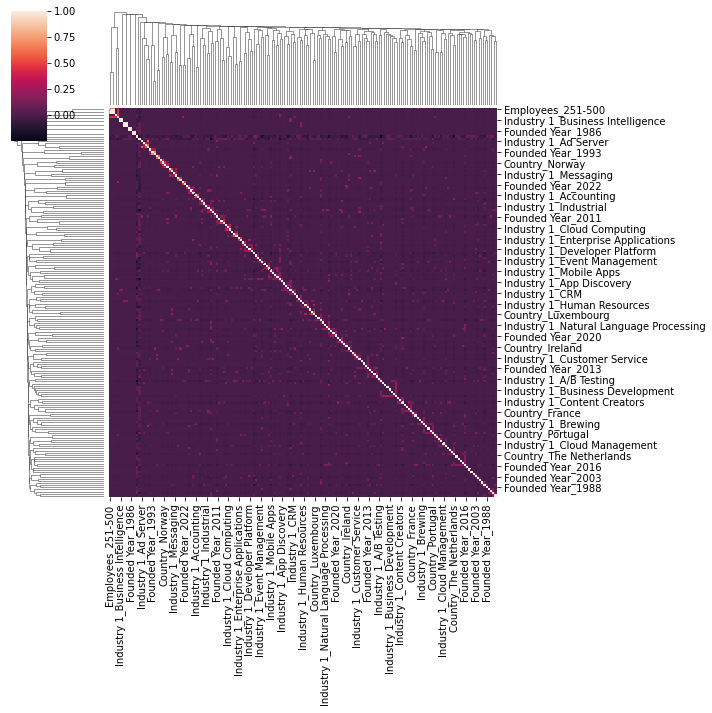

In [247]:
X = pd_stats.drop(GDPR_classes,axis=1) # independant features
X = pd.get_dummies(X, drop_first = True)
sns.clustermap(X.corr())

#### Split data

In [244]:
train, test = train_test_split(pd_stats, test_size=0.2, random_state=42)
X_train = train.drop(GDPR_classes,axis=1) # independant features

#### Encode non-numerical categorical data, and drop first to avoid collinearity

In [245]:
X_train = pd.get_dummies(X_train, drop_first = True)

# Parameter Optimization

#### First without PO

In [288]:
train, test = train_test_split(pd_stats, test_size=0.25, random_state=25)
sel_alpha_list = dict()
acc_last = 0

In [289]:
y_train = train[GDPR_classes[0]] # dependant variable
y_test = test[GDPR_classes[0]] # dependant variable

In [290]:
# independent features
X_train = train.drop(GDPR_classes, axis=1) 
# encode non-numerical categorical data, and drop first to avoid collinearity
X_train = pd.get_dummies(X_train, drop_first = True)

X_test = test.drop(GDPR_classes, axis=1) # independant features
X_test = pd.get_dummies(X_test, drop_first = True)

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [294]:
X_train

const  Employees_101-250  Employees_11-50  Employees_251-500  \
1390    1.0                  0                0                  0   
1836    1.0                  0                1                  0   
2781    1.0                  1                0                  0   
210     1.0                  0                1                  0   
2724    1.0                  0                0                  0   
...     ...                ...              ...                ...   
2527    1.0                  0                0                  0   
2164    1.0                  0                0                  0   
1115    1.0                  0                0                  0   
2166    1.0                  0                0                  0   
1005    1.0                  0                0                  0   

      Employees_51-100  Industry 1_A/B Testing  Industry 1_Accounting  \
1390                 0                       0                      0   
1836                 0                       0                      0   
2781                 0                       0                      0   
210                  0                       0                      0   
2724                 0                       0                      1   
...                ...                     ...                    ...   
2527                 0                       0                      0   
2164                 0                       0                      0   
1115                 0                       0                      0   
2166                 0                       0                      0   
1005                 0                       0                      0   

      Industry 1_Ad Server  Industry 1_Advertising  Industry 1_Aerospace  \
1390                     0                       0                     0   
1836                     0                       0                     0   
2781                     0                       0                     0   
210                      0                       0                     0   
2724                     0                       0                     0   
...                    ...                     ...                   ...   
2527                     0                       0                     0   
2164                     0                       0                     0   
1115                     0                       0                     0   
2166                     0                       1                     0   
1005                     0                       0                     0   

      Industry 1_Analytics  Industry 1_Android  Industry 1_Animation  \
1390                     0                   0                     0   
1836                     0                   0                     0   
2781                     0                   0                     0   
210                      0                   0                     0   
2724                     0                   0                     0   
...                    ...                 ...                   ...   
2527                     0                   0                     0   
2164                     0                   0                     0   
1115                     0                   0                     0   
2166                     0                   0                     0   
1005                     0                   0                     0   

      Industry 1_App Discovery  Industry 1_Apps  Industry 1_Architecture  \
1390                         0                0                        0   
1836                         0                0                        0   
2781                         0                0                        0   
210                          0                0                        0   
2724                         0                0                        0   
...                        ...              ...       

In [287]:
model = sm.Logit(y_train,X_train)
logit_model = model.fit()

C:\Users\aaberkan\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1799: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


         Current function value: inf
         Iterations: 35


C:\Users\aaberkan\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1852: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


LinAlgError: Singular matrix

In [ ]:
pred_train = logit_model.predict(X_train)>=.5
pred_test = logit_model.predict(X_test)>=.5

In [ ]:
acc_train = (y_train==pred_train).mean()
acc_test = (y_test==pred_test).mean()

print("Acc: ", acc_test)
print("Alpha: ", alpha_op)

In [279]:
alpha_list = list(np.arange(0.001, 10, 0.1))

##### Optimize parameters

In [282]:
opt_alpha = optimize_logit(pd_stats, True, alpha_list, True)

***************** NEW ROUND!
GDPR-category: Rights
349     1
1608    1
2308    1
2663    1
1778    1
       ..
2527    1
2164    0
1115    0
2166    0
1005    0
Name: Rights, Length: 340, dtype: category
Categories (2, int64): [0, 1]
flag 1
flag 2
Iteration limit reached    (Exit mode 9)
            Current function value: 0.3088550083961797
            Iterations: 1000
            Function evaluations: 1000
            Gradient evaluations: 1000
flag 3
Acc:  0.611764705882353
Alpha:  0.001


C:\Users\aaberkan\Anaconda3\lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 106 out of 181 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\aaberkan\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SystemExit: 0

C:\Users\aaberkan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3426: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [261]:
X_train

Employees_101-250  Employees_11-50  Employees_251-500  Employees_51-100  \
141                   0                1                  0                 0   
447                   0                1                  0                 0   
1005                  0                0                  0                 0   
1658                  0                0                  0                 0   
223                   0                0                  0                 0   
...                 ...              ...                ...               ...   
496                   0                0                  0                 0   
752                   0                1                  0                 0   
1909                  0                1                  0                 0   
2347                  0                0                  0                 0   
713                   0                0                  0                 0   

      Industry 1_A/B Testing  Industry 1_Accounting  Industry 1_Ad Server  \
141                        0                      0                     0   
447                        0                      0                     0   
1005                       0                      0                     0   
1658                       0                      0                     0   
223                        0                      0                     0   
...                      ...                    ...                   ...   
496                        0                      0                     0   
752                        0                      0                     0   
1909                       0                      0                     0   
2347                       0                      0                     0   
713                        0                      0                     0   

      Industry 1_Advertising  Industry 1_Aerospace  Industry 1_Analytics  \
141                        0                     0                     0   
447                        0                     0                     0   
1005                       0                     0                     0   
1658                       0                     0                     0   
223                        0                     0                     0   
...                      ...                   ...                   ...   
496                        0                     0                     0   
752                        0                     0                     0   
1909                       1                     0                     0   
2347                       0                     0                     0   
713                        0                     0                     0   

      Industry 1_Android  Industry 1_Animation  Industry 1_App Discovery  \
141                    0                     0                         0   
447                    0                     0                         0   
1005                   0                     0                         0   
1658                   0                     0                         0   
223                    0                     0                         0   
...                  ...                   ...                       ...   
496                    0                     0                         0   
752                    0                     0                         0   
1909                   0                     0                         0   
2347                   0                     0                         0   
713                    0                     0                         0   

      Industry 1_Apps  Industry 1_Architecture  \
141                 0                        0   
447                 1                        0   
1005                0                        0   
1658                0                        0   
223                 0           

In [267]:
y_train

NameError: name 'y_train' is not defined

In [281]:
def optimize_logit(pd_stats, reg, alpha_range, intercept_set):
    train, test = train_test_split(pd_stats, test_size=0.2, random_state=25)
    sel_alpha_list = dict()
    acc_last = 0

    for GDPR_cat in GDPR_classes:
        alpha_sel = alpha_range[0]
        acc_last = 0

        print("***************** NEW ROUND!")
        for alpha_op in alpha_range:
            print("GDPR-category: " + GDPR_class)

            y_train = train[GDPR_class] # dependant variable
            y_test = test[GDPR_class] # dependant variable
            
#             sys.exit(0)

            # independent features
            X_train = train.drop(GDPR_classes, axis=1) 
            # encode non-numerical categorical data, and drop first to avoid collinearity
            X_train = pd.get_dummies(X_train, drop_first = True)

            X_test = test.drop(GDPR_classes, axis=1) # independant features
            X_test = pd.get_dummies(X_test, drop_first = True)

            if(intercept_set):
                X_train = sm.add_constant(X_train)
                X_test = sm.add_constant(X_test)
                
            print(y_train)

            print("flag 1")
            model = sm.Logit(y_train,X_train)
            print("flag 2")

            if(reg):
                logit_model = model.fit_regularized(method = 'l1', trim_mode = 'size', alpha = alpha_op)
            else:
                logit_model = model.fit()

            print("flag 3")

            pred_train = logit_model.predict(X_train)>=.5

            pred_test = logit_model.predict(X_test)>=.5

            acc_train = (y_train==pred_train).mean()

            acc_test = (y_test==pred_test).mean()
            
            print("Acc: ", acc_test)
            print("Alpha: ", alpha_op)

            sys.exit(0)
            if(acc_test >= acc_last):
                print("Alpha selected!")
                alpha_sel = alpha_op 
                acc_last = acc_test

            # last alpha in range? Place optimized alpha and accuracy in dict
            if(alpha_op == alpha_list[-1]):
                sel_alpha_list[GDPR_class] = [alpha_sel, acc_last]
            
            print()
            print()

    return sel_alpha_list